## Imports

In [1]:
import harp
from pathlib import Path
import os
import utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

## Setup

In [2]:
base_path = Path('/home/ikharitonov/RANCZLAB-NAS/data/ONIX/')

In [3]:
def get_register_object(register_number, harp_board='h1'):
    
    h1_reader = harp.create_reader(f'h1-device.yml', epoch=harp.REFERENCE_EPOCH)
    h2_reader = harp.create_reader(f'h2-device.yml', epoch=harp.REFERENCE_EPOCH)
    reference_dict = {
        'h1': {
            32: h1_reader.Cam0Event,
            33: h1_reader.Cam1Event,
            38: h1_reader.StartAndStop,
            46: h1_reader.OpticalTrackingRead
        },
        'h2': {
            38: h2_reader.Encoder,
            39: h2_reader.AnalogInput,
            42: h2_reader.ImmediatePulses
        }
    }
    return reference_dict[harp_board][register_number]

## Optical Tracking Read

In [4]:
dataset_name = 'Main_harpsync_test/2024-06-05T15-04-41'

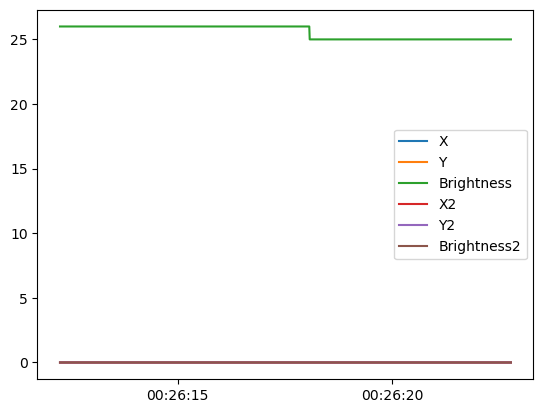

In [5]:
data_df = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1')

plt.figure()
plt.plot(data_df['OpticalTrackingRead0X'], label='X')
plt.plot(data_df['OpticalTrackingRead0Y'], label='Y')
plt.plot(data_df['OpticalTrackingRead0Brightness'], label='Brightness')
plt.plot(data_df['OpticalTrackingRead1X'], label='X2')
plt.plot(data_df['OpticalTrackingRead1Y'], label='Y2')
plt.plot(data_df['OpticalTrackingRead1Brightness'], label='Brightness2')
plt.legend()
plt.show()

## Checking inter-timestamp intervals

In [6]:
print('All unique element-wise differences between timestamps (in nanoseconds)', np.unique(np.diff(data_df.index).astype(np.uint32)))

All unique element-wise differences between timestamps (in nanoseconds) [ 9984000 10016000]


Text(0.5, 0, 'Inter-timestamp interval (seconds)')

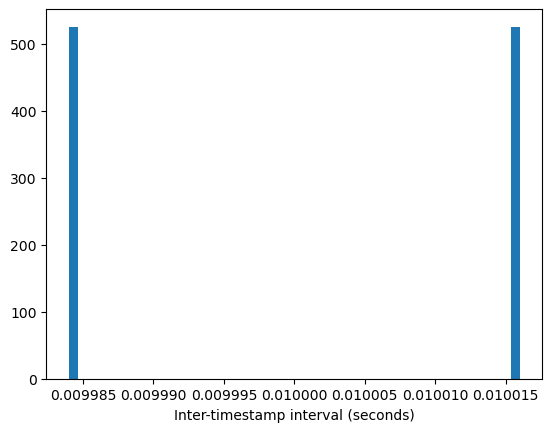

In [7]:
plt.hist(np.diff(data_df.index).astype(np.uint32)* (10**-9), bins=50)
plt.xlabel('Inter-timestamp interval (seconds)')

In [8]:
(9984000+10016000)* (10**-9)

0.02

## Comparing clocked and non-clocked datasets

In [9]:
h1_reader = harp.create_reader('h1-device.yml', epoch=harp.REFERENCE_EPOCH)
h2_reader = harp.create_reader('h2-device.yml', epoch=harp.REFERENCE_EPOCH)
session_data_reader = utils.SessionData()

# base_path = '/home/ikharitonov/RANCZLAB-NAS/data/ONIX/'
base_path = '/home/ikharitonov/Desktop/'

dataset_name = '2024-05-10T14-04-37'
nonclocked_h1_46 = utils.load(h1_reader.OpticalTrackingRead, base_path + dataset_name + '/HarpDataH1/')
nonclocked_h2_42 = utils.load(h2_reader.ImmediatePulses, base_path + dataset_name + '/HarpDataH2/')
nonclocked_h2_38 = utils.load(h2_reader.Encoder, base_path + dataset_name + '/HarpDataH2/')

dataset_name = '2024-06-26T13-51-40_gain_A'
clocked_h1_46 = utils.load(h1_reader.OpticalTrackingRead, base_path + dataset_name + '/HarpDataH1/')
clocked_h2_42 = utils.load(h2_reader.ImmediatePulses, base_path + dataset_name + '/HarpDataH2/')
clocked_h2_38 = utils.load(h2_reader.Encoder, base_path + dataset_name + '/HarpDataH2/')

In [10]:
print(nonclocked_h1_46.index[0])
print(nonclocked_h1_46.index[1])
print(nonclocked_h1_46.index[2])
print(nonclocked_h1_46.index[3])
print(nonclocked_h1_46.index[4])
print(nonclocked_h1_46.index[5])
print(nonclocked_h1_46.index[6])
print(nonclocked_h1_46.index[7])

1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256
1904-01-03 23:08:38.470240
1904-01-03 23:08:38.480256
1904-01-03 23:08:38.490240


In [11]:
print(nonclocked_h2_38.index[0])
print(nonclocked_h2_38.index[1])
print(nonclocked_h2_38.index[2])
print(nonclocked_h2_38.index[3])
print(nonclocked_h2_38.index[4])
print(nonclocked_h2_38.index[5])
print(np.diff(nonclocked_h2_38.index[:6]))

1904-01-03 23:09:30.093984
1904-01-03 23:09:30.124000
1904-01-03 23:09:30.409984
1904-01-03 23:09:30.425504
1904-01-03 23:09:30.433984
1904-01-03 23:09:30.437984
[ 30016000 285984000  15520000   8480000   4000000]


In [12]:
clocked_h1_46.index[0]

Timestamp('1904-01-13 05:45:10.220256')

In [13]:
clocked_h2_42.index[0]

Timestamp('1904-01-13 05:45:02.807488')

In [14]:
clocked_h2_42.index[1]

Timestamp('1904-01-13 05:45:02.808480')

In [15]:
clocked_h2_38.index[0]

Timestamp('1904-01-13 05:45:02.822496')

In [16]:
clocked_h2_38.index[1]

Timestamp('1904-01-13 05:45:02.841984')

In [17]:
print(clocked_h1_46.index[0])
print(clocked_h1_46.index[1])
print(clocked_h1_46.index[2])
print(clocked_h1_46.index[3])
print(clocked_h1_46.index[4])
print(clocked_h1_46.index[5])
print(np.diff(clocked_h1_46.index[:6]))

1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256
1904-01-13 05:45:10.270240
[ 9984000 10016000  9984000 10016000  9984000]


In [18]:
print(clocked_h2_38.index[0])
print(clocked_h2_38.index[1])
print(clocked_h2_38.index[2])
print(clocked_h2_38.index[3])
print(clocked_h2_38.index[4])
print(clocked_h2_38.index[5])
print(np.diff(clocked_h2_38.index[:6]))

1904-01-13 05:45:02.822496
1904-01-13 05:45:02.841984
1904-01-13 05:45:02.856480
1904-01-13 05:45:02.879488
1904-01-13 05:45:02.899488
1904-01-13 05:45:02.917504
[19488000 14496000 23008000 20000000 18016000]


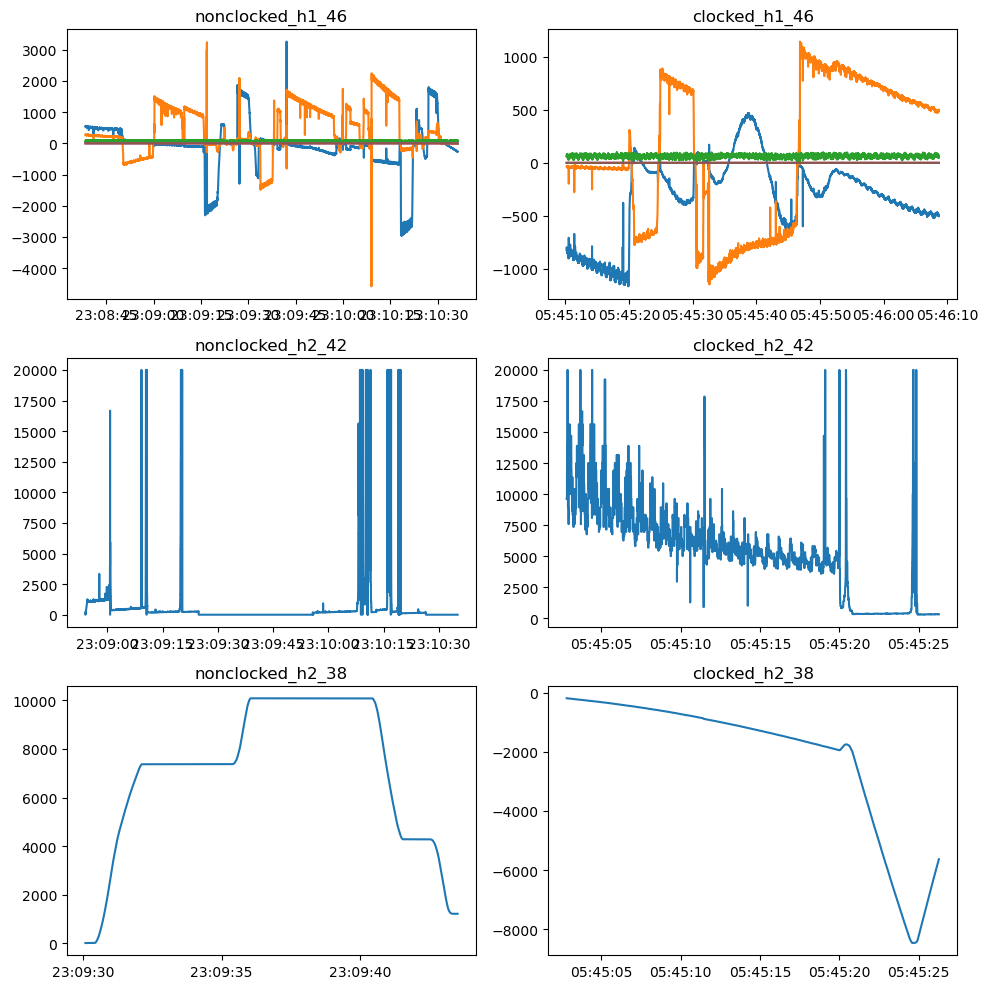

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

ax[0][0].plot(nonclocked_h1_46)
ax[0][0].set_title('nonclocked_h1_46')

ax[1][0].plot(nonclocked_h2_42)
ax[1][0].set_title('nonclocked_h2_42')

ax[0][1].plot(clocked_h1_46)
ax[0][1].set_title('clocked_h1_46')

ax[1][1].plot(clocked_h2_42)
ax[1][1].set_title('clocked_h2_42')

ax[2][0].plot(nonclocked_h2_38)
ax[2][0].set_title('nonclocked_h2_38')

ax[2][1].plot(clocked_h2_38)
ax[2][1].set_title('clocked_h2_38')

plt.tight_layout()
plt.show()

## Checking particular timestamp

In [20]:
timestamp = '1904-01-13 05:45:19.910240'

In [21]:
clocked_h1_46[clocked_h1_46.index==timestamp]

OpticalTrackingRead0X  OpticalTrackingRead0Y  \
Time                                                                       
1904-01-13 05:45:19.910240                  -1139                    -57   

                            OpticalTrackingRead0Brightness  \
Time                                                         
1904-01-13 05:45:19.910240                              46   

                            OpticalTrackingRead1X  OpticalTrackingRead1Y  \
Time                                                                       
1904-01-13 05:45:19.910240                      0                      0   

                            OpticalTrackingRead1Brightness  
Time                                                        
1904-01-13 05:45:19.910240                               0

In [22]:
clocked_h2_42[clocked_h2_42.index==timestamp]

Empty DataFrame
Columns: [ImmediatePulses]
Index: []

### Lomb–Scargle periodogram

Lomb-Scargle periodogram was developed by Lomb [Lomb, N.R., 1976] and further extended by Scargle [Scargle, J.D., 1982] to find, and test the significance of weak periodic signals with uneven temporal sampling. Lomb–Scargle periodogram is a method that allows efﬁcient computation of a Fourier-like power spectrum estimator from unevenly sampled data, resulting in an intuitive means of determining the period of oscillation.
https://www.earthinversion.com/techniques/how-to-deal-with-irregular-sparse-data-set/

In [23]:
f = np.linspace(0.001, 10**20, 1000)
pgram = signal.lombscargle(clocked_h2_42.index.to_numpy(), clocked_h2_42.values[:,0], f, normalize=True)
pgram2 = signal.lombscargle((clocked_h2_42.index - clocked_h2_42.index[0]).total_seconds().to_numpy(), clocked_h2_42.values[:,0], f, normalize=True)

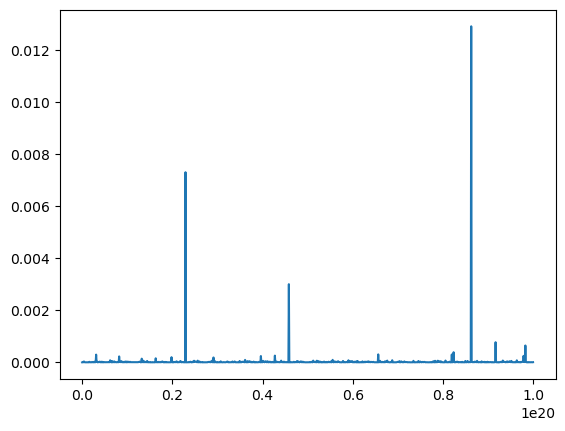

In [24]:
plt.plot(f,pgram)

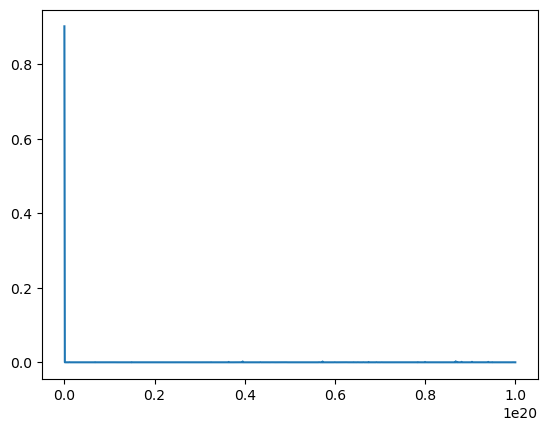

In [25]:
plt.plot(f,pgram2)

## Resampling and interpolating

In [26]:
def resample_stream(data_stream_df, resampling_period='0.1ms', method='linear'):
    return data_stream_df.resample(resampling_period).last().interpolate(method=method)

def compute_Lomb_Scargle_psd(data_df, freq_min=0.001, freq_max=10**6, num_freqs=1000, normalise=True):
    freqs = np.linspace(freq_min, freq_max, num_freqs)
#     x = (data_df.index - data_df.index[0]).total_seconds().to_numpy()
    x = data_df.index
    y = data_df.values
    if y.ndim != 1: y = y[:,0]
    psd = signal.lombscargle(x, y, freqs, normalize=normalise)
    return freqs, psd

def plot_detail(data_stream_df, dataset_name, register, sample_num_to_plot=25):
    
    resampled_data_stream_df = resample_stream(data_stream_df)
    
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,15))
    
    fig.suptitle(f'DATASET [{dataset_name}] REGISTER [{register}]')
    
    ax[0][0].plot(data_stream_df, alpha=0.75)
    ax[0][0].plot(resampled_data_stream_df, alpha=0.75)
    ax[0][0].set_title('Full signal')
    ax[0][0].set_xlabel('Timestamp')
    ax[0][0].set_ylabel('Signal Magnitude')
    ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
    ax[0][0].grid()
    
#     freq, psd = compute_Lomb_Scargle_psd(data_stream_df)
#     freq, psd_resampled = compute_Lomb_Scargle_psd(resampled_data_stream_df)
#     ax[0][1].plot(freq, psd, alpha=0.75)
#     ax[0][1].plot(freq, psd_resampled, alpha=0.75)
#     ax[0][1].set_title('Lomb Scargle periodogram')
#     ax[0][1].set_xlabel('Frequency')
#     ax[0][1].set_ylabel('Power Spectral Density')
#     ax[0][1].legend(['Original', 'Resampled'])
#     ax[0][1].grid()
    
    ax[1][0].plot(data_stream_df[:sample_num_to_plot], alpha=0.75)
    ax[1][0].scatter(data_stream_df[:sample_num_to_plot].index, data_stream_df[:sample_num_to_plot], s=25)
    filtered_resampled_df = resampled_data_stream_df[resampled_data_stream_df.index < data_stream_df.index[sample_num_to_plot]]
    ax[1][0].plot(filtered_resampled_df, alpha=0.75)
    ax[1][0].scatter(filtered_resampled_df.index, filtered_resampled_df, s=25, alpha=0.25)
    ax[1][0].set_xlabel('Timestamp')
    ax[1][0].set_ylabel('Signal Magnitude')
    ax[1][0].set_title(f'Zoom into first {sample_num_to_plot} timepoints')
    ax[1][0].set_xticks(data_stream_df[:sample_num_to_plot].index)
    ax[1][0].set_xticklabels(data_stream_df[:sample_num_to_plot].index.strftime('%H:%M:%S.%f'), rotation=-90)
    ax[1][0].grid()
    print('First five original timestamps:')
    for ts in data_stream_df[:5].index.to_list(): print(ts)
    print('\nFirst five resampled timestamps:')
    for ts in resampled_data_stream_df[:5].index.to_list(): print(ts)
    
    ax[1][1].plot(data_stream_df[-sample_num_to_plot:], alpha=0.75)
    ax[1][1].scatter(data_stream_df[-sample_num_to_plot:].index, data_stream_df[-sample_num_to_plot:], s=25)
    filtered_resampled_df = resampled_data_stream_df[resampled_data_stream_df.index >= data_stream_df.index[-sample_num_to_plot]]
    ax[1][1].plot(filtered_resampled_df, alpha=0.75)
    ax[1][1].scatter(filtered_resampled_df.index, filtered_resampled_df, s=25, alpha=0.25)
    ax[1][1].set_xlabel('Timestamp')
    ax[1][1].set_ylabel('Signal Magnitude')
    ax[1][1].set_title(f'Zoom into last {sample_num_to_plot} timepoints')
    ax[1][1].set_xticks(data_stream_df[-sample_num_to_plot:].index)
    ax[1][1].set_xticklabels(data_stream_df[-sample_num_to_plot:].index.strftime('%H:%M:%S.%f'), rotation=-90)
    ax[1][1].grid()
    
    inter_timestamp_invervals = np.diff(data_stream_df.index).astype(np.uint32) * (10**-9) # converted to seconds
    ax[2][0].hist(inter_timestamp_invervals, bins=50)
    ax[2][0].set_title('Histogram of intervals between timestamps')
    ax[2][0].set_xlabel('Inter-timestamp interval (seconds)')
    ax[2][0].set_ylabel('Count')
    ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)
    ax[2][0].grid()
    
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


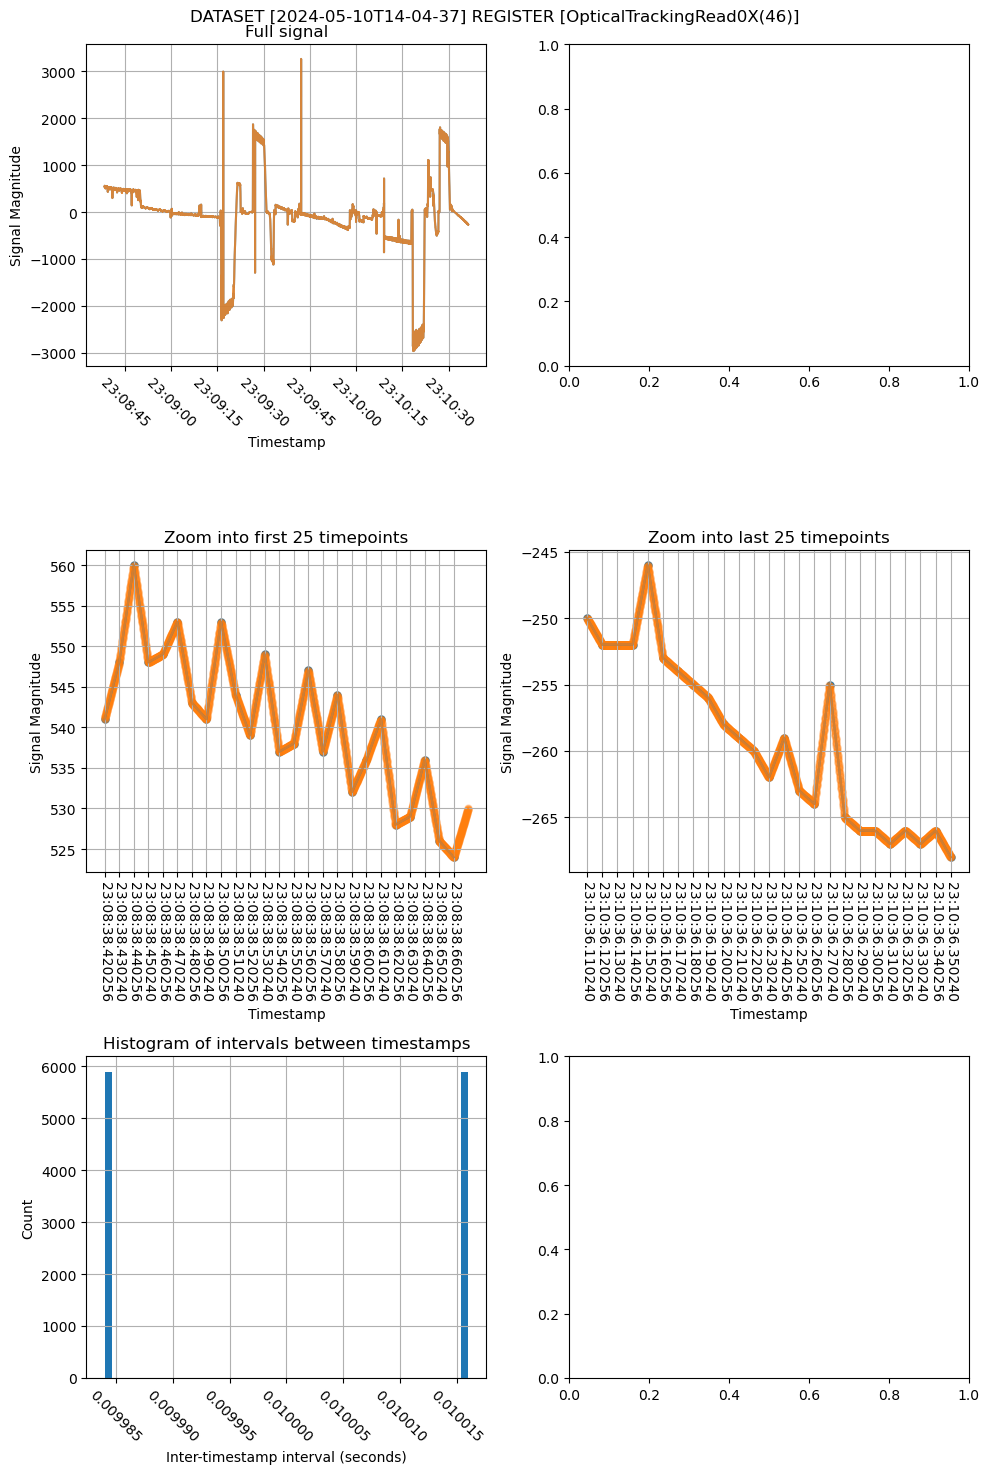

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


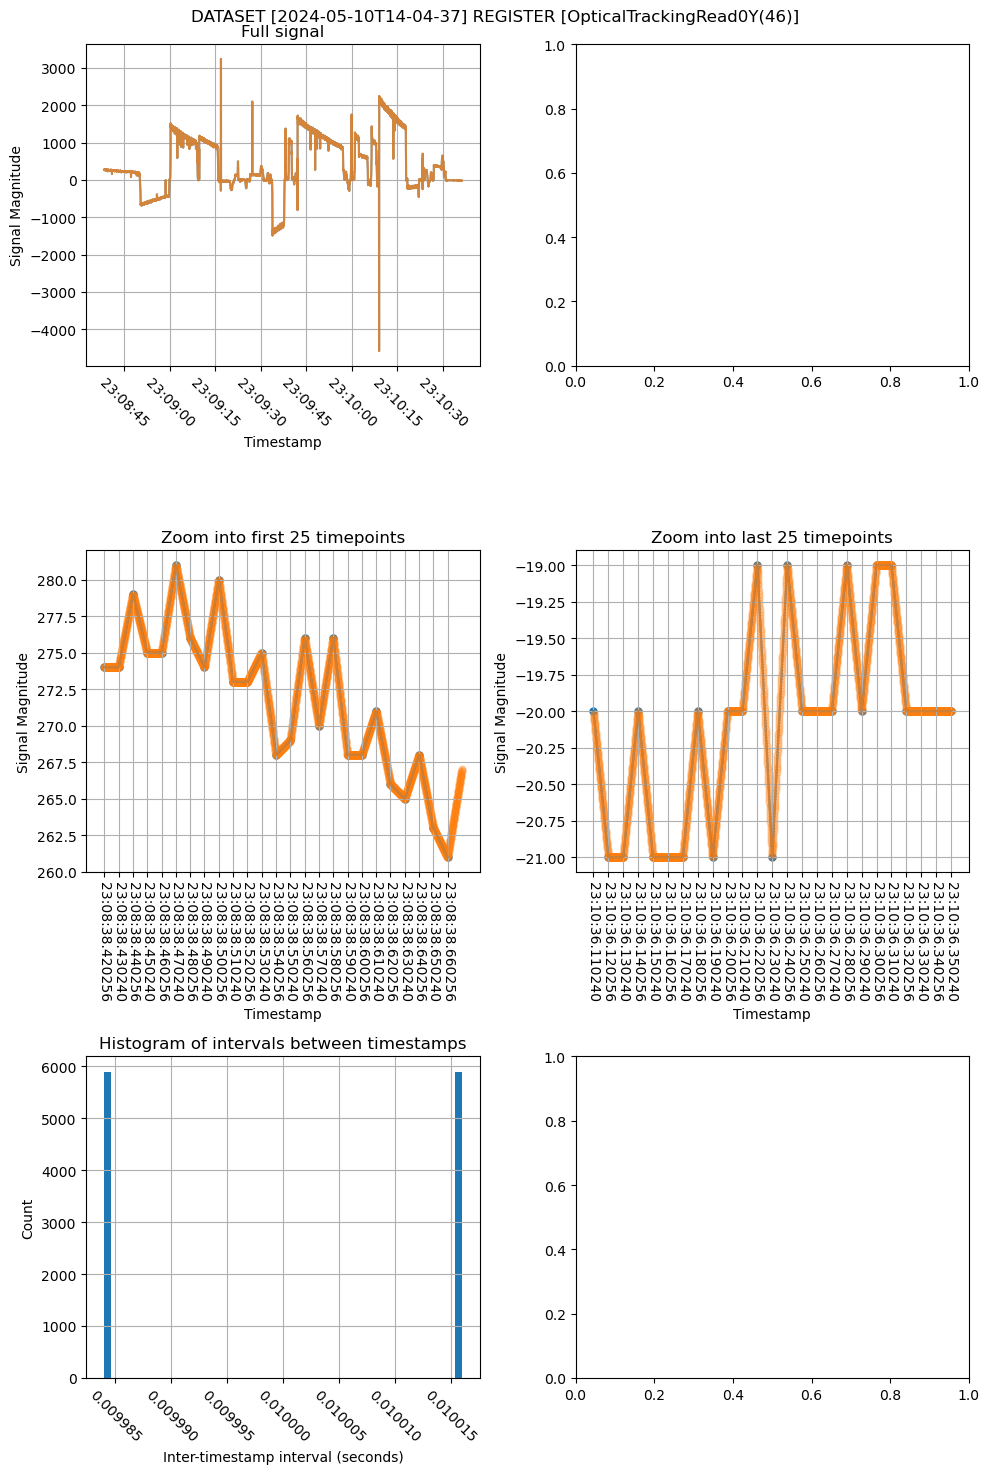

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


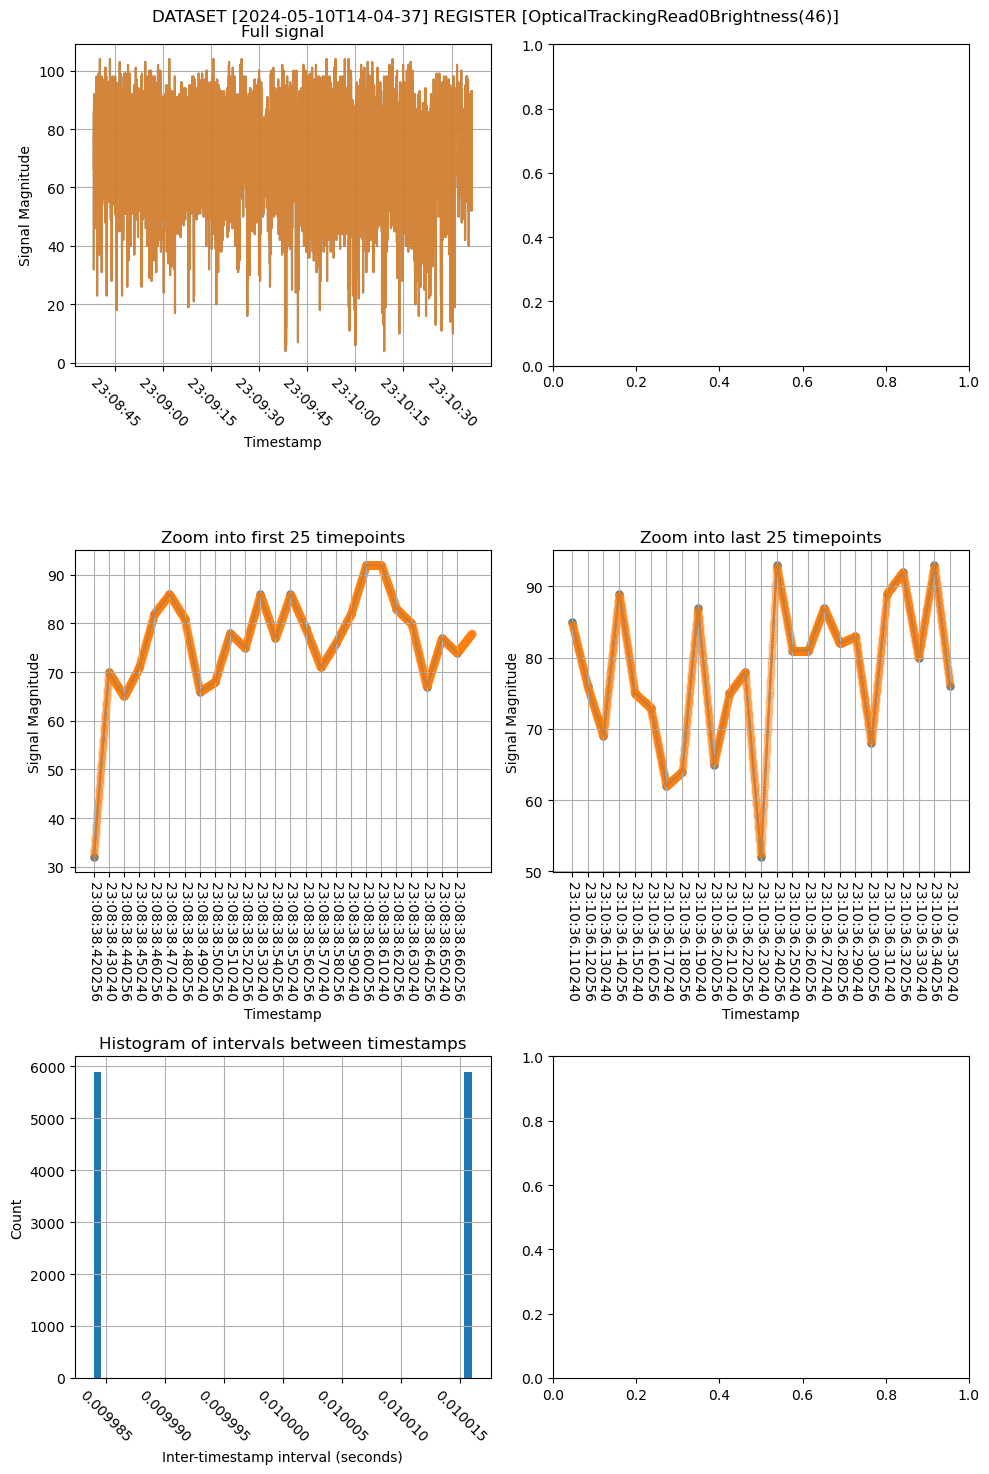

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


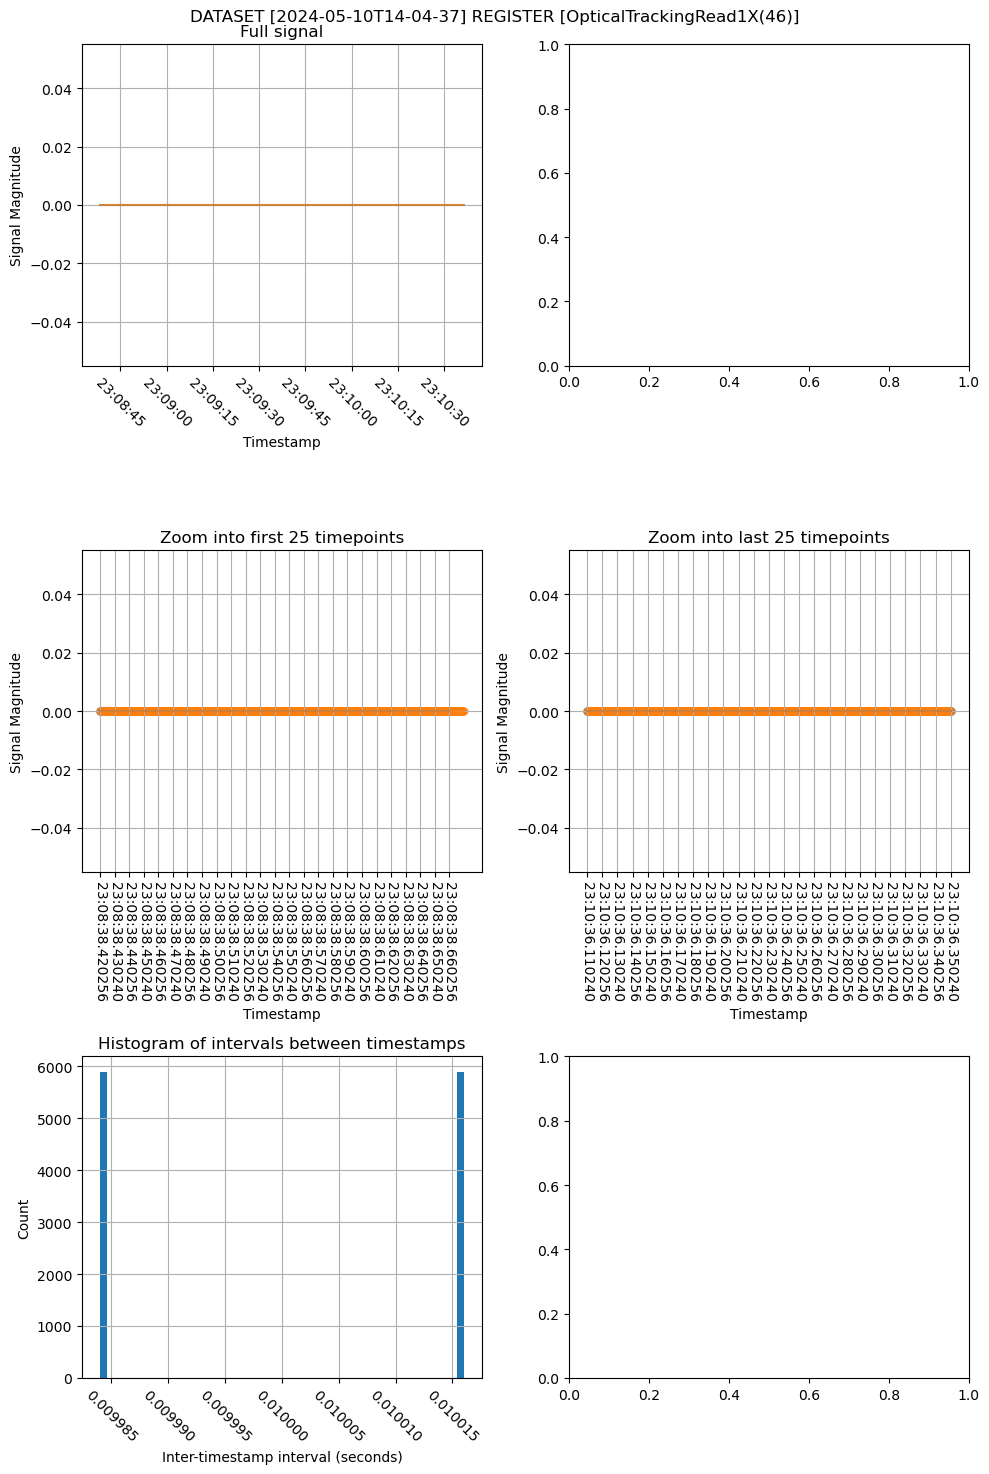

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


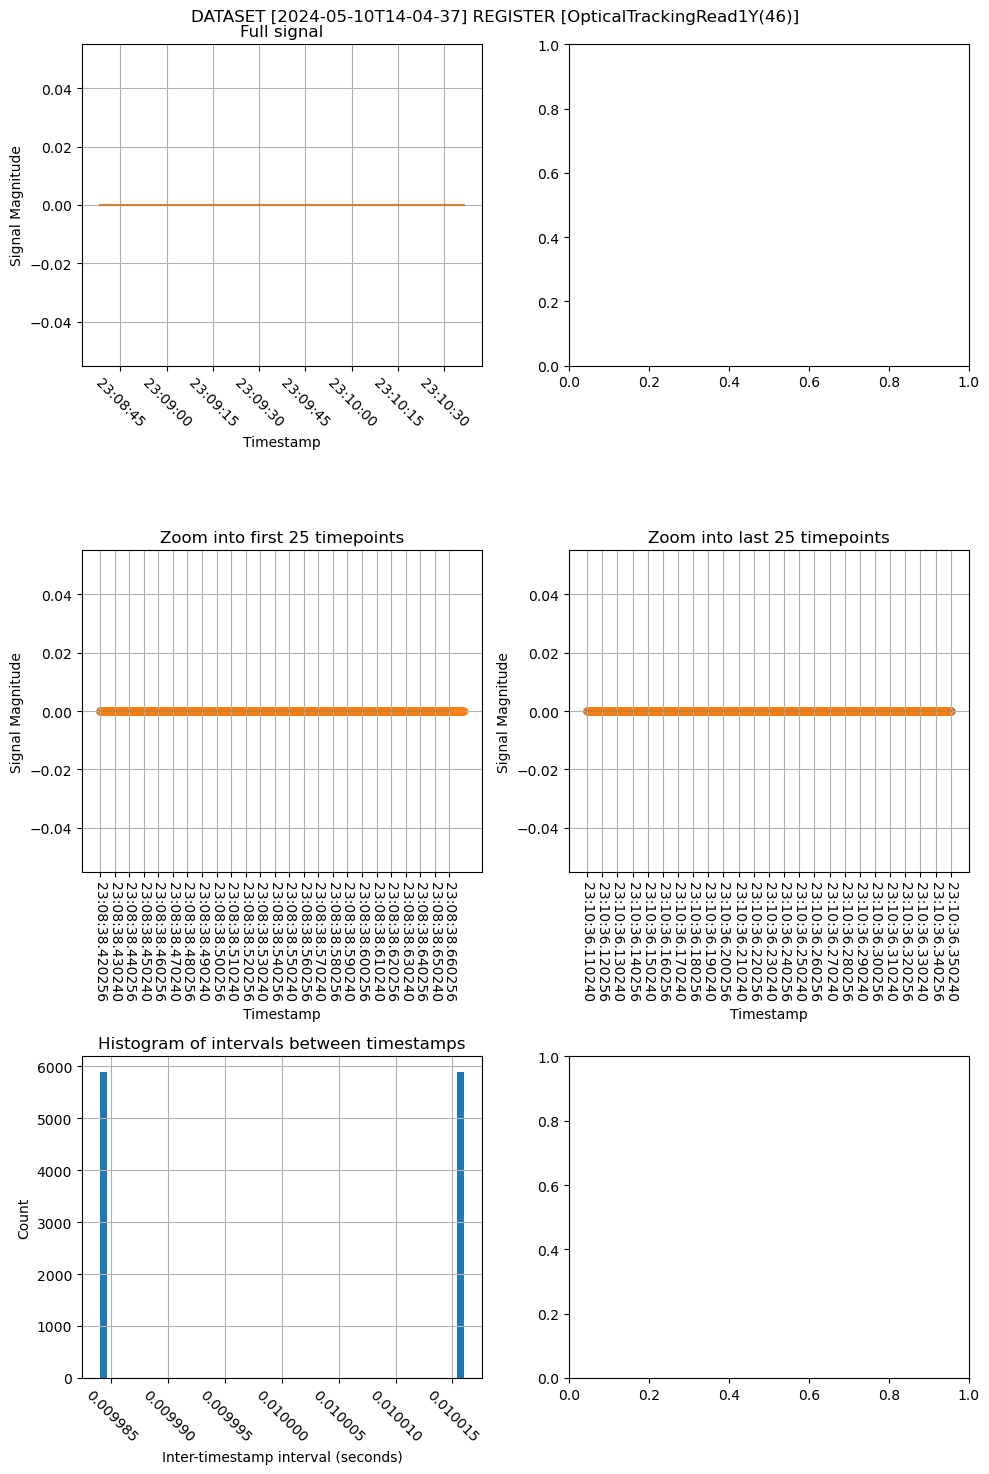

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:38.420256
1904-01-03 23:08:38.430240
1904-01-03 23:08:38.440256
1904-01-03 23:08:38.450240
1904-01-03 23:08:38.460256

First five resampled timestamps:
1904-01-03 23:08:38.420200
1904-01-03 23:08:38.420300
1904-01-03 23:08:38.420400
1904-01-03 23:08:38.420500
1904-01-03 23:08:38.420600


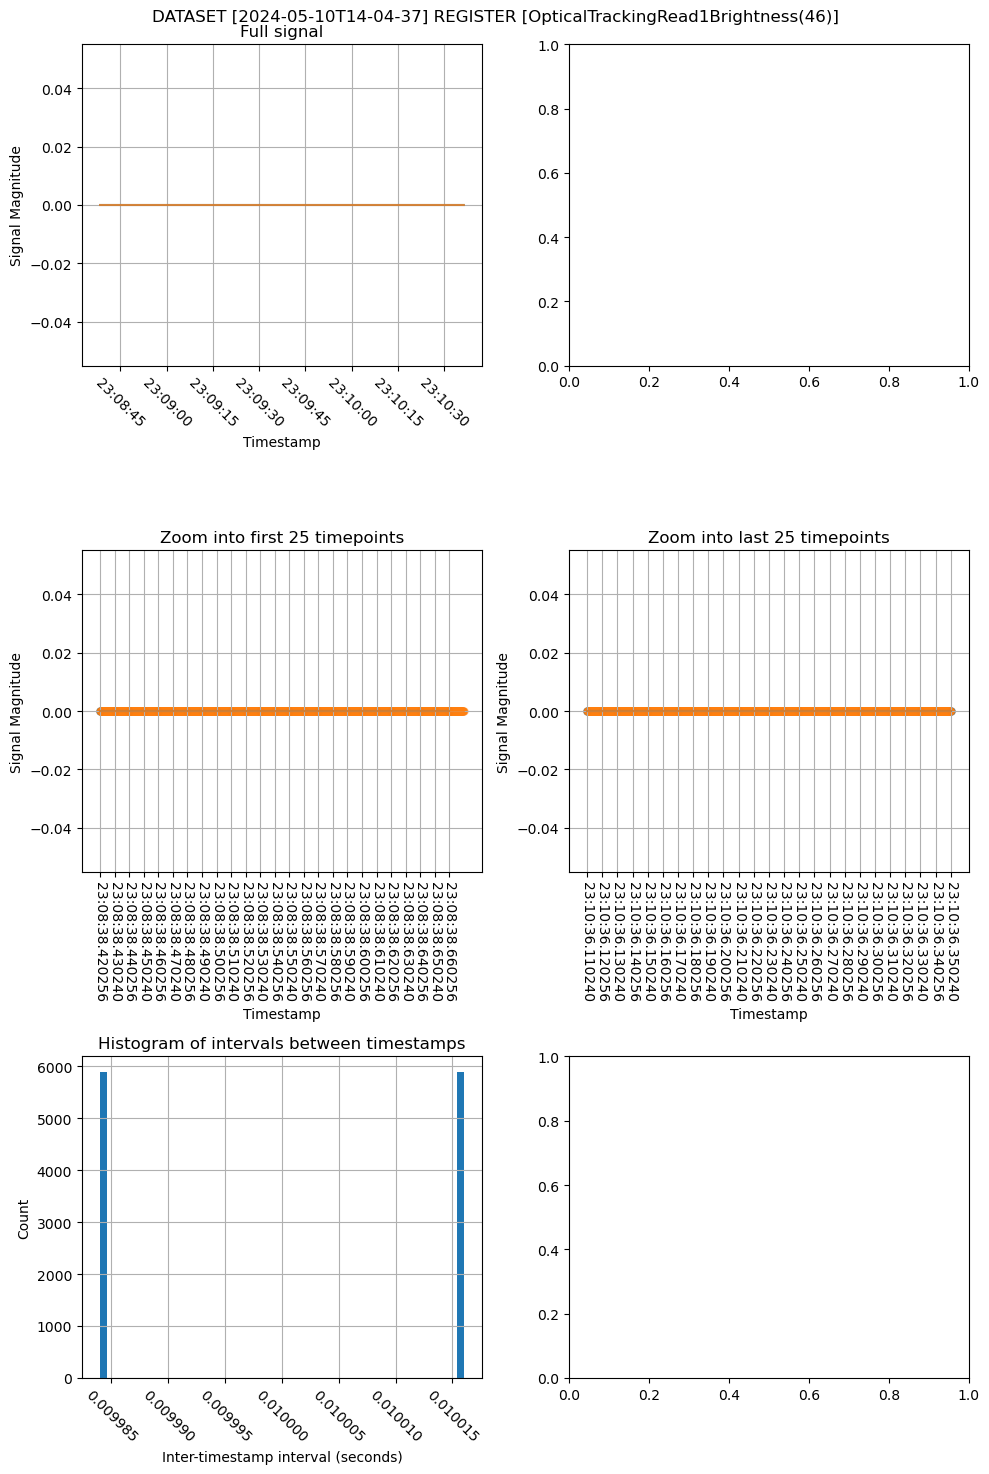

In [27]:
base_path = Path('/home/ikharitonov/Desktop/')

dataset_name = '2024-05-10T14-04-37'
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0X
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0X(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0Y
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0Y(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0Brightness
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0Brightness(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1X
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1X(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1Y
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1Y(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1Brightness
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1Brightness(46)')

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:42.000320
1904-01-03 23:08:42.010272
1904-01-03 23:08:42.020288
1904-01-03 23:08:42.030272
1904-01-03 23:08:42.040288

First five resampled timestamps:
1904-01-03 23:08:42.000300
1904-01-03 23:08:42.000400
1904-01-03 23:08:42.000500
1904-01-03 23:08:42.000600
1904-01-03 23:08:42.000700


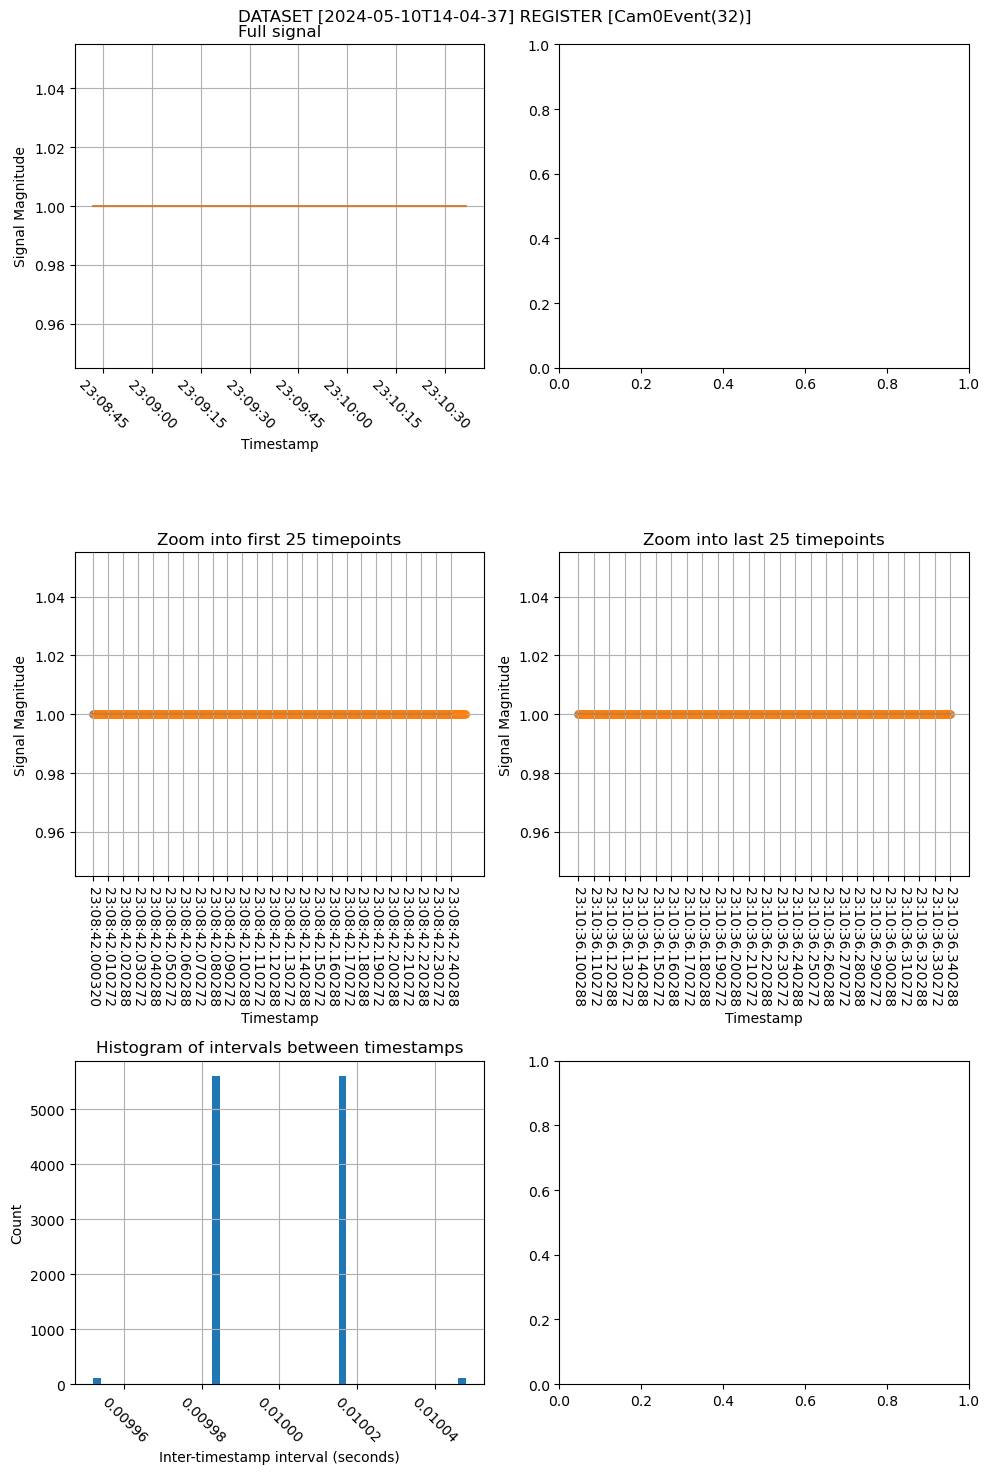

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:42.000288
1904-01-03 23:08:42.010272
1904-01-03 23:08:42.020288
1904-01-03 23:08:42.030272
1904-01-03 23:08:42.040288

First five resampled timestamps:
1904-01-03 23:08:42.000200
1904-01-03 23:08:42.000300
1904-01-03 23:08:42.000400
1904-01-03 23:08:42.000500
1904-01-03 23:08:42.000600


/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


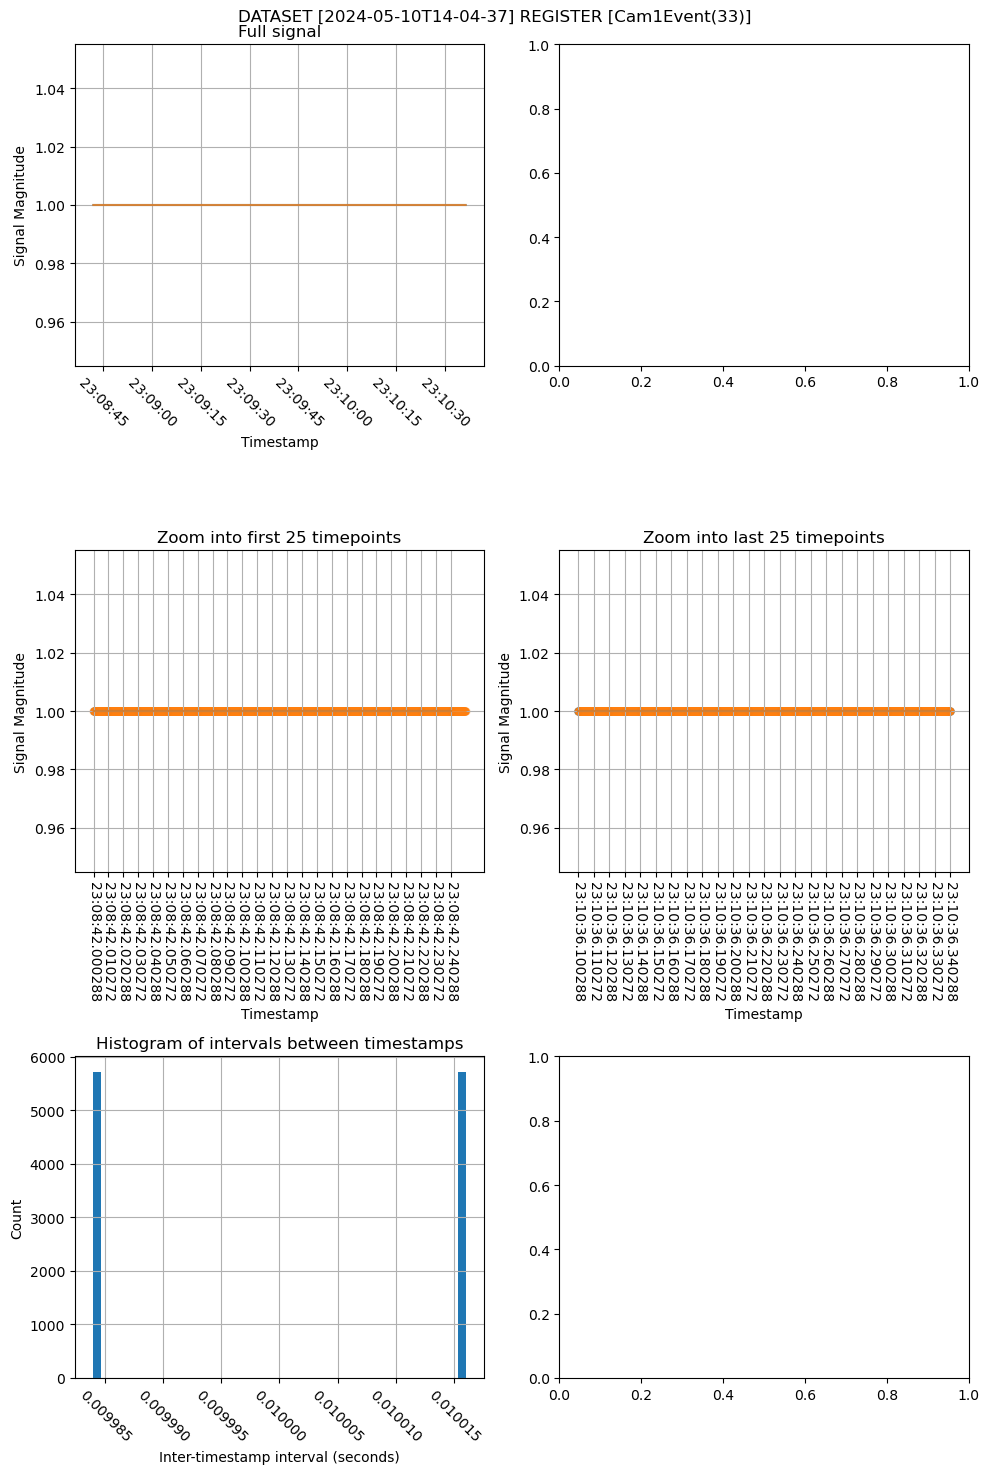

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


ValueError: x and y must be the same size

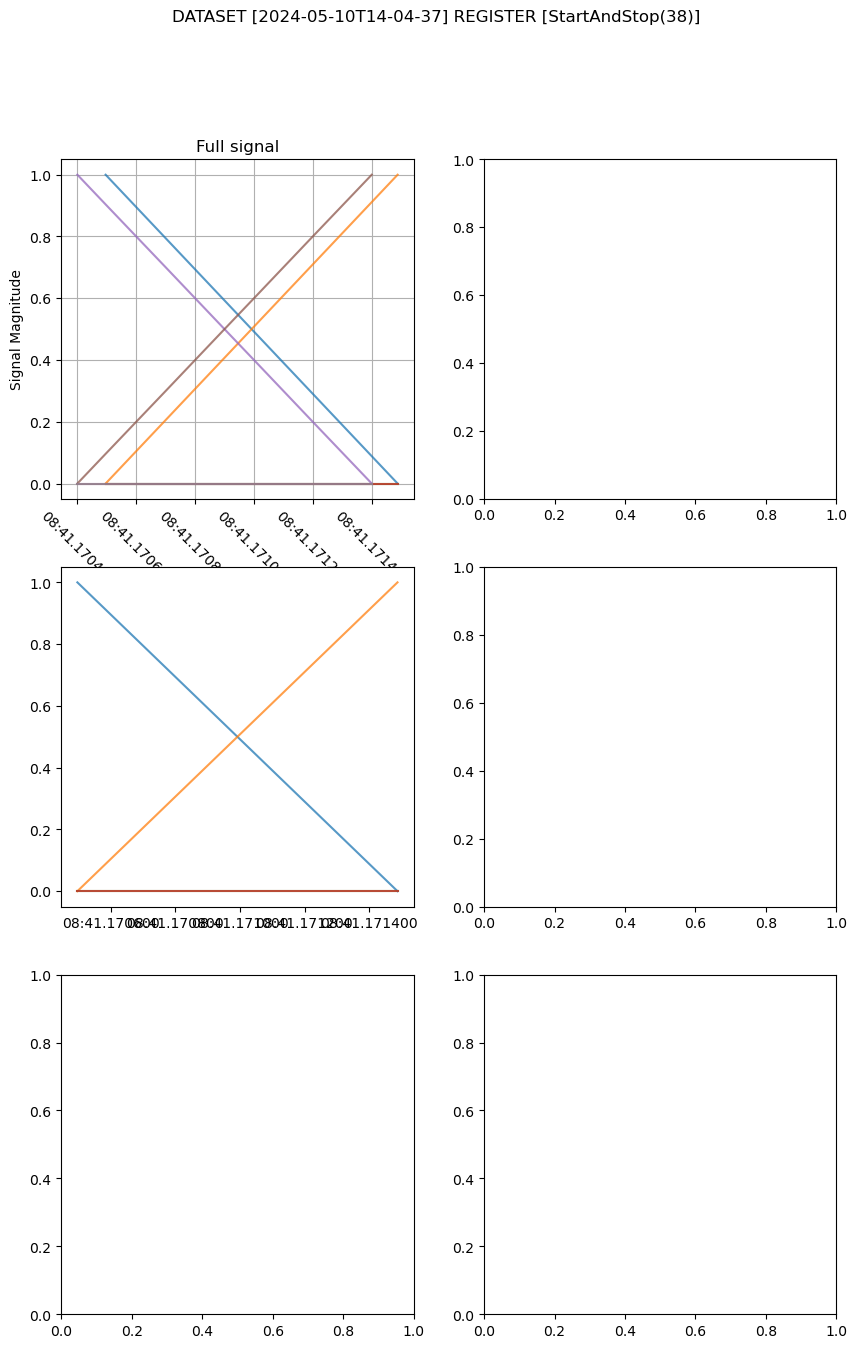

In [28]:
dataset_name = '2024-05-10T14-04-37'
data_stream = utils.load(get_register_object(32, 'h1'), base_path/dataset_name/'HarpDataH1')
plot_detail(data_stream, dataset_name, register='Cam0Event(32)')
data_stream = utils.load(get_register_object(33, 'h1'), base_path/dataset_name/'HarpDataH1')
plot_detail(data_stream, dataset_name, register='Cam1Event(33)')
data_stream = utils.load(get_register_object(38, 'h1'), base_path/dataset_name/'HarpDataH1')
plot_detail(data_stream, dataset_name, register='StartAndStop(38)')

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:09:30.093984
1904-01-03 23:09:30.124000
1904-01-03 23:09:30.409984
1904-01-03 23:09:30.425504
1904-01-03 23:09:30.433984

First five resampled timestamps:
1904-01-03 23:09:30.093900
1904-01-03 23:09:30.094000
1904-01-03 23:09:30.094100
1904-01-03 23:09:30.094200
1904-01-03 23:09:30.094300


/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


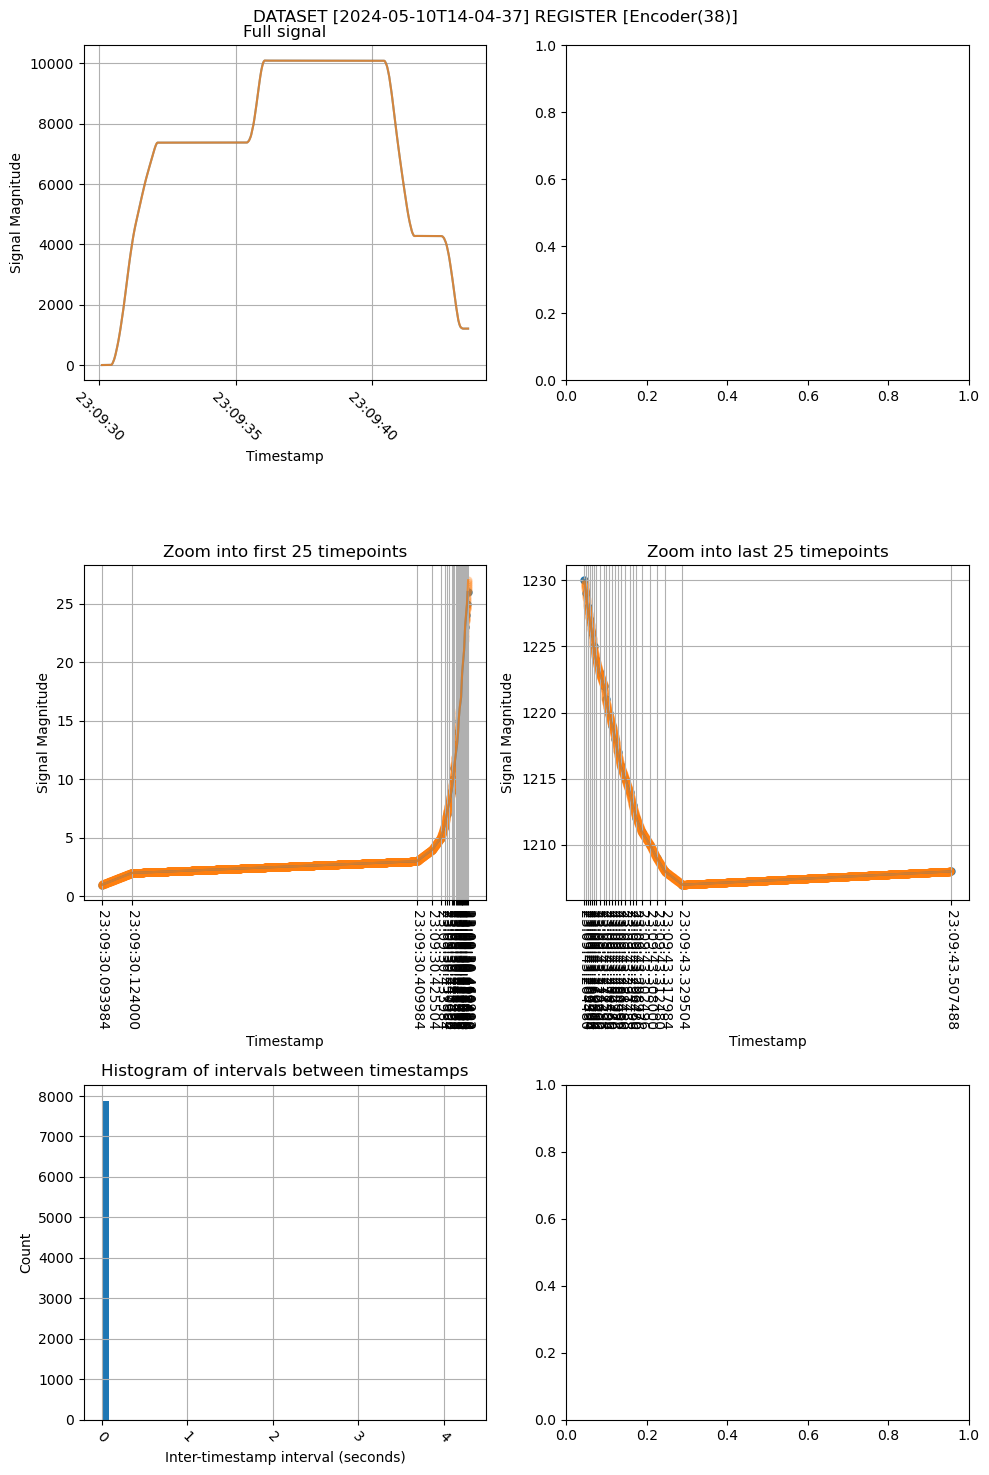

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:49.003488
1904-01-03 23:08:49.004000
1904-01-03 23:08:49.004480
1904-01-03 23:08:49.004992
1904-01-03 23:08:49.005504

First five resampled timestamps:
1904-01-03 23:08:49.003400
1904-01-03 23:08:49.003500
1904-01-03 23:08:49.003600
1904-01-03 23:08:49.003700
1904-01-03 23:08:49.003800


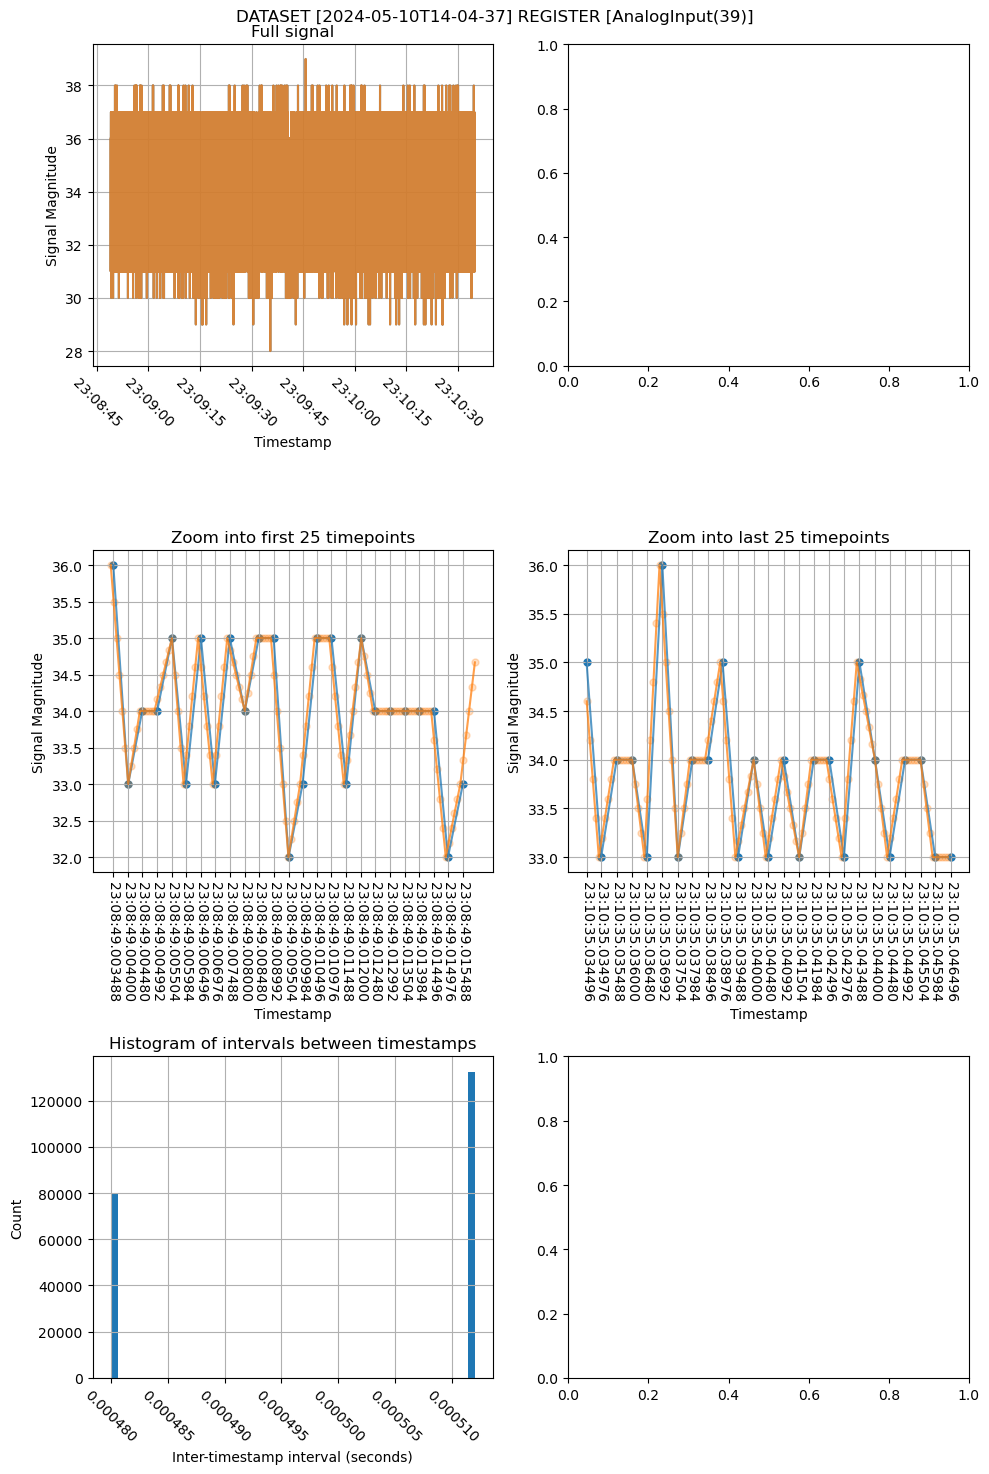

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-03 23:08:54.100480
1904-01-03 23:08:54.101504
1904-01-03 23:08:54.616480
1904-01-03 23:08:54.617504
1904-01-03 23:08:54.618496

First five resampled timestamps:
1904-01-03 23:08:54.100400
1904-01-03 23:08:54.100500
1904-01-03 23:08:54.100600
1904-01-03 23:08:54.100700
1904-01-03 23:08:54.100800


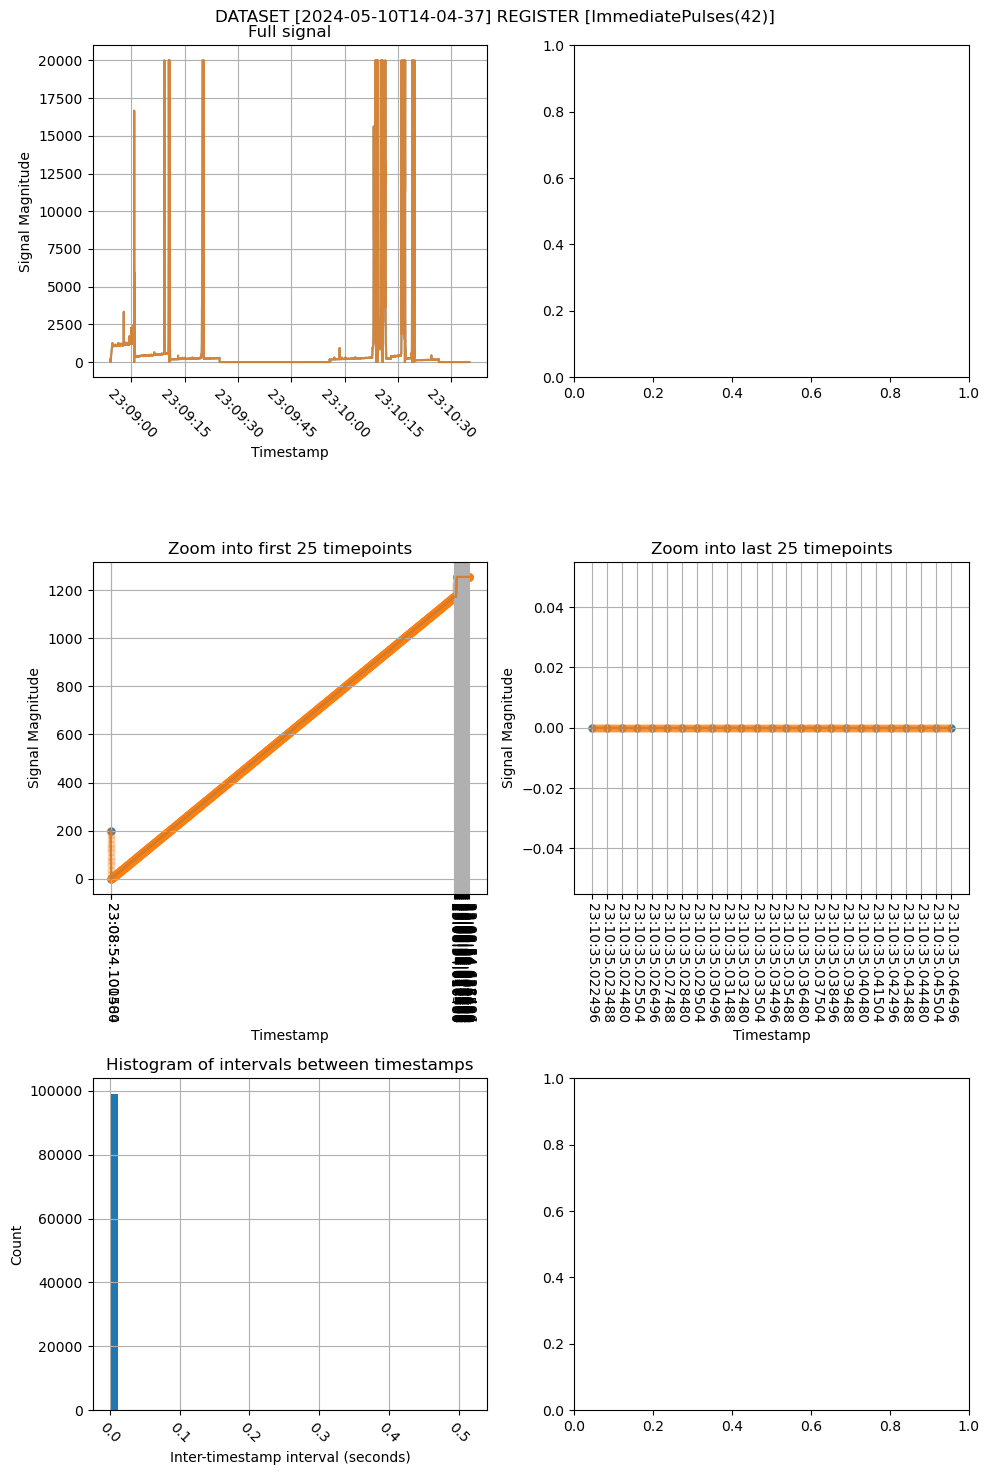

In [29]:
dataset_name = '2024-05-10T14-04-37'
data_stream = utils.load(get_register_object(38, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='Encoder(38)')
data_stream = utils.load(get_register_object(39, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='AnalogInput(39)')
data_stream = utils.load(get_register_object(42, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='ImmediatePulses(42)')

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


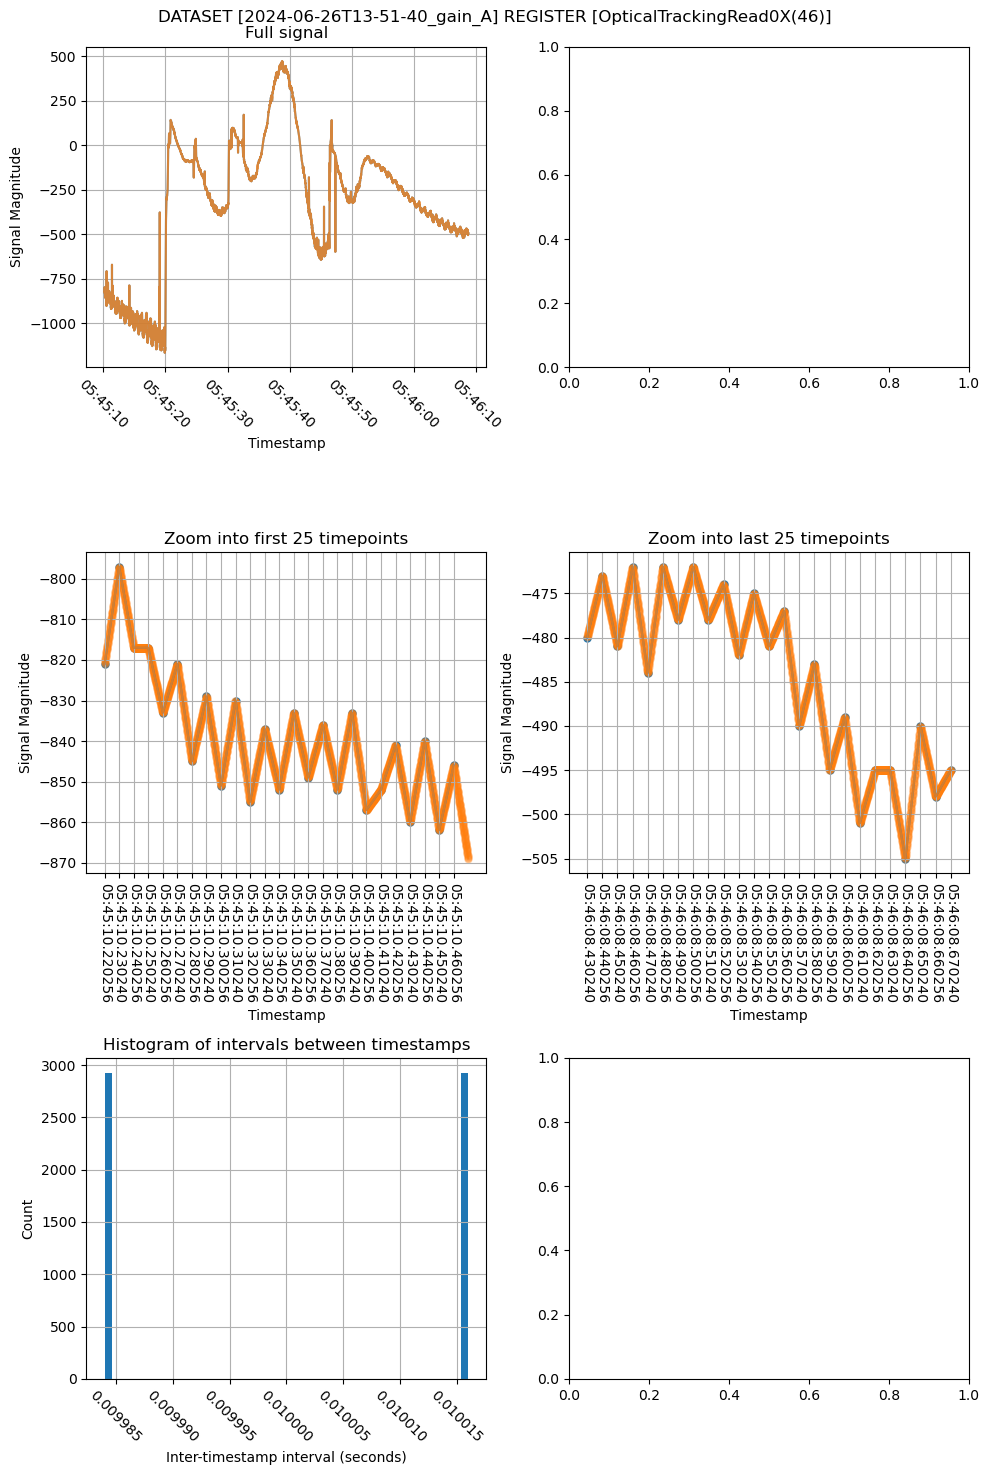

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


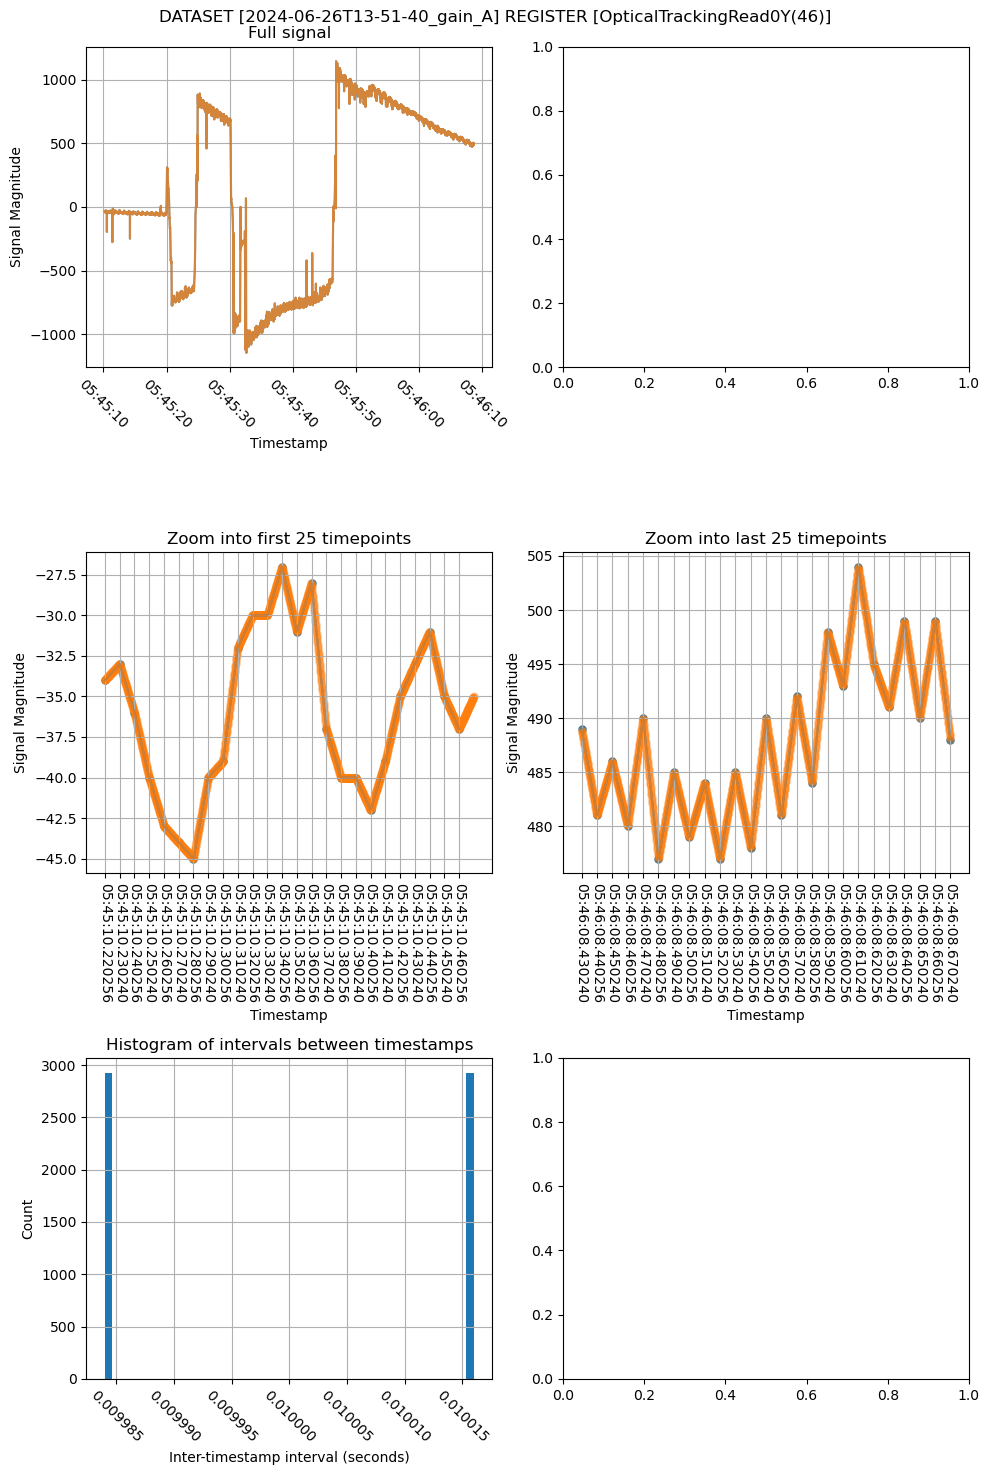

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


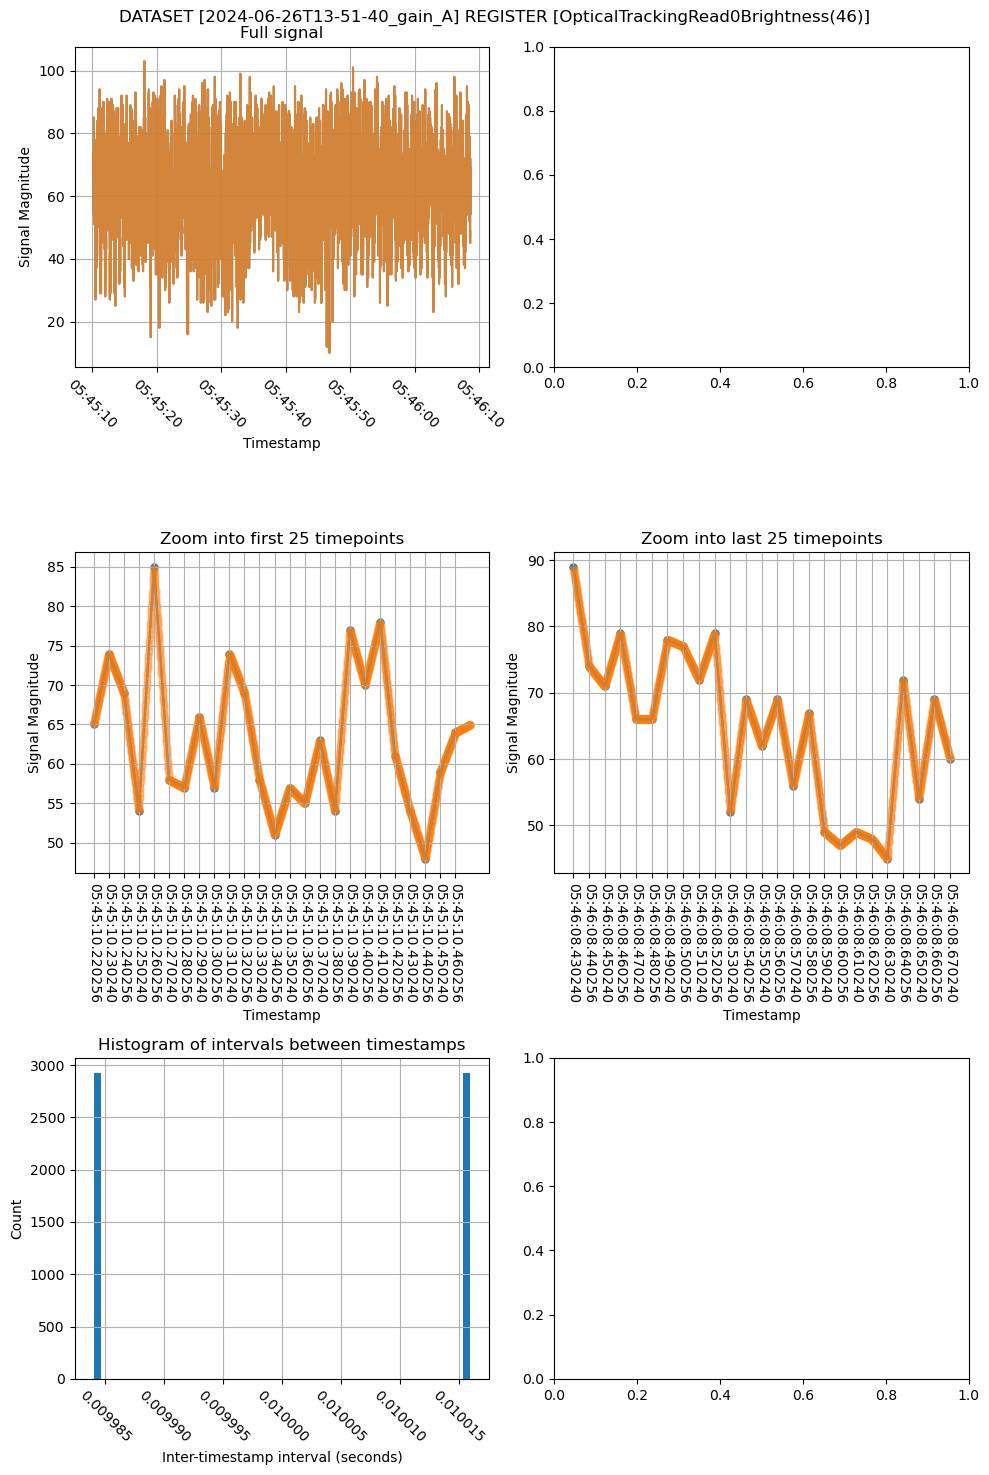

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


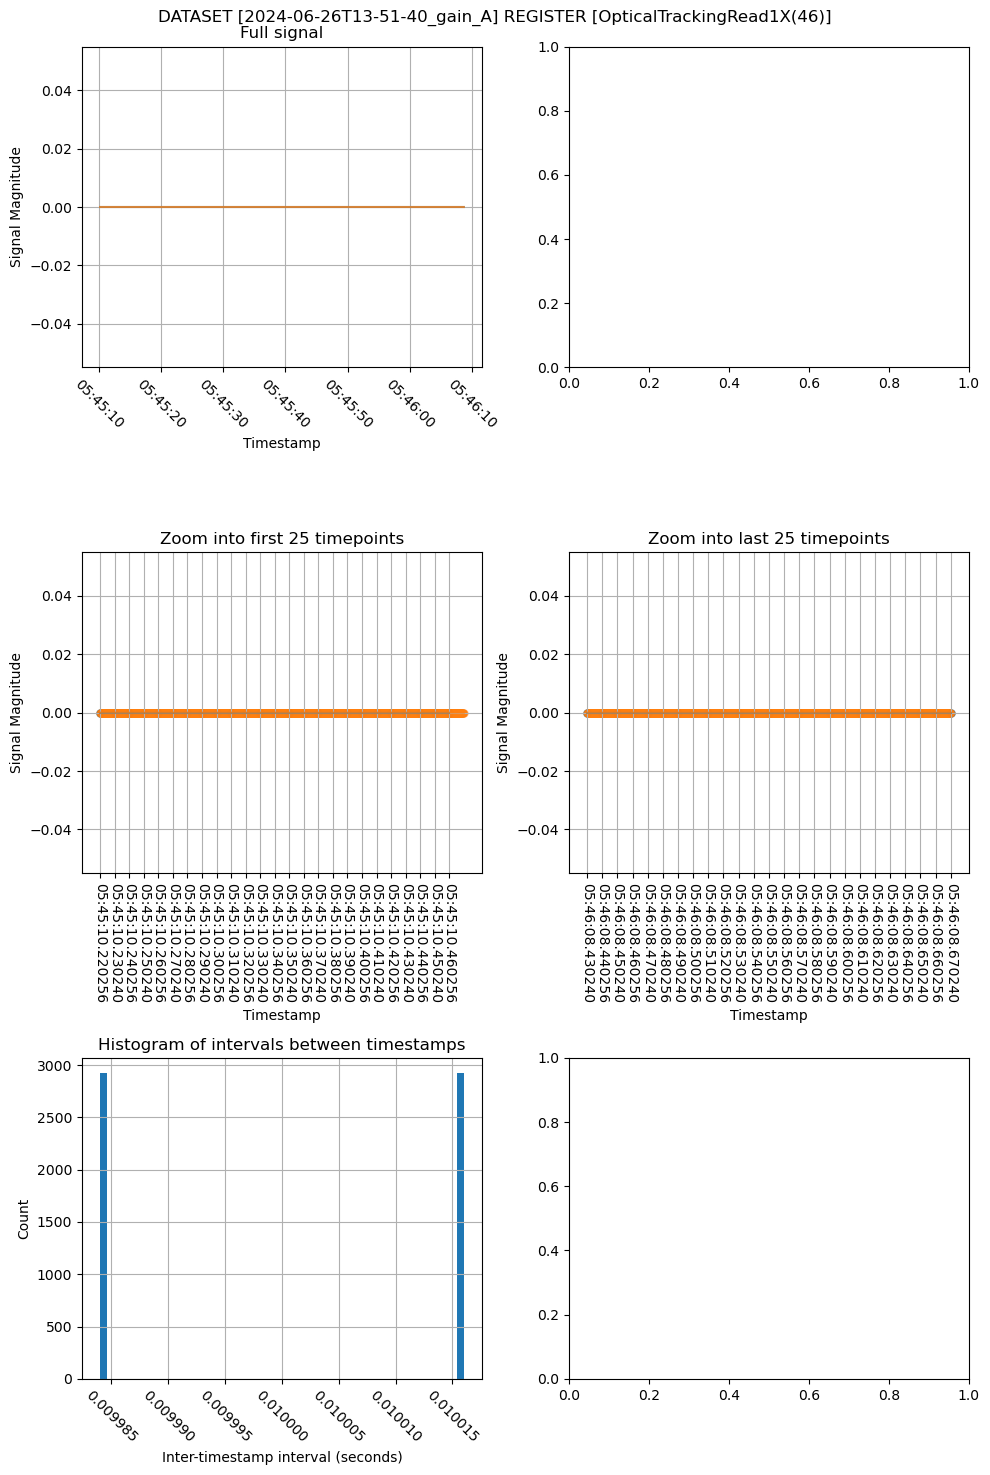

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


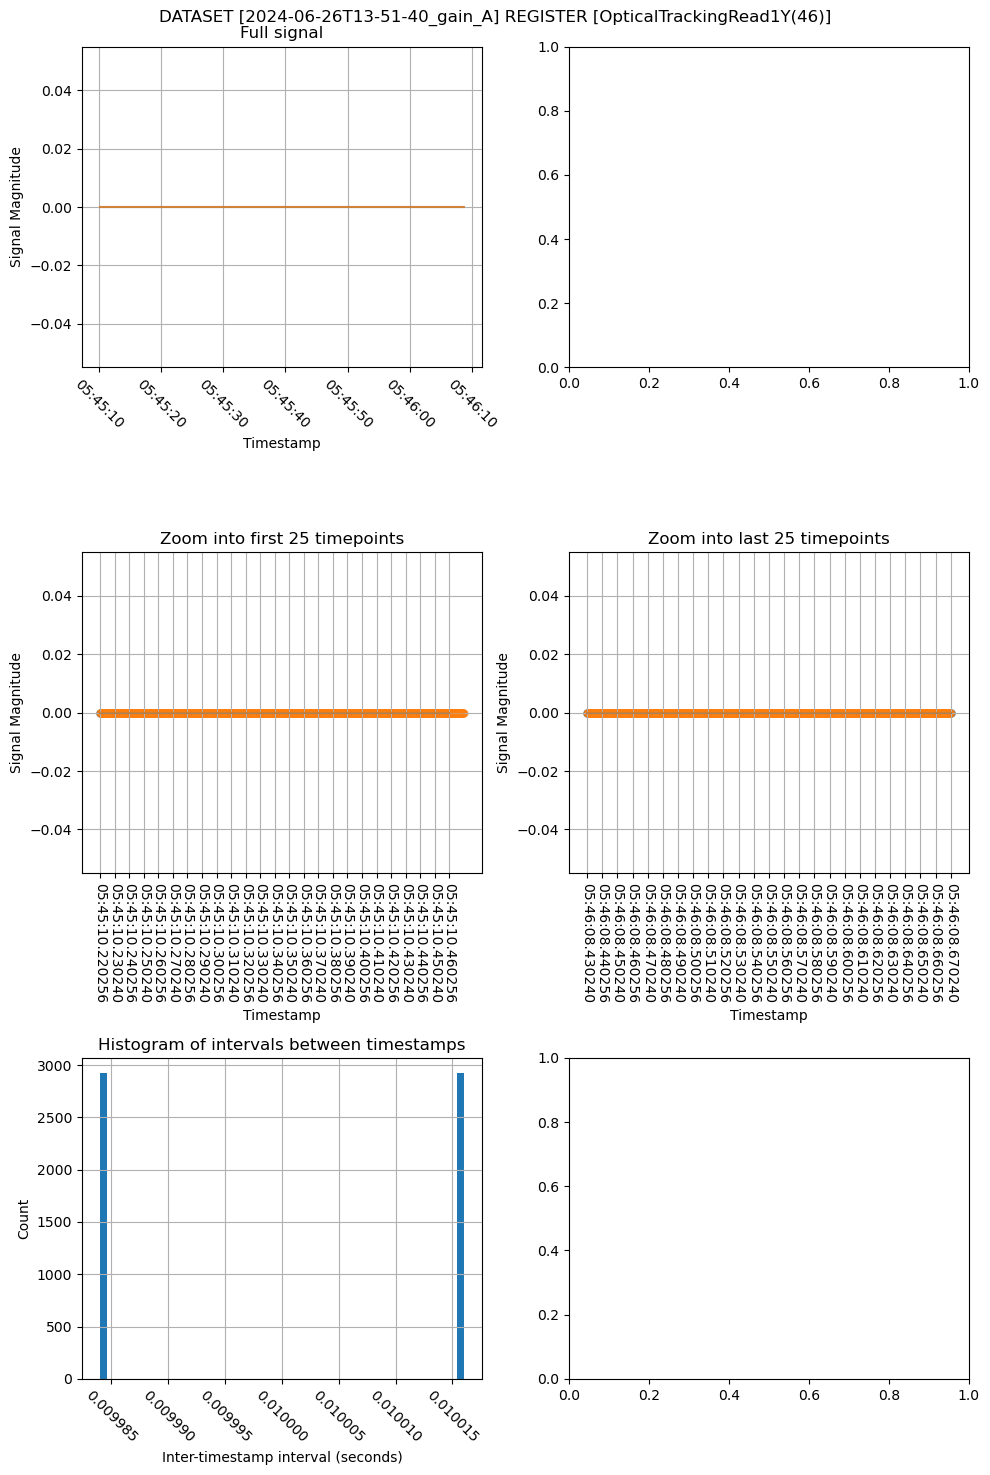

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:10.220256
1904-01-13 05:45:10.230240
1904-01-13 05:45:10.240256
1904-01-13 05:45:10.250240
1904-01-13 05:45:10.260256

First five resampled timestamps:
1904-01-13 05:45:10.220200
1904-01-13 05:45:10.220300
1904-01-13 05:45:10.220400
1904-01-13 05:45:10.220500
1904-01-13 05:45:10.220600


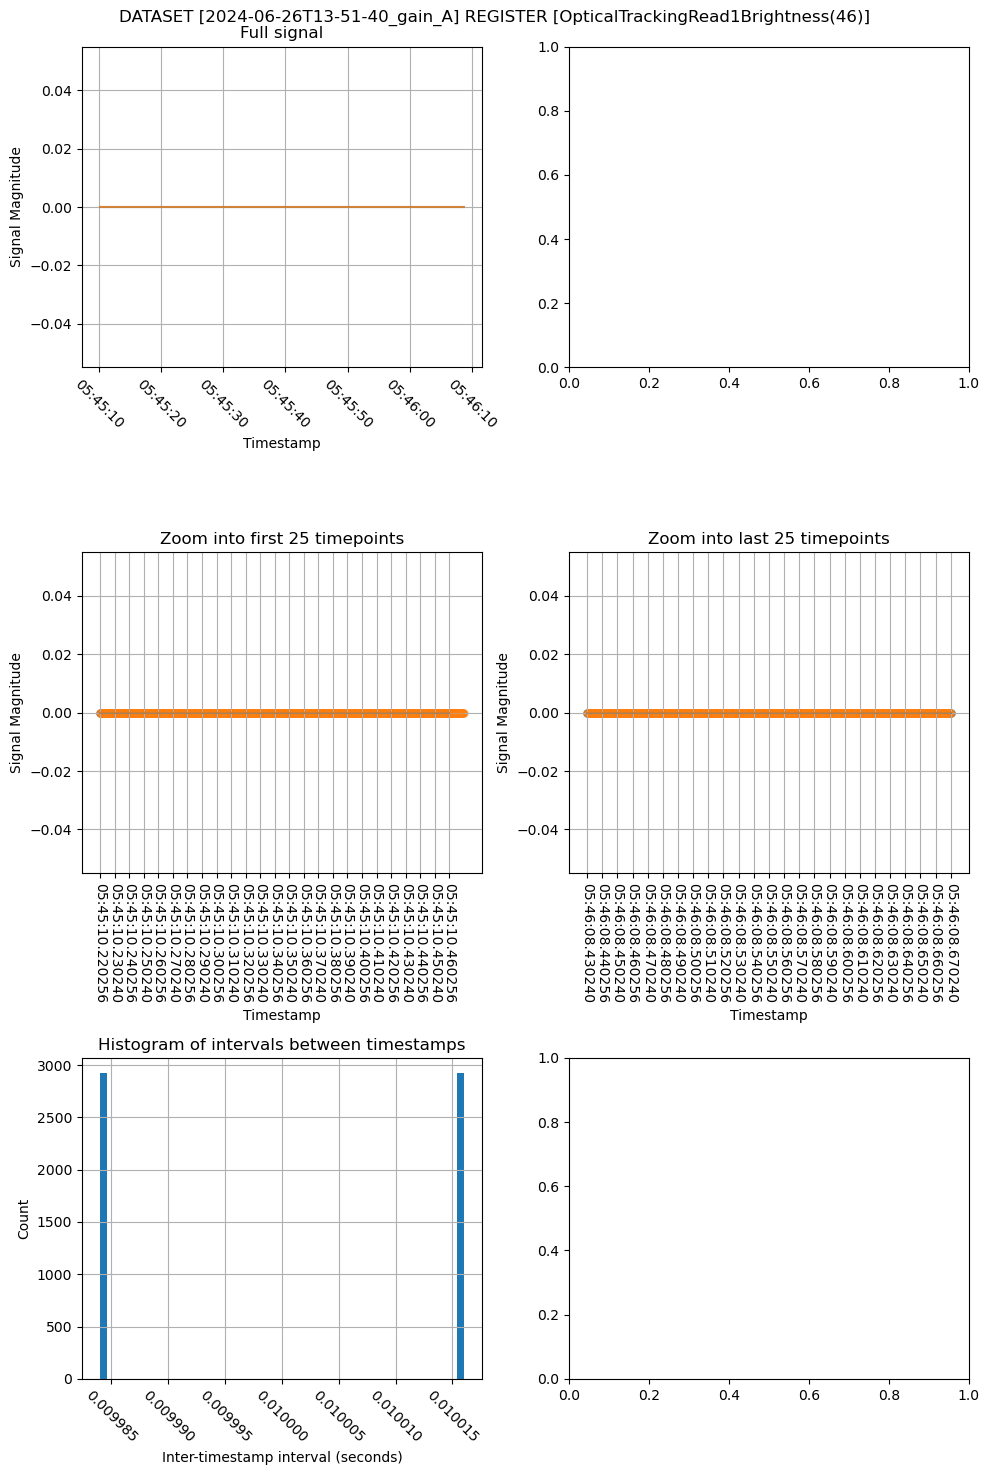

In [30]:
dataset_name = '2024-06-26T13-51-40_gain_A'

data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0X
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0X(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0Y
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0Y(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead0Brightness
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead0Brightness(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1X
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1X(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1Y
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1Y(46)')
data_stream = utils.load(get_register_object(46, 'h1'), base_path/dataset_name/'HarpDataH1').OpticalTrackingRead1Brightness
plot_detail(data_stream, dataset_name, register='OpticalTrackingRead1Brightness(46)')

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:02.822496
1904-01-13 05:45:02.841984
1904-01-13 05:45:02.856480
1904-01-13 05:45:02.879488
1904-01-13 05:45:02.899488

First five resampled timestamps:
1904-01-13 05:45:02.822400
1904-01-13 05:45:02.822500
1904-01-13 05:45:02.822600
1904-01-13 05:45:02.822700
1904-01-13 05:45:02.822800


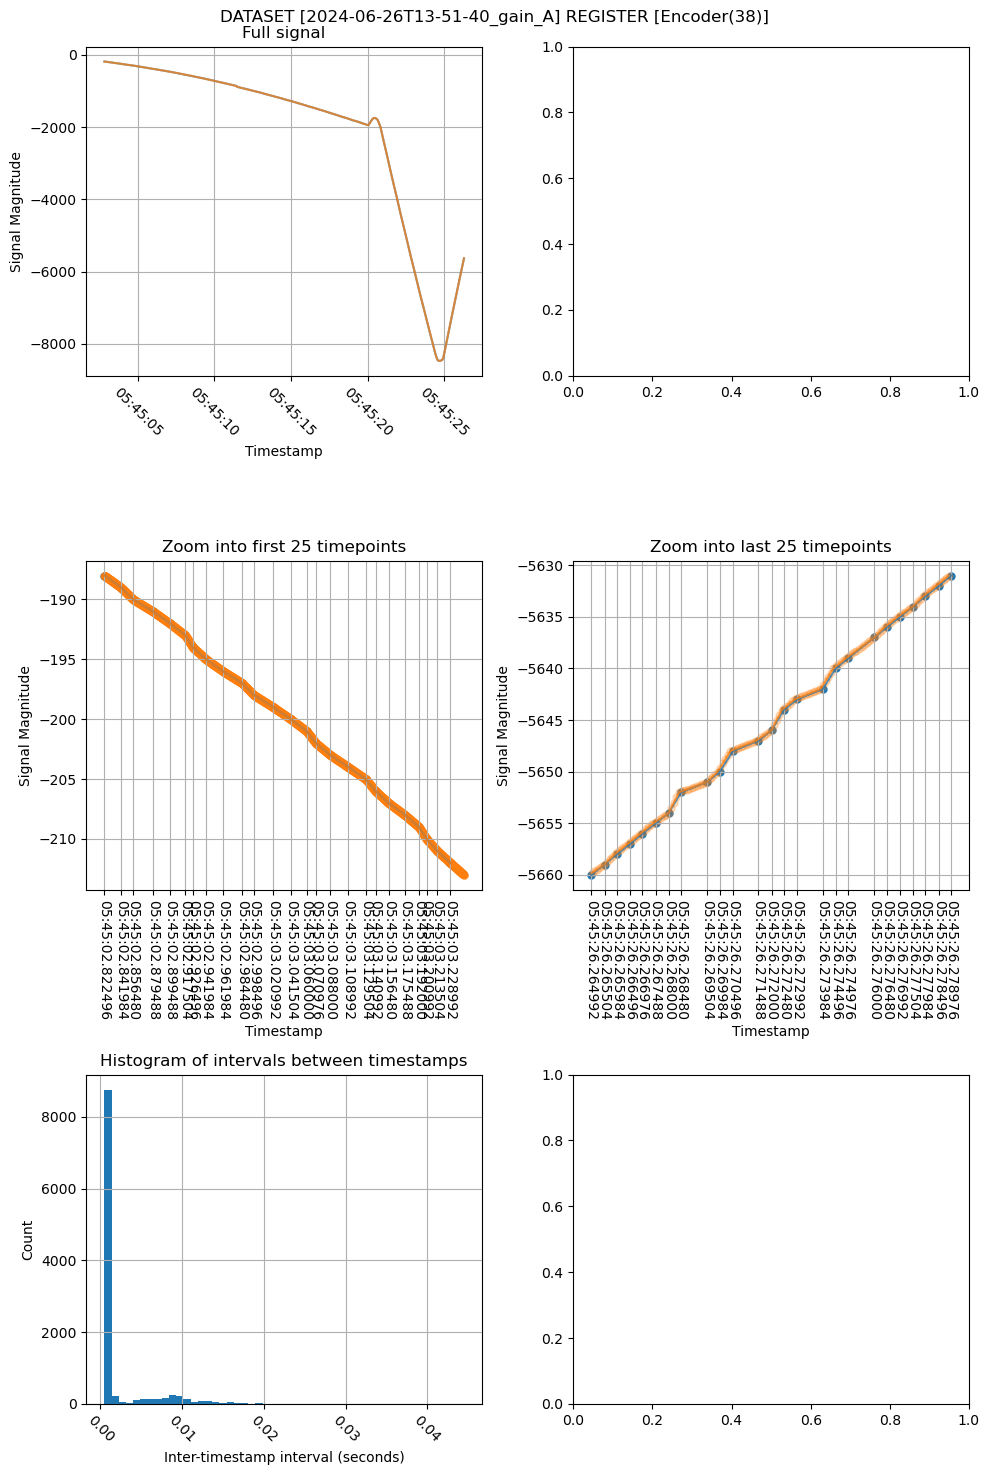

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:02.806976
1904-01-13 05:45:02.807488
1904-01-13 05:45:02.808000
1904-01-13 05:45:02.808480
1904-01-13 05:45:02.808992

First five resampled timestamps:
1904-01-13 05:45:02.806900
1904-01-13 05:45:02.807000
1904-01-13 05:45:02.807100
1904-01-13 05:45:02.807200
1904-01-13 05:45:02.807300


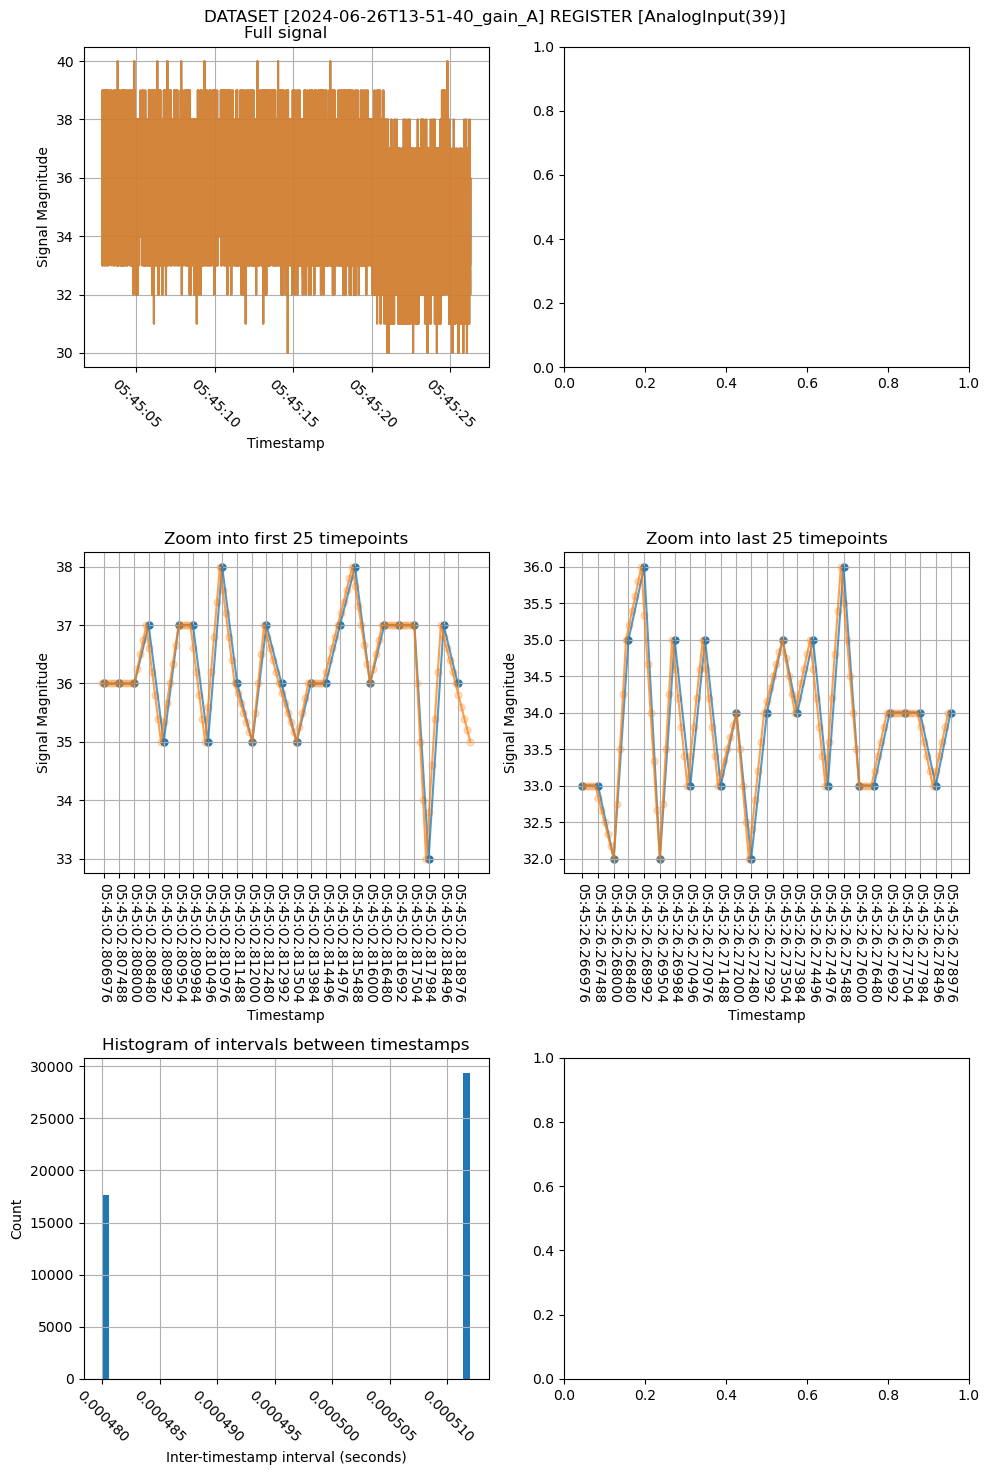

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-13 05:45:02.807488
1904-01-13 05:45:02.808480
1904-01-13 05:45:02.809504
1904-01-13 05:45:02.810496
1904-01-13 05:45:02.811488

First five resampled timestamps:
1904-01-13 05:45:02.807400
1904-01-13 05:45:02.807500
1904-01-13 05:45:02.807600
1904-01-13 05:45:02.807700
1904-01-13 05:45:02.807800


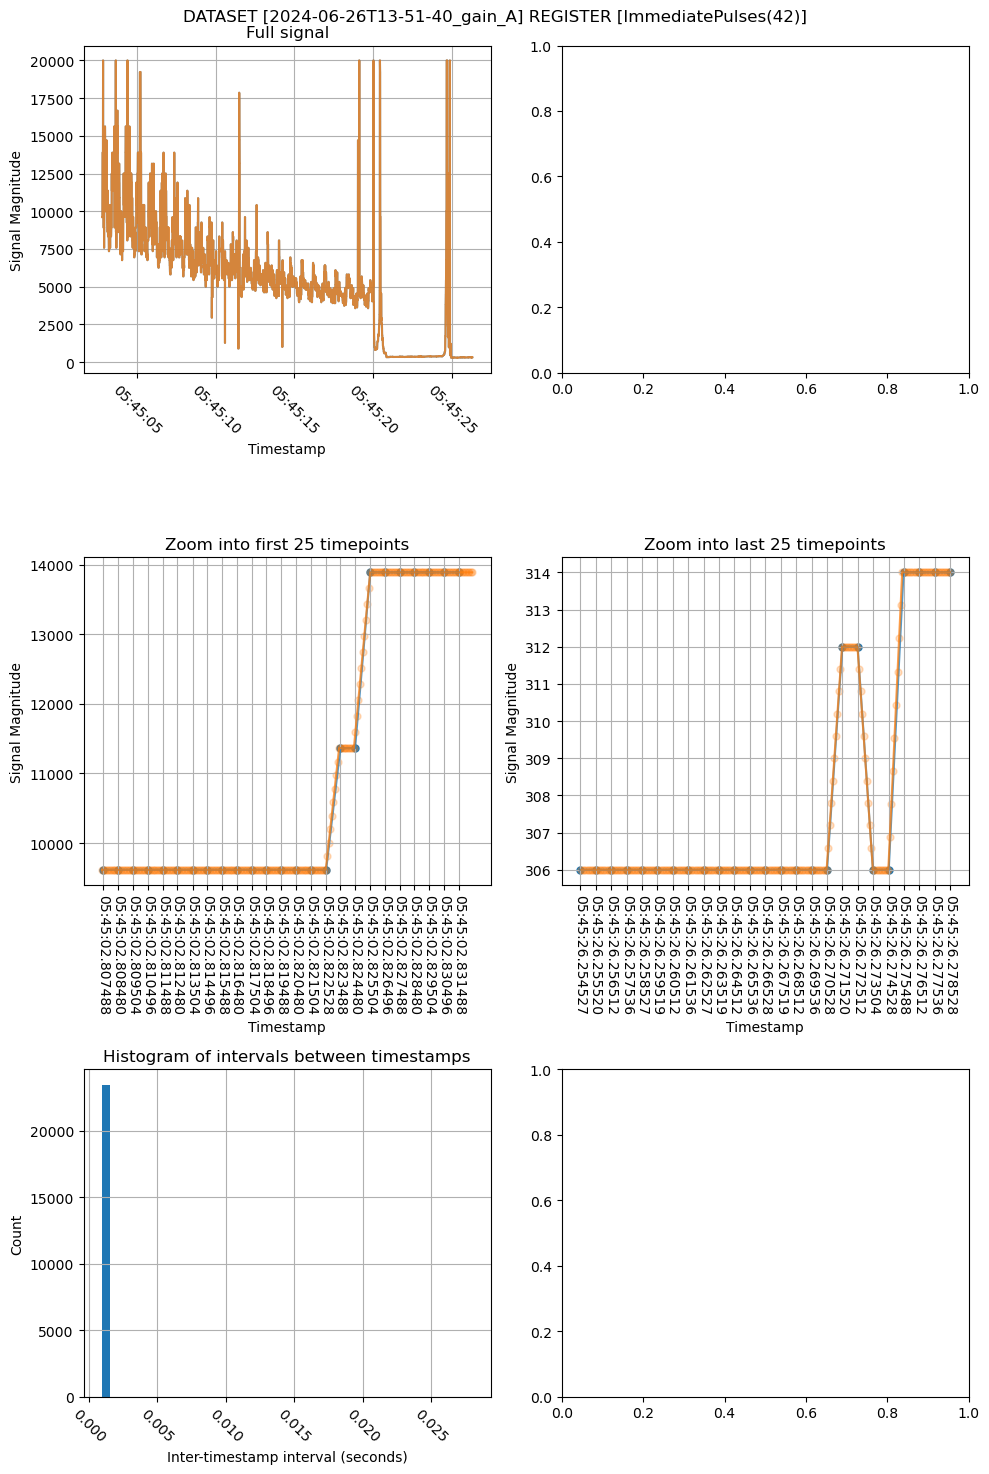

In [31]:
dataset_name = '2024-06-26T13-51-40_gain_A'

data_stream = utils.load(get_register_object(38, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='Encoder(38)')
data_stream = utils.load(get_register_object(39, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='AnalogInput(39)')
data_stream = utils.load(get_register_object(42, 'h2'), base_path/dataset_name/'HarpDataH2')
plot_detail(data_stream, dataset_name, register='ImmediatePulses(42)')

## Automatic loading

In [32]:
def load_register_paths(dataset_path):
    
    if not os.path.exists(dataset_path/'HarpDataH1') or not os.path.exists(dataset_path/'HarpDataH2'):
        raise FileNotFoundError(f"'HarpDataH1' or 'HarpDataH2' folder was not found in {dataset_path}.")
    h1_folder = dataset_path/'HarpDataH1'
    h2_folder = dataset_path/'HarpDataH2'
    
    h1_files = os.listdir(h1_folder)
    h1_files = [f for f in h1_files if f.split('_')[0] == 'HarpDataH1']
    h1_dict = {int(filename.split('_')[1]):h1_folder/filename for filename in h1_files}
    
    h2_files = os.listdir(h2_folder)
    h2_files = [f for f in h2_files if f.split('_')[0] == 'HarpDataH2']
    h2_dict = {int(filename.split('_')[1]):h2_folder/filename for filename in h2_files}
    
    print(f'Dataset {dataset_path.name} contains following registers:')
    print(f'H1: {list(h1_dict.keys())}')
    print(f'H2: {list(h2_dict.keys())}')
    
    return h1_dict, h2_dict

def load_registers(dataset_path):
    
    h1_dict, h2_dict = load_register_paths(dataset_path)
    
    h1_data_streams = {}
    for register in h1_dict.keys():
        data_stream = utils.load(get_register_object(register, 'h1'), dataset_path/'HarpDataH1')
        if data_stream.columns.shape[0] > 1:
            for col_name in data_stream.columns:
                h1_data_streams[f'{col_name}({register})'] = data_stream[col_name]
        elif data_stream.columns.shape[0] == 1:
            h1_data_streams[f'{data_stream.columns[0]}({register})'] = data_stream
        else:
            raise ValueError(f"Loaded data stream does not contain supported number of columns in Pandas DataFrame. Dataframe columns shape = {data_stream.columns.shape}")
            
    h2_data_streams = {}
    for register in h2_dict.keys():
        data_stream = utils.load(get_register_object(register, 'h2'), dataset_path/'HarpDataH2')
        if data_stream.columns.shape[0] > 1:
            for col_name in data_stream.columns:
                h2_data_streams[f'{col_name}({register})'] = data_stream[col_name]
        elif data_stream.columns.shape[0] == 1:
            h2_data_streams[f'{data_stream.columns[0]}({register})'] = data_stream[data_stream.columns[0]]
        else:
            raise ValueError(f"Loaded data stream does not contain supported number of columns in Pandas DataFrame. Dataframe columns shape = {data_stream.columns.shape}")
            
    return h1_data_streams, h2_data_streams

def plot_dataset(dataset_path):
    h1_data_streams, h2_data_streams = load_registers(dataset_path)
    for register, register_stream in h1_data_streams.items():
        plot_detail(register_stream, dataset_path.name, register=str(register))
    for register, register_stream in h2_data_streams.items():
        plot_detail(register_stream, dataset_path.name, register=str(register))

In [33]:
# load_registers(base_path/'2024-05-10T14-04-37')

In [34]:
base_path = Path('/home/ikharitonov/Desktop/motor_test_gain_with_Ede')

In [102]:
streams = load_registers(base_path/'2024-07-03T08-56-36')

Dataset 2024-07-03T08-56-36 contains following registers:
H1: [46]
H2: [39, 38, 42]


In [103]:
streams[0]

{'OpticalTrackingRead0X(46)': Time
 1904-01-20 00:49:53.770240      0
 1904-01-20 00:49:53.780256      1
 1904-01-20 00:49:53.790240      0
 1904-01-20 00:49:53.800256      0
 1904-01-20 00:49:53.810240      0
                              ... 
 1904-01-20 00:51:25.050240    447
 1904-01-20 00:51:25.060256    447
 1904-01-20 00:51:25.070240    447
 1904-01-20 00:51:25.080256    445
 1904-01-20 00:51:25.090240    443
 Name: OpticalTrackingRead0X, Length: 9133, dtype: int16,
 'OpticalTrackingRead0Y(46)': Time
 1904-01-20 00:49:53.770240     0
 1904-01-20 00:49:53.780256     0
 1904-01-20 00:49:53.790240    -1
 1904-01-20 00:49:53.800256     0
 1904-01-20 00:49:53.810240     0
                               ..
 1904-01-20 00:51:25.050240    48
 1904-01-20 00:51:25.060256    51
 1904-01-20 00:51:25.070240    49
 1904-01-20 00:51:25.080256    50
 1904-01-20 00:51:25.090240    40
 Name: OpticalTrackingRead0Y, Length: 9133, dtype: int16,
 'OpticalTrackingRead0Brightness(46)': Time
 1904-01-20

In [104]:
streams[1]

{'AnalogInput(39)': Time
 1904-01-20 00:49:53.758496    35
 1904-01-20 00:49:53.758976    37
 1904-01-20 00:49:53.759488    36
 1904-01-20 00:49:53.760000    36
 1904-01-20 00:49:53.760480    35
                               ..
 1904-01-20 00:50:38.854496    34
 1904-01-20 00:50:38.854976    36
 1904-01-20 00:50:38.855488    36
 1904-01-20 00:50:38.856000    36
 1904-01-20 00:50:38.856480    37
 Name: AnalogInput, Length: 90197, dtype: int16,
 'Encoder(38)': Time
 1904-01-20 00:49:54.810496      4
 1904-01-20 00:49:54.815488      5
 1904-01-20 00:49:54.818976      6
 1904-01-20 00:49:54.821984      7
 1904-01-20 00:49:55.211488      6
                              ... 
 1904-01-20 00:50:38.836992   -460
 1904-01-20 00:50:38.841504   -461
 1904-01-20 00:50:38.846496   -462
 1904-01-20 00:50:38.848992   -463
 1904-01-20 00:50:38.853504   -464
 Name: Encoder, Length: 8877, dtype: int16,
 'ImmediatePulses(42)': Time
 1904-01-20 00:49:54.808480     200
 1904-01-20 00:49:54.809504       0
 

In [106]:
streams = load_registers(base_path/'2024-07-03T13-21-24')

Dataset 2024-07-03T13-21-24 contains following registers:
H1: [46]
H2: [39, 42, 38]


In [107]:
streams[0]

{'OpticalTrackingRead0X(46)': Time
 1904-01-20 05:14:49.930240       0
 1904-01-20 05:14:49.940256       0
 1904-01-20 05:14:49.950240       0
 1904-01-20 05:14:49.960256       0
 1904-01-20 05:14:49.970240       1
                               ... 
 1904-01-20 05:17:17.680256   -1885
 1904-01-20 05:17:17.690240   -1868
 1904-01-20 05:17:17.700256   -1853
 1904-01-20 05:17:17.710240   -1843
 1904-01-20 05:17:17.720256   -1836
 Name: OpticalTrackingRead0X, Length: 14780, dtype: int16,
 'OpticalTrackingRead0Y(46)': Time
 1904-01-20 05:14:49.930240     0
 1904-01-20 05:14:49.940256     0
 1904-01-20 05:14:49.950240     0
 1904-01-20 05:14:49.960256     0
 1904-01-20 05:14:49.970240     0
                               ..
 1904-01-20 05:17:17.680256   -89
 1904-01-20 05:17:17.690240   -89
 1904-01-20 05:17:17.700256   -74
 1904-01-20 05:17:17.710240   -78
 1904-01-20 05:17:17.720256   -68
 Name: OpticalTrackingRead0Y, Length: 14780, dtype: int16,
 'OpticalTrackingRead0Brightness(46)': Tim

In [108]:
streams[1]

{'AnalogInput(39)': Time
 1904-01-20 05:14:49.921504    34
 1904-01-20 05:14:49.921984    36
 1904-01-20 05:14:49.922496    36
 1904-01-20 05:14:49.922976    36
 1904-01-20 05:14:49.923488    37
                               ..
 1904-01-20 05:15:44.917504    35
 1904-01-20 05:15:44.917984    36
 1904-01-20 05:15:44.918496    33
 1904-01-20 05:15:44.918976    34
 1904-01-20 05:15:44.919488    35
 Name: AnalogInput, Length: 109997, dtype: int16,
 'ImmediatePulses(42)': Time
 1904-01-20 05:14:59.189504     200
 1904-01-20 05:14:59.190496       0
 1904-01-20 05:14:59.702496       0
 1904-01-20 05:14:59.703488       0
 1904-01-20 05:14:59.704480       0
                               ... 
 1904-01-20 05:17:01.912480    2066
 1904-01-20 05:17:01.921504    1923
 1904-01-20 05:17:01.922496    1923
 1904-01-20 05:17:01.931488    1748
 1904-01-20 05:17:01.932480    1748
 Name: ImmediatePulses, Length: 99209, dtype: int16,
 'Encoder(38)': Time
 1904-01-20 05:14:59.193504      23
 1904-01-20 05:1

In [ ]:
# resample_stream(data_stream_df, resampling_period='0.1ms', method='linear')

Dataset 2024-07-03T08-56-36 contains following registers:
H1: [46]
H2: [39, 38, 42]


/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


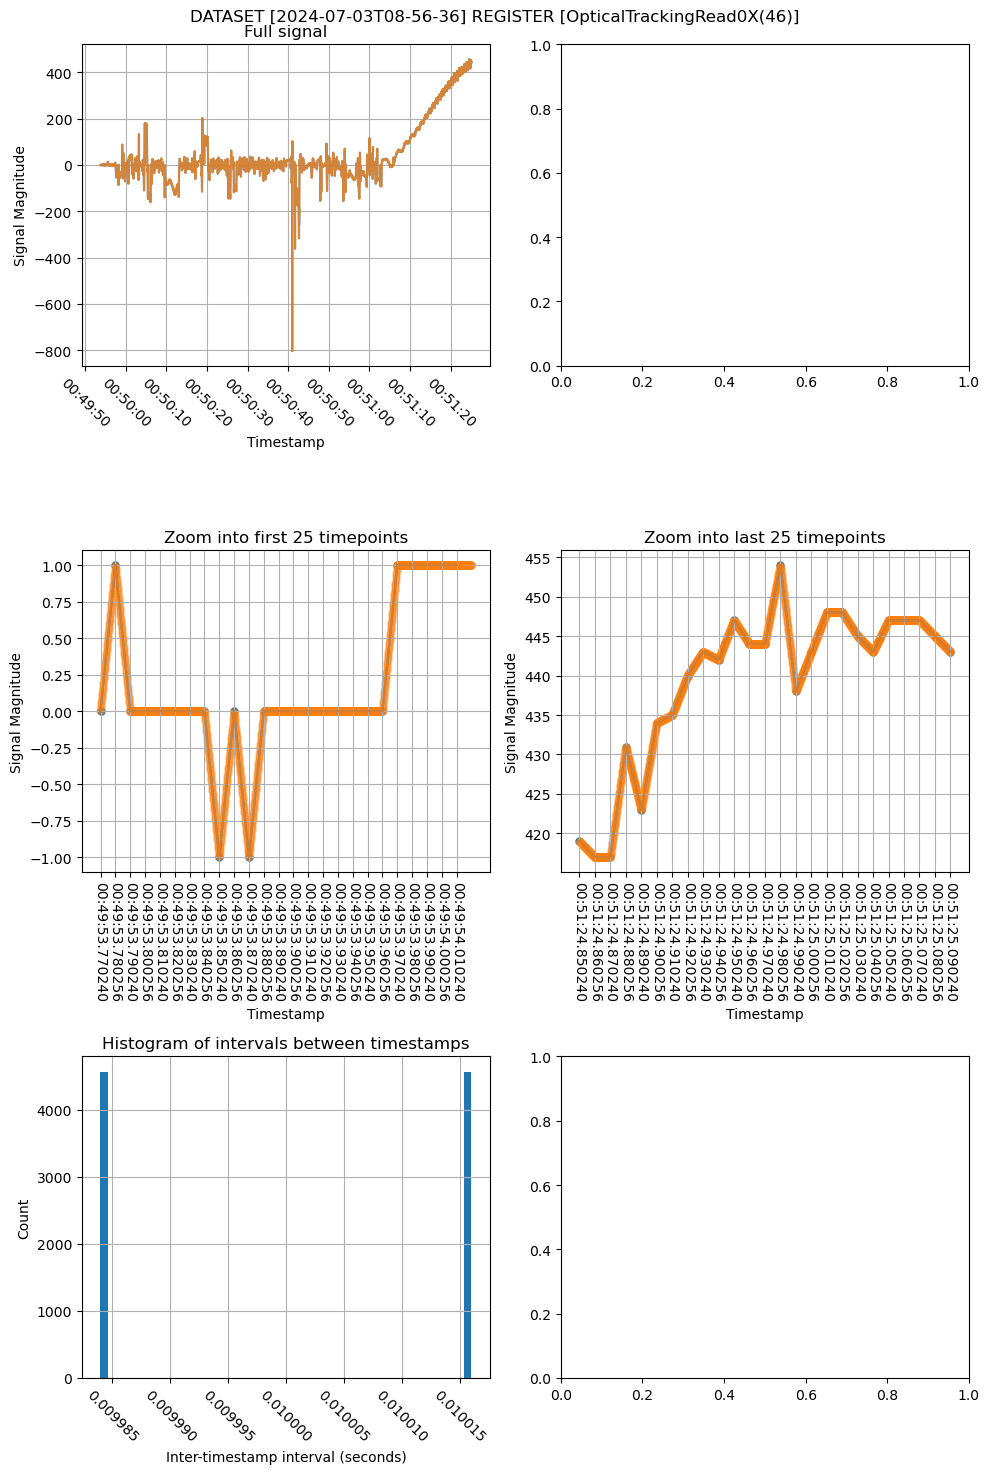

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


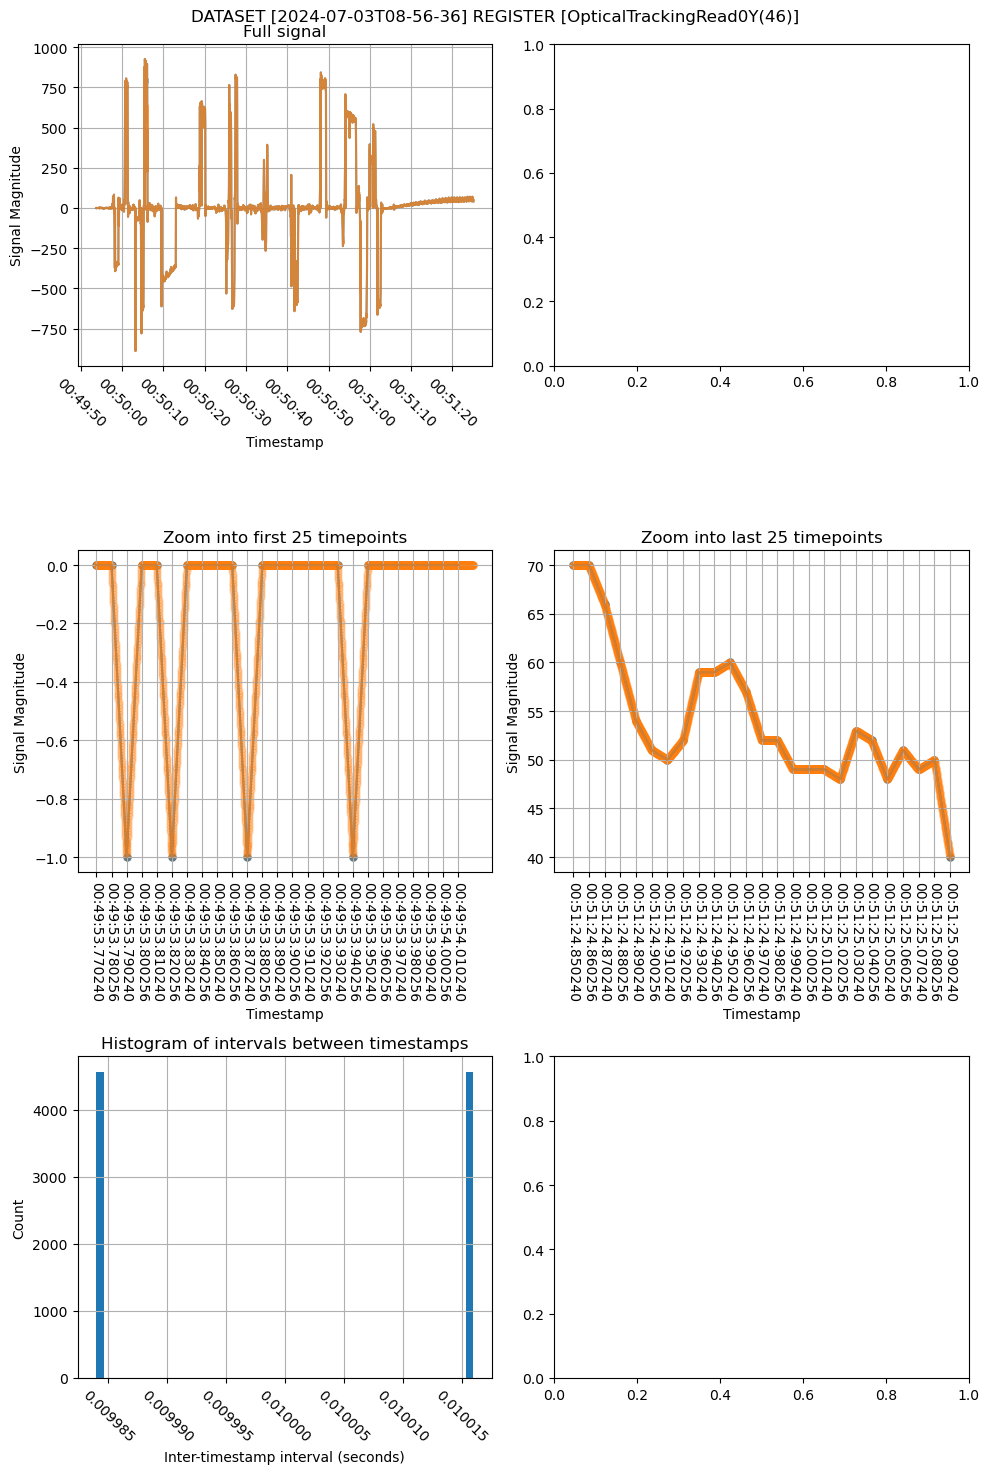

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


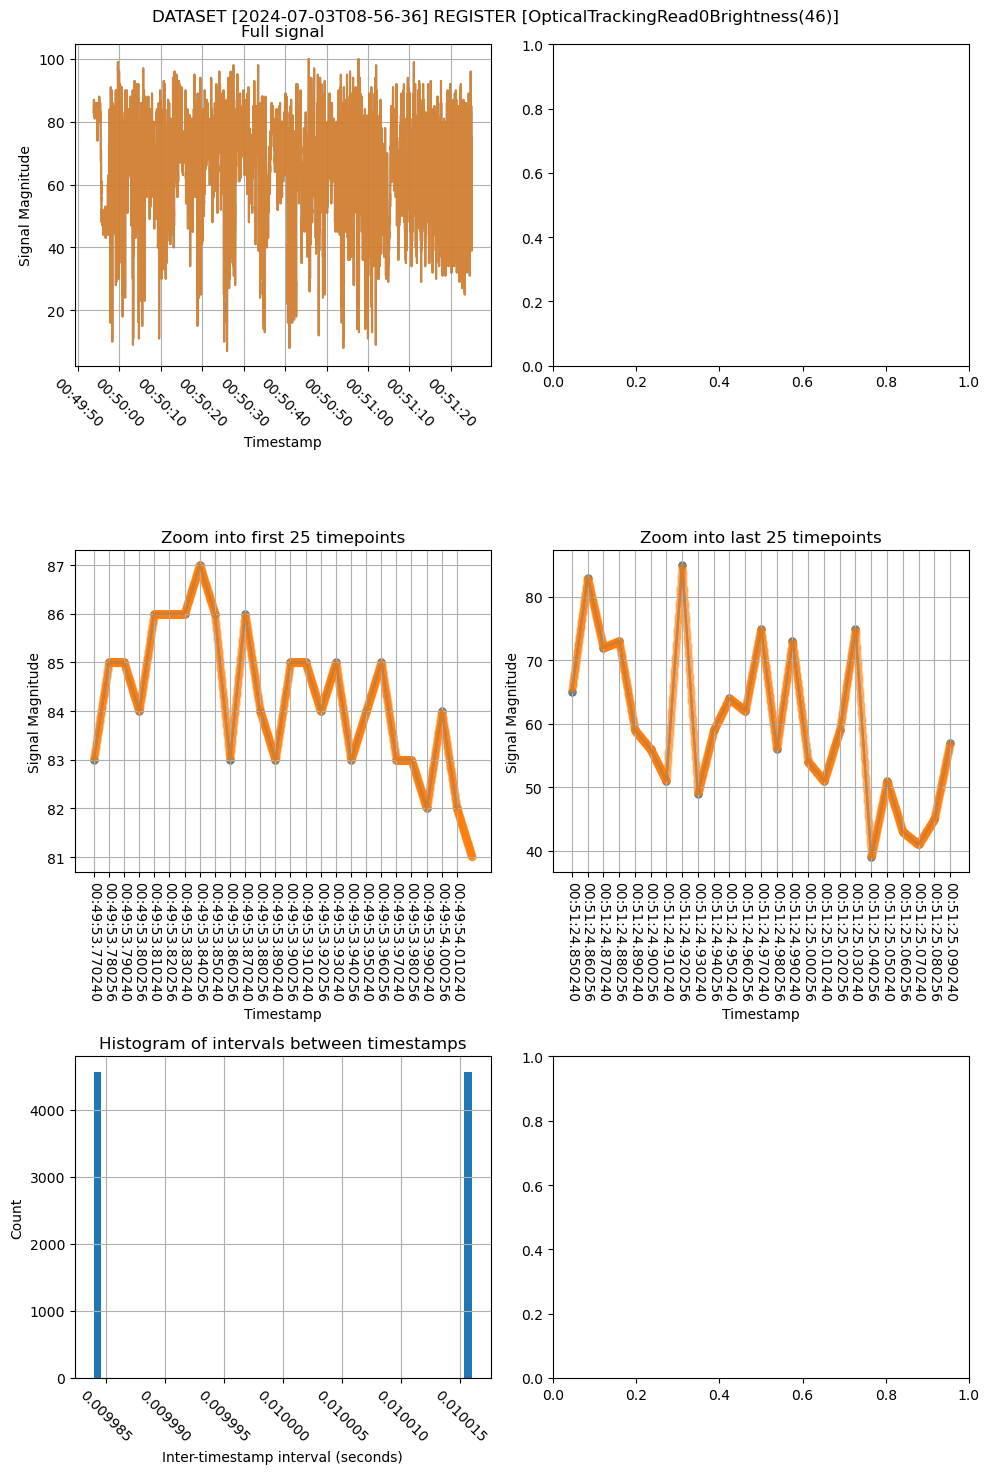

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


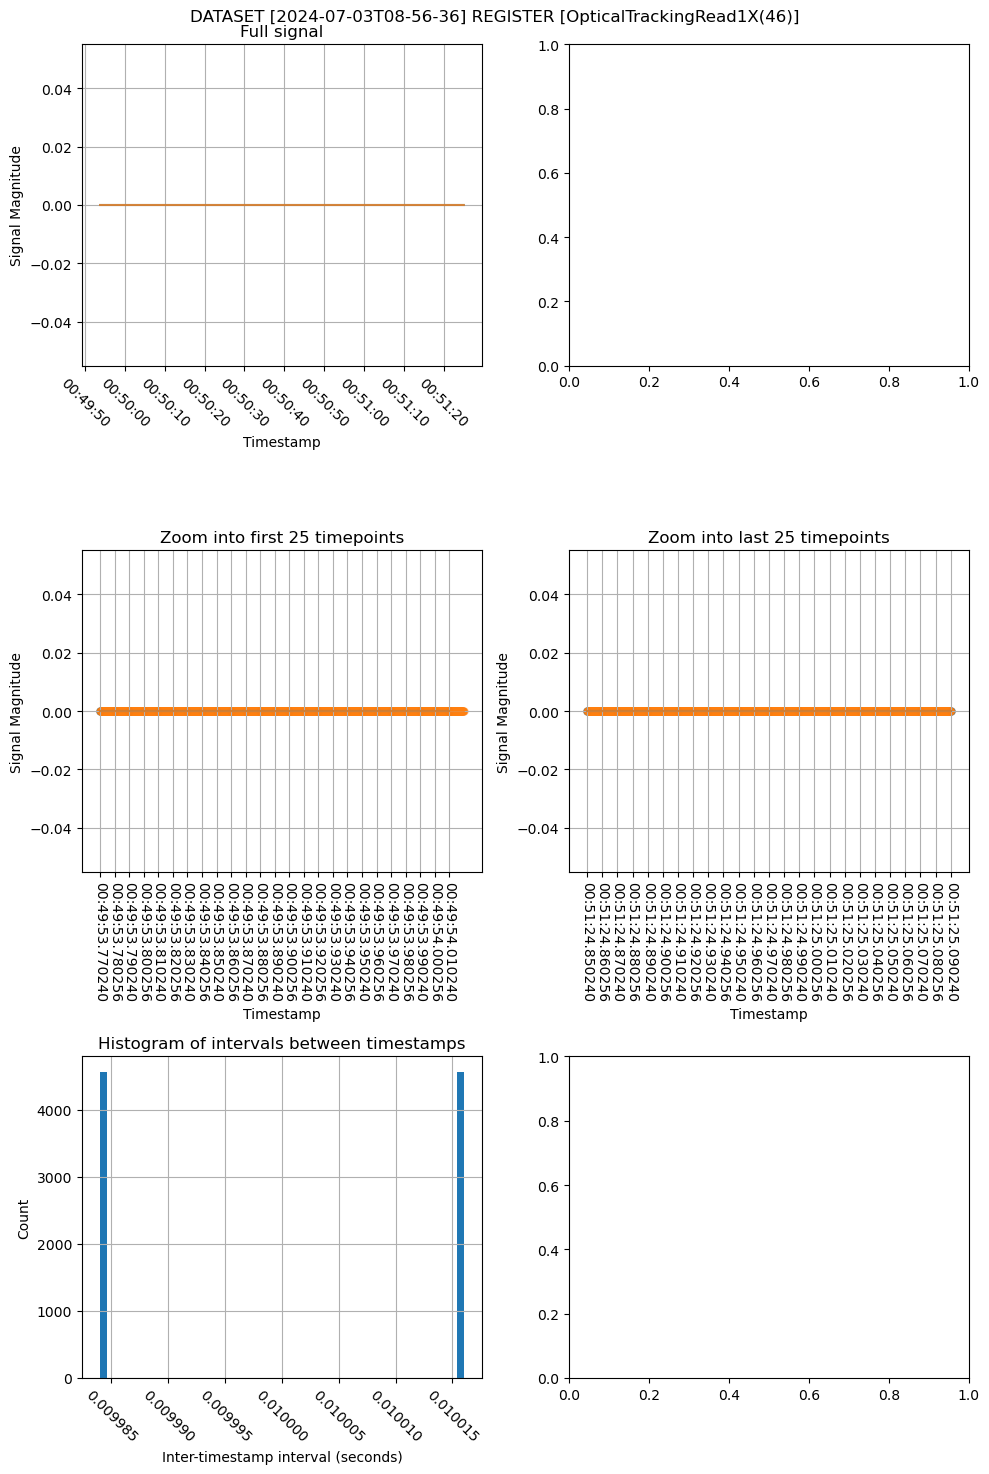

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


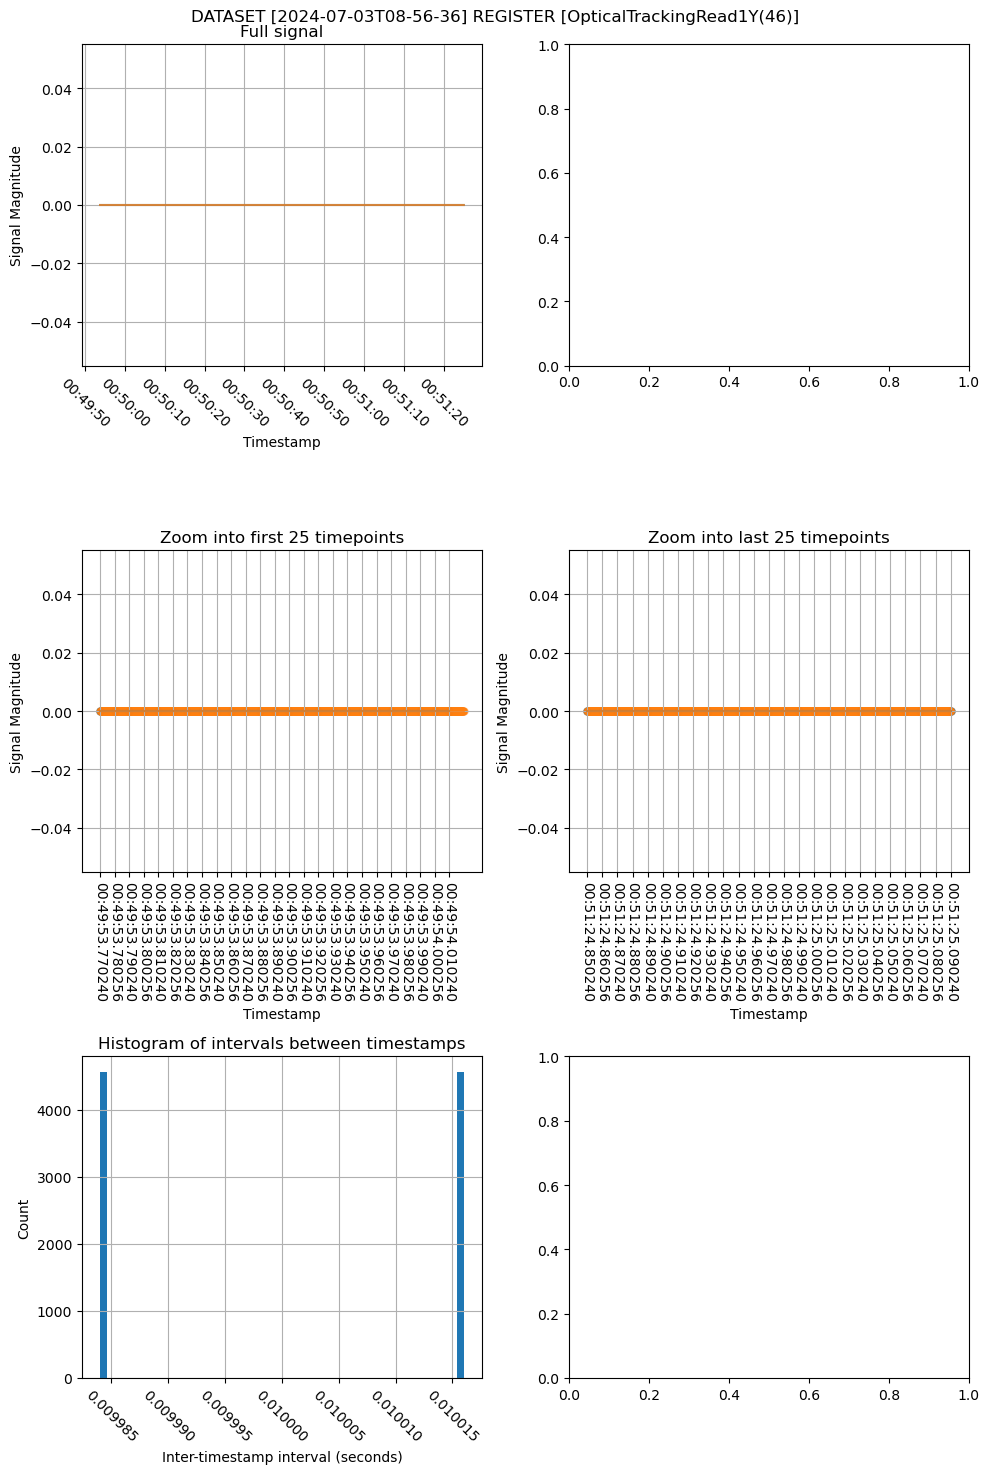

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.770240
1904-01-20 00:49:53.780256
1904-01-20 00:49:53.790240
1904-01-20 00:49:53.800256
1904-01-20 00:49:53.810240

First five resampled timestamps:
1904-01-20 00:49:53.770200
1904-01-20 00:49:53.770300
1904-01-20 00:49:53.770400
1904-01-20 00:49:53.770500
1904-01-20 00:49:53.770600


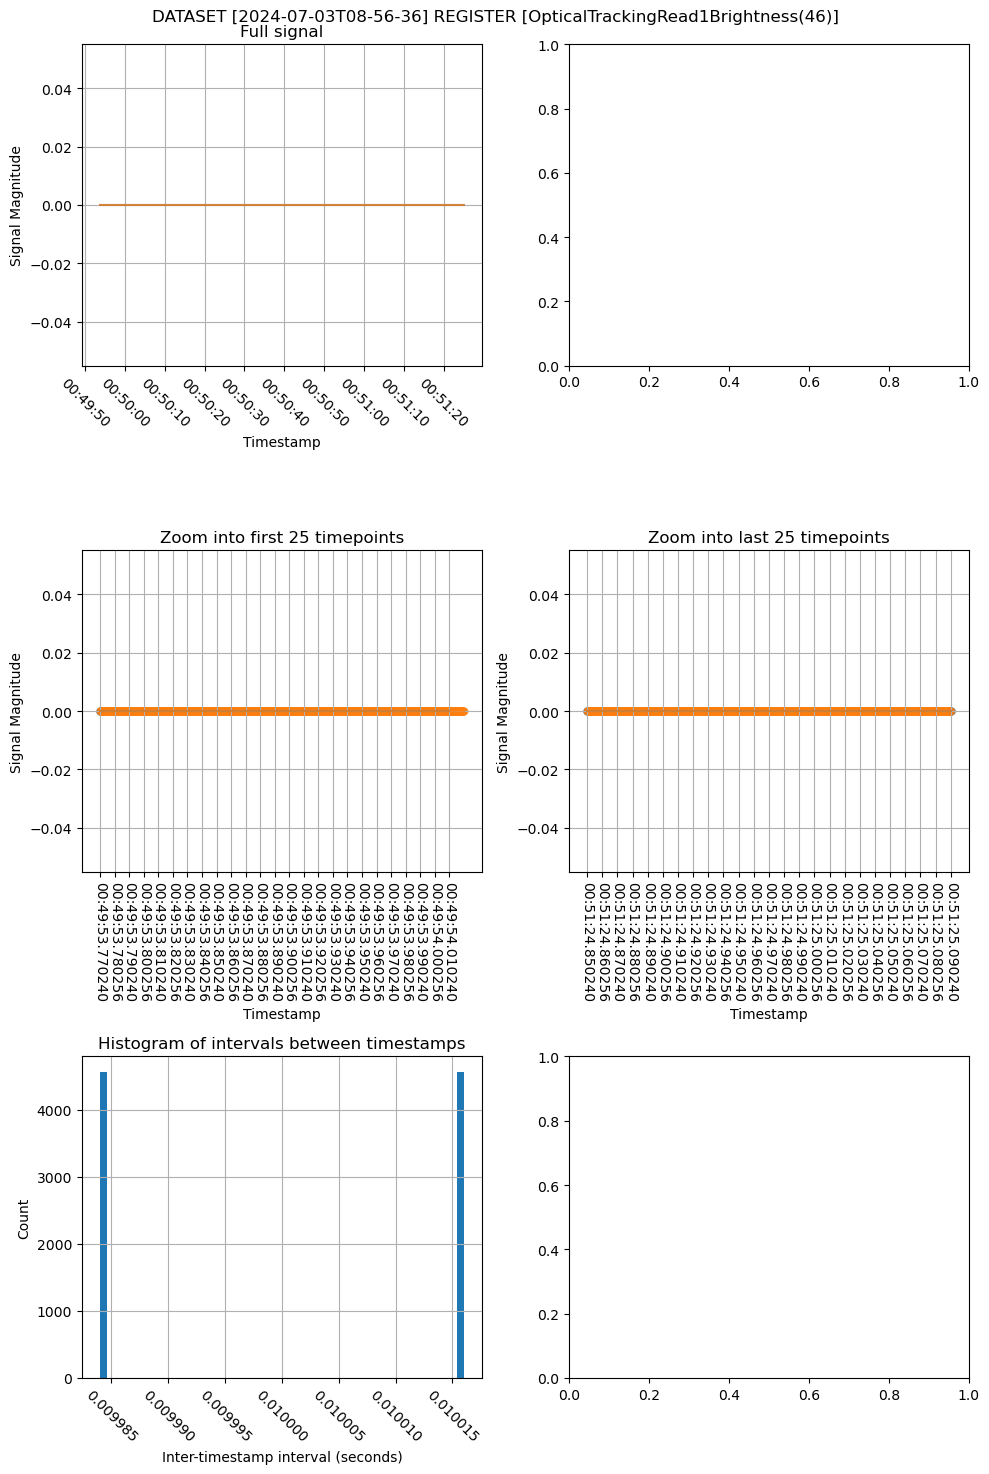

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:53.758496
1904-01-20 00:49:53.758976
1904-01-20 00:49:53.759488
1904-01-20 00:49:53.760000
1904-01-20 00:49:53.760480

First five resampled timestamps:
1904-01-20 00:49:53.758400
1904-01-20 00:49:53.758500
1904-01-20 00:49:53.758600
1904-01-20 00:49:53.758700
1904-01-20 00:49:53.758800


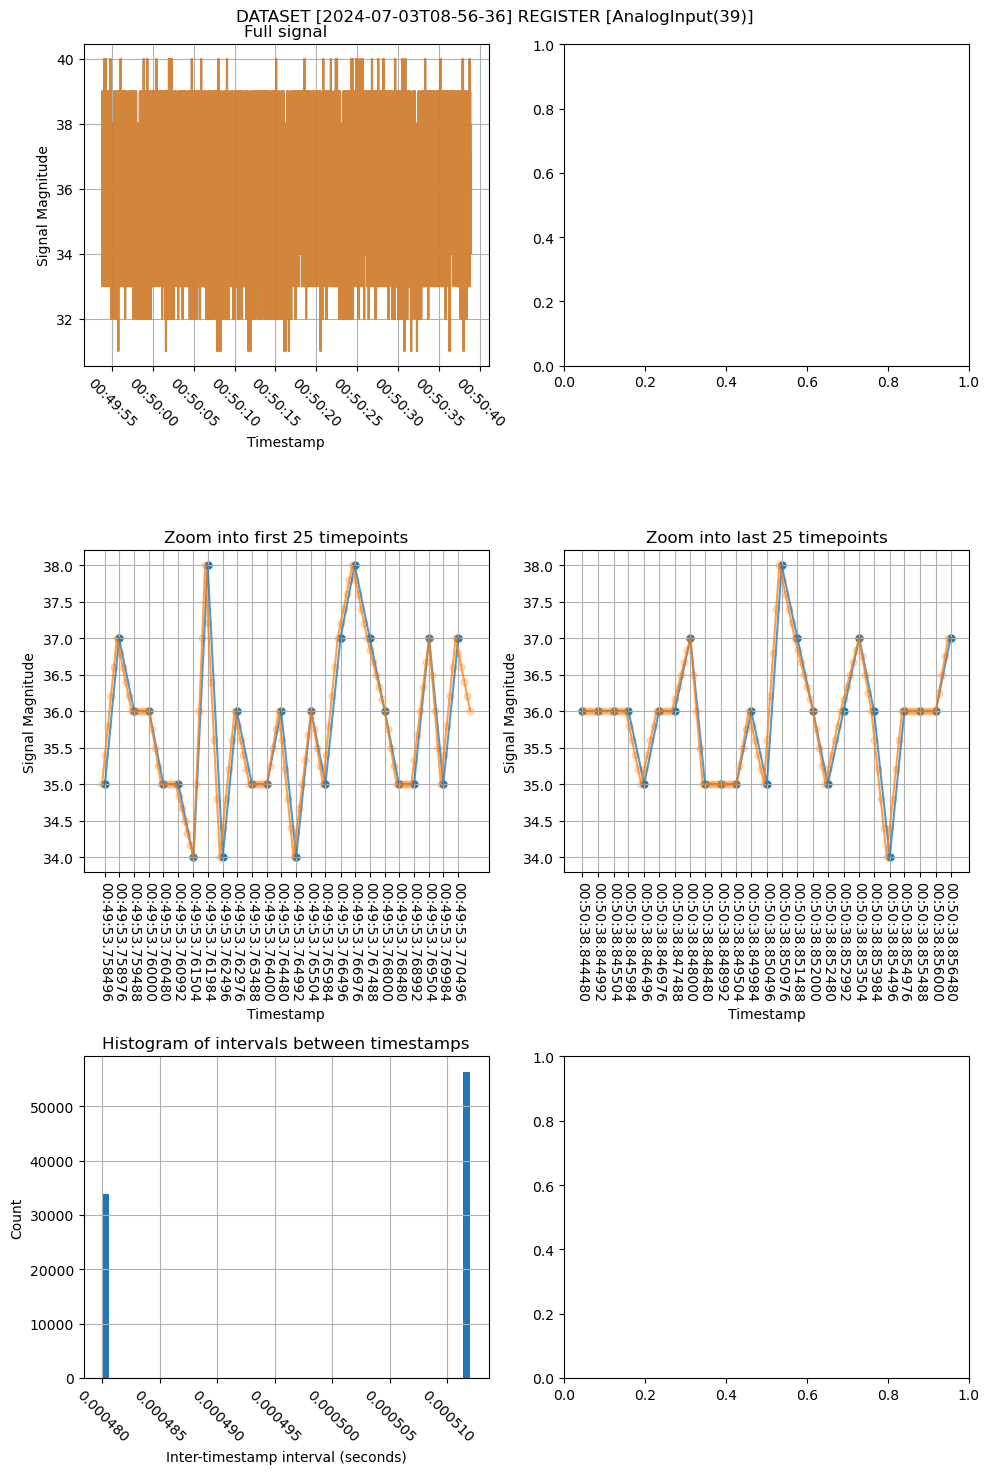

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:54.810496
1904-01-20 00:49:54.815488
1904-01-20 00:49:54.818976
1904-01-20 00:49:54.821984
1904-01-20 00:49:55.211488

First five resampled timestamps:
1904-01-20 00:49:54.810400
1904-01-20 00:49:54.810500
1904-01-20 00:49:54.810600
1904-01-20 00:49:54.810700
1904-01-20 00:49:54.810800


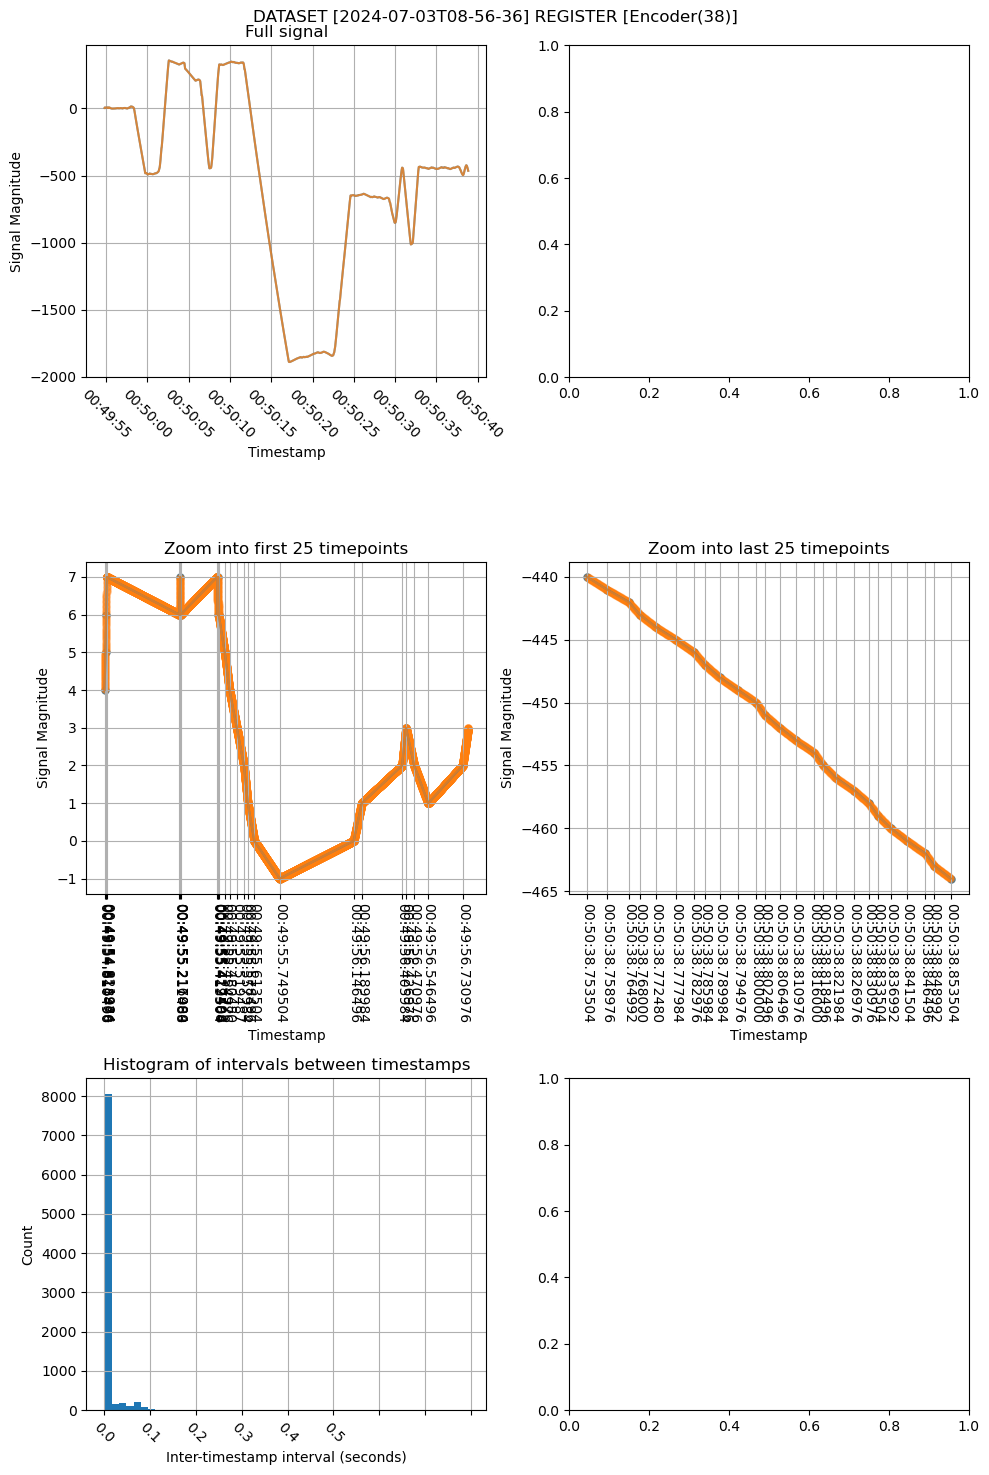

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 00:49:54.808480
1904-01-20 00:49:54.809504
1904-01-20 00:49:55.318496
1904-01-20 00:49:55.319488
1904-01-20 00:49:55.320480

First five resampled timestamps:
1904-01-20 00:49:54.808400
1904-01-20 00:49:54.808500
1904-01-20 00:49:54.808600
1904-01-20 00:49:54.808700
1904-01-20 00:49:54.808800


/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


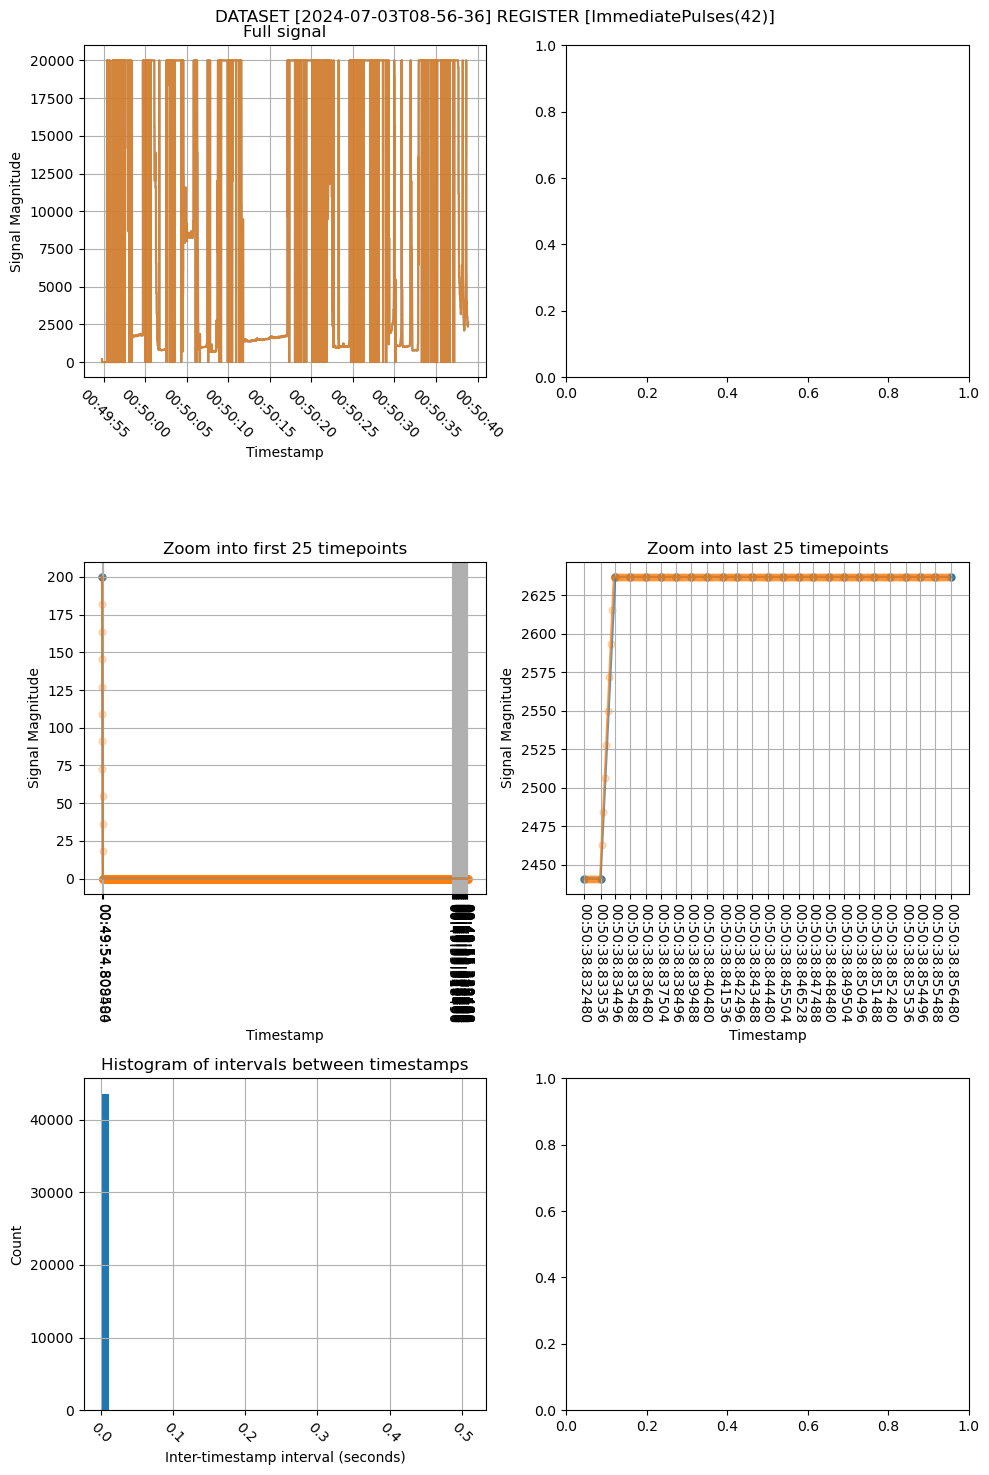

In [105]:
plot_dataset(base_path/'2024-07-03T08-56-36')

Dataset 2024-07-03T13-21-24 contains following registers:
H1: [46]
H2: [39, 42, 38]


/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


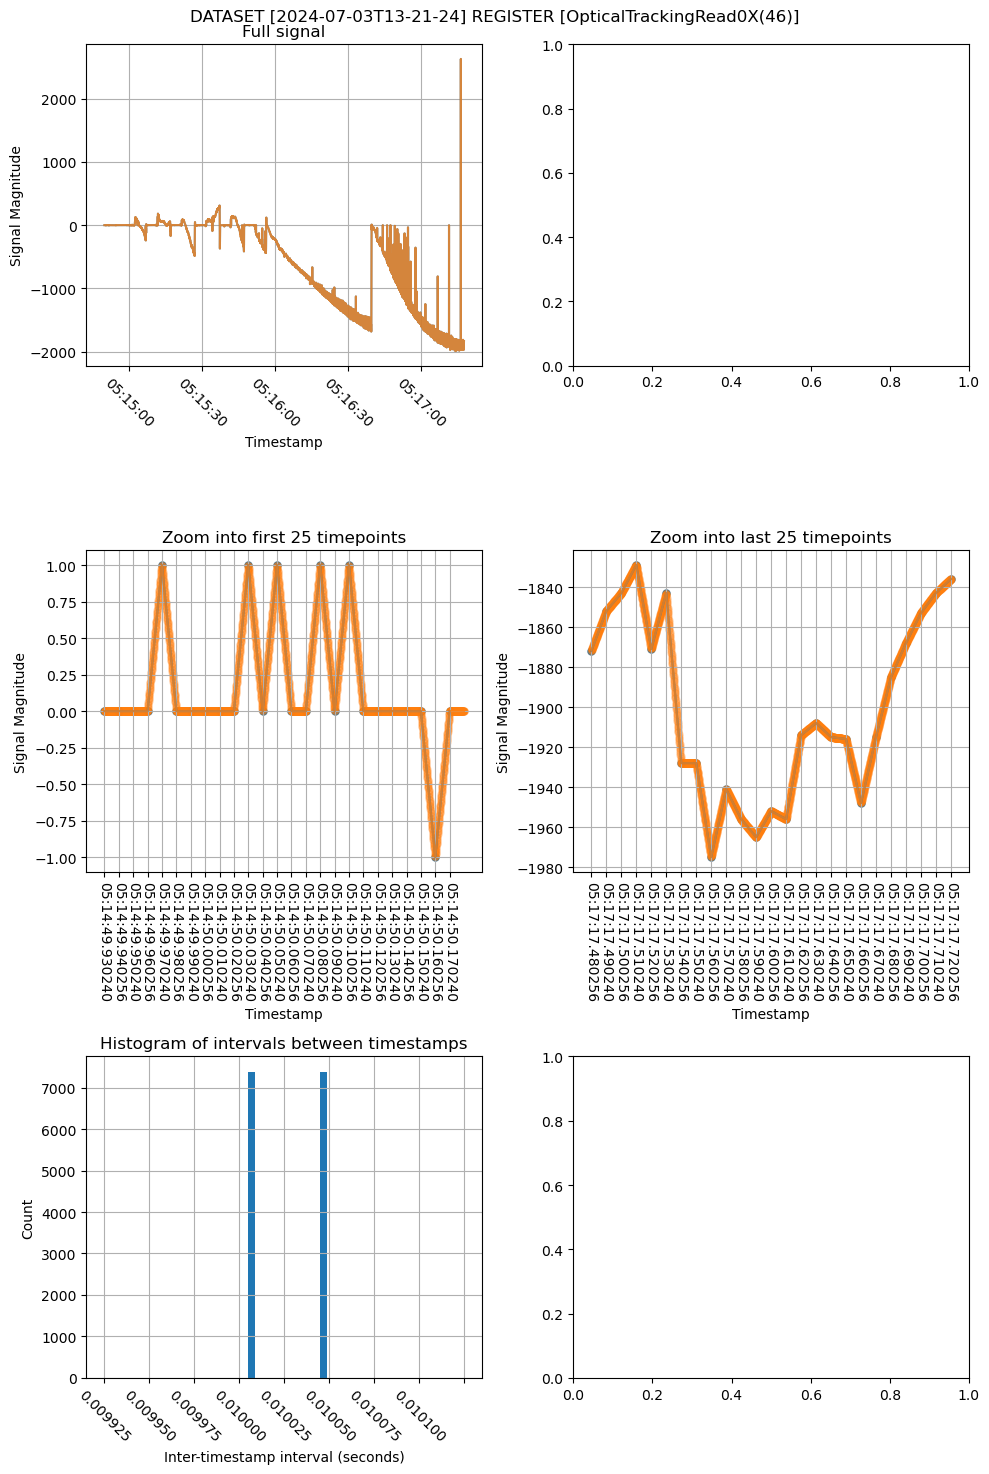

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


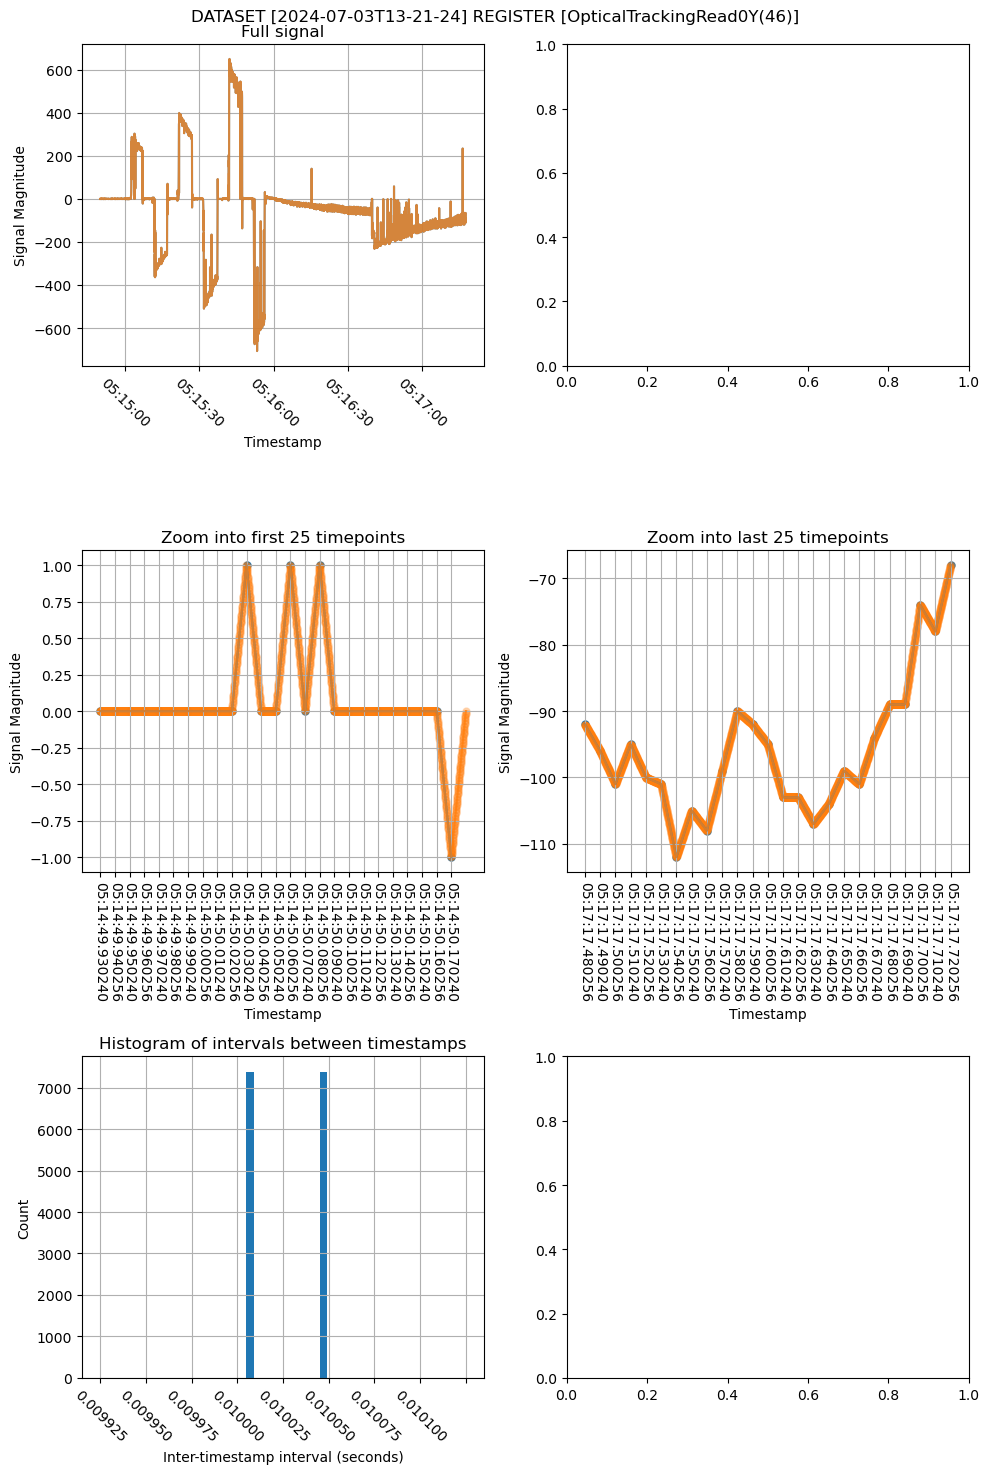

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


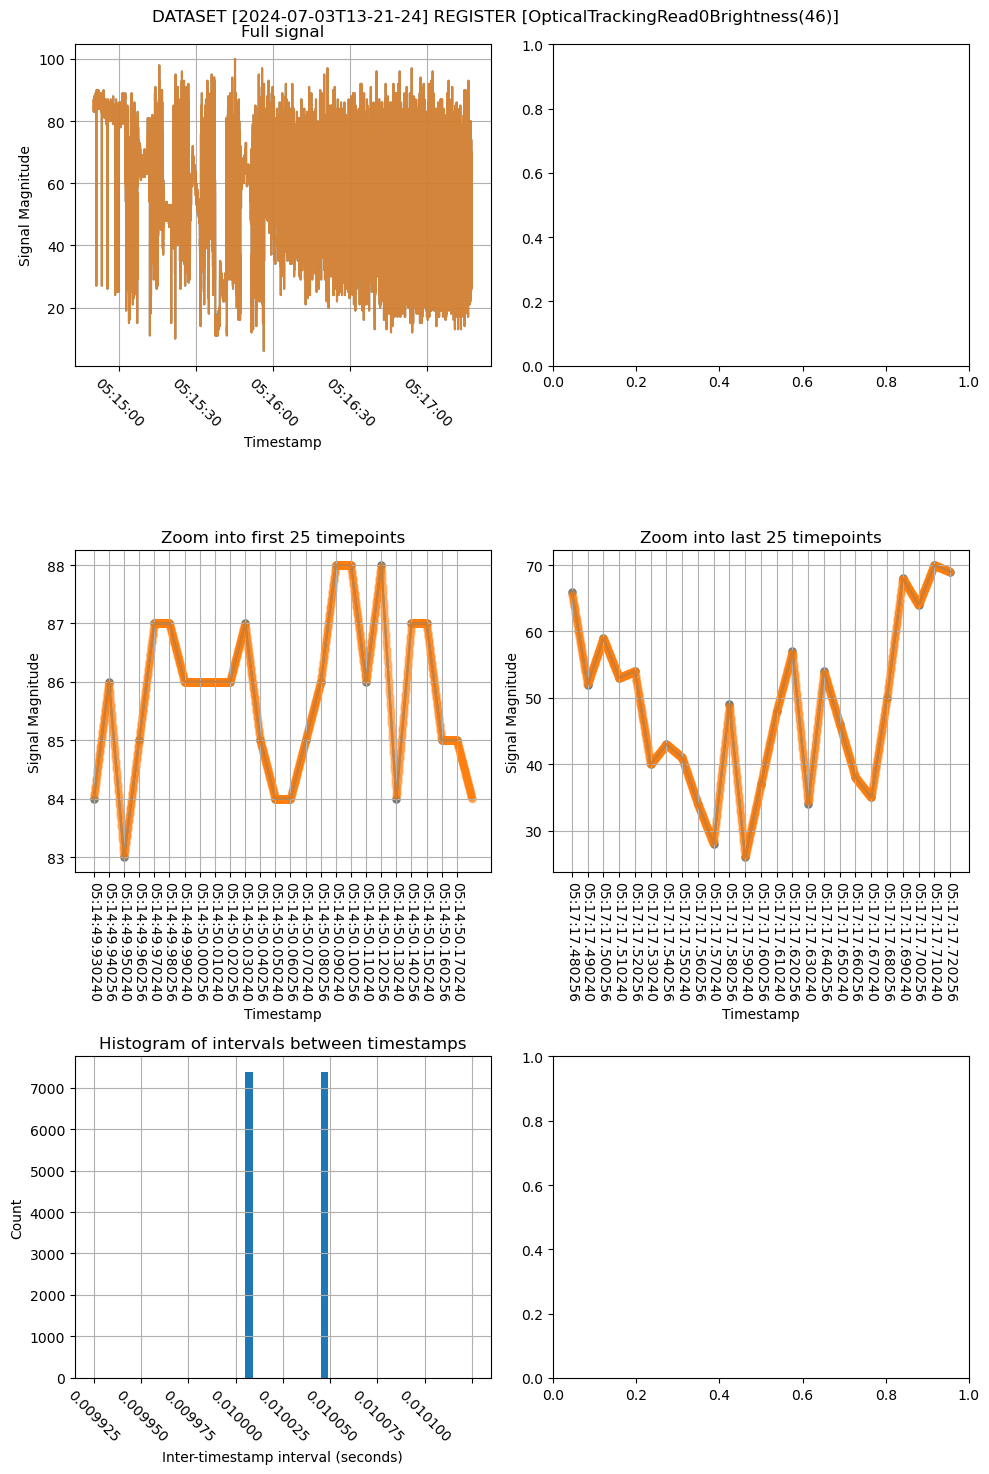

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


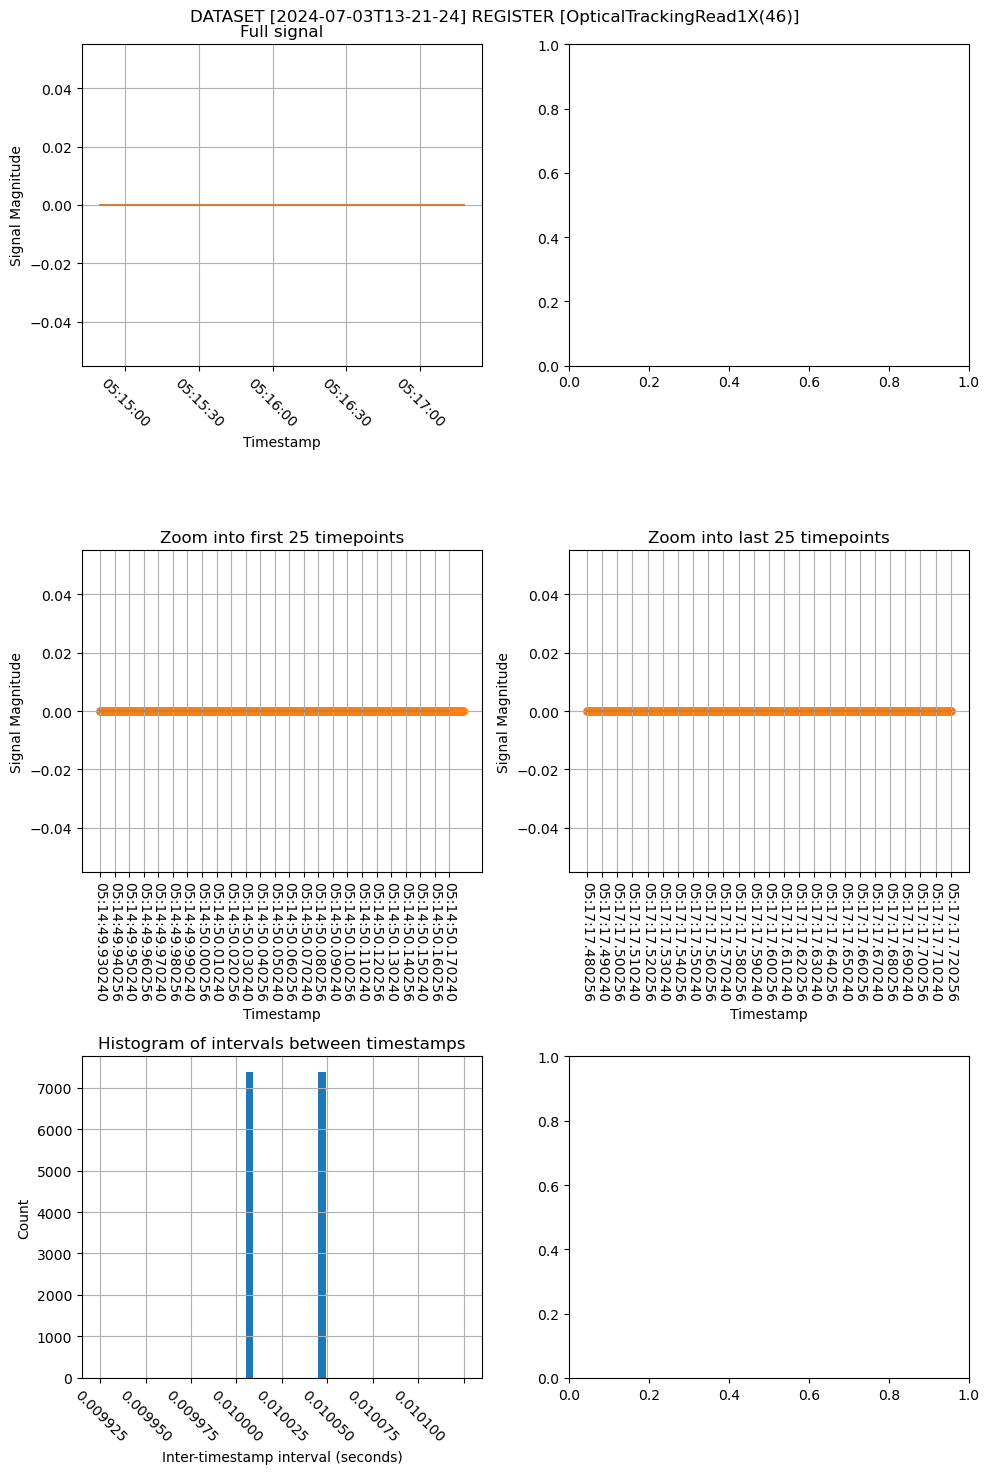

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


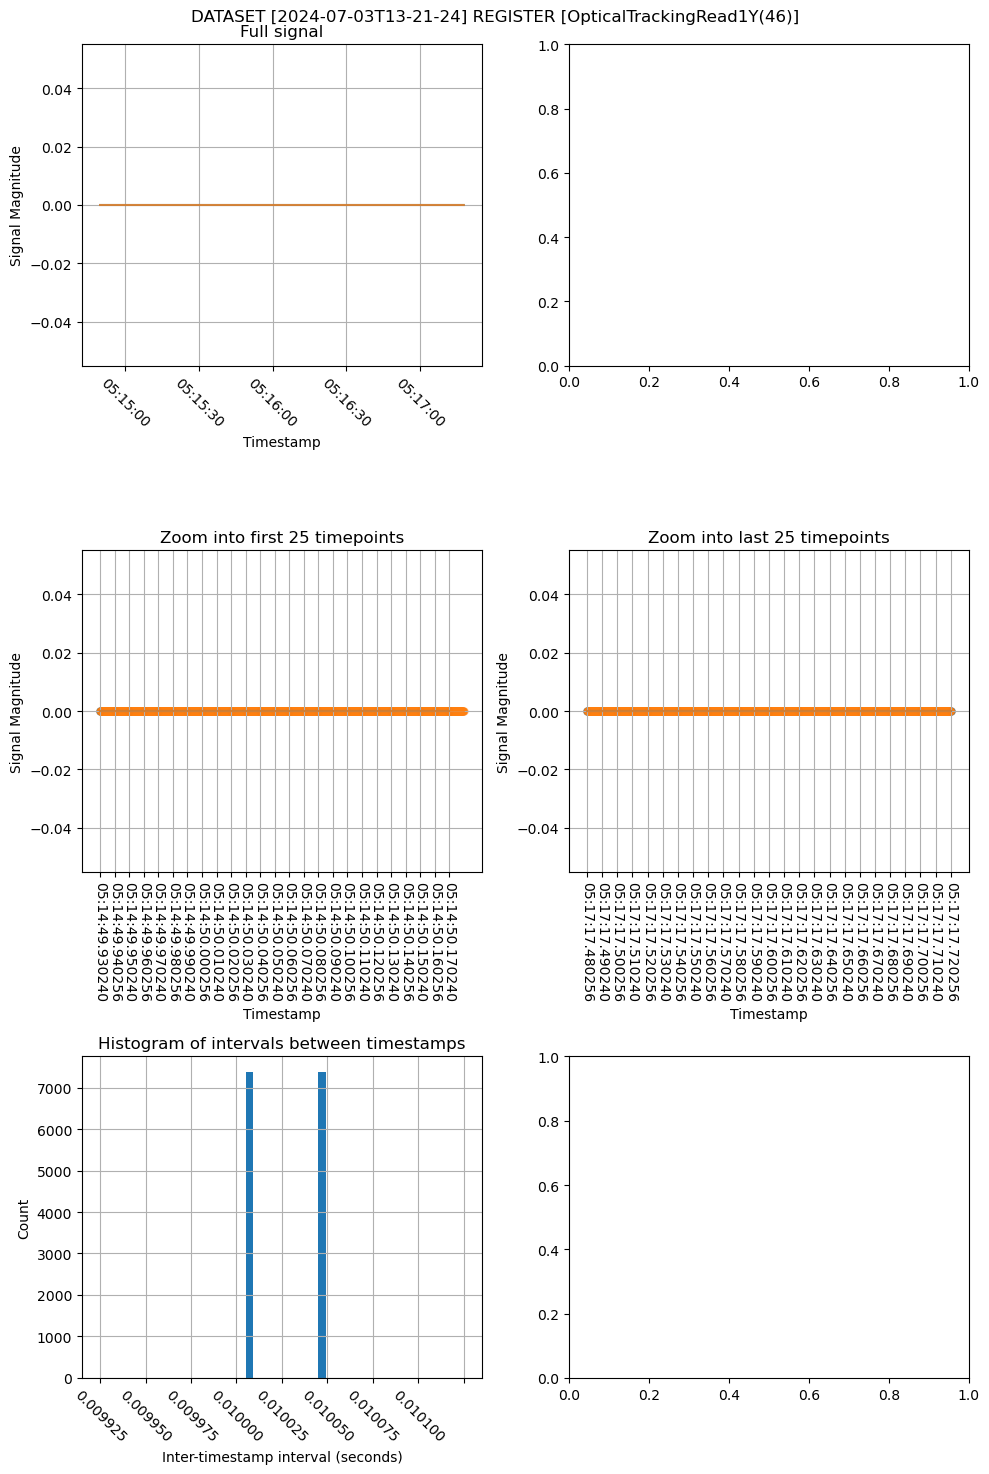

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.930240
1904-01-20 05:14:49.940256
1904-01-20 05:14:49.950240
1904-01-20 05:14:49.960256
1904-01-20 05:14:49.970240

First five resampled timestamps:
1904-01-20 05:14:49.930200
1904-01-20 05:14:49.930300
1904-01-20 05:14:49.930400
1904-01-20 05:14:49.930500
1904-01-20 05:14:49.930600


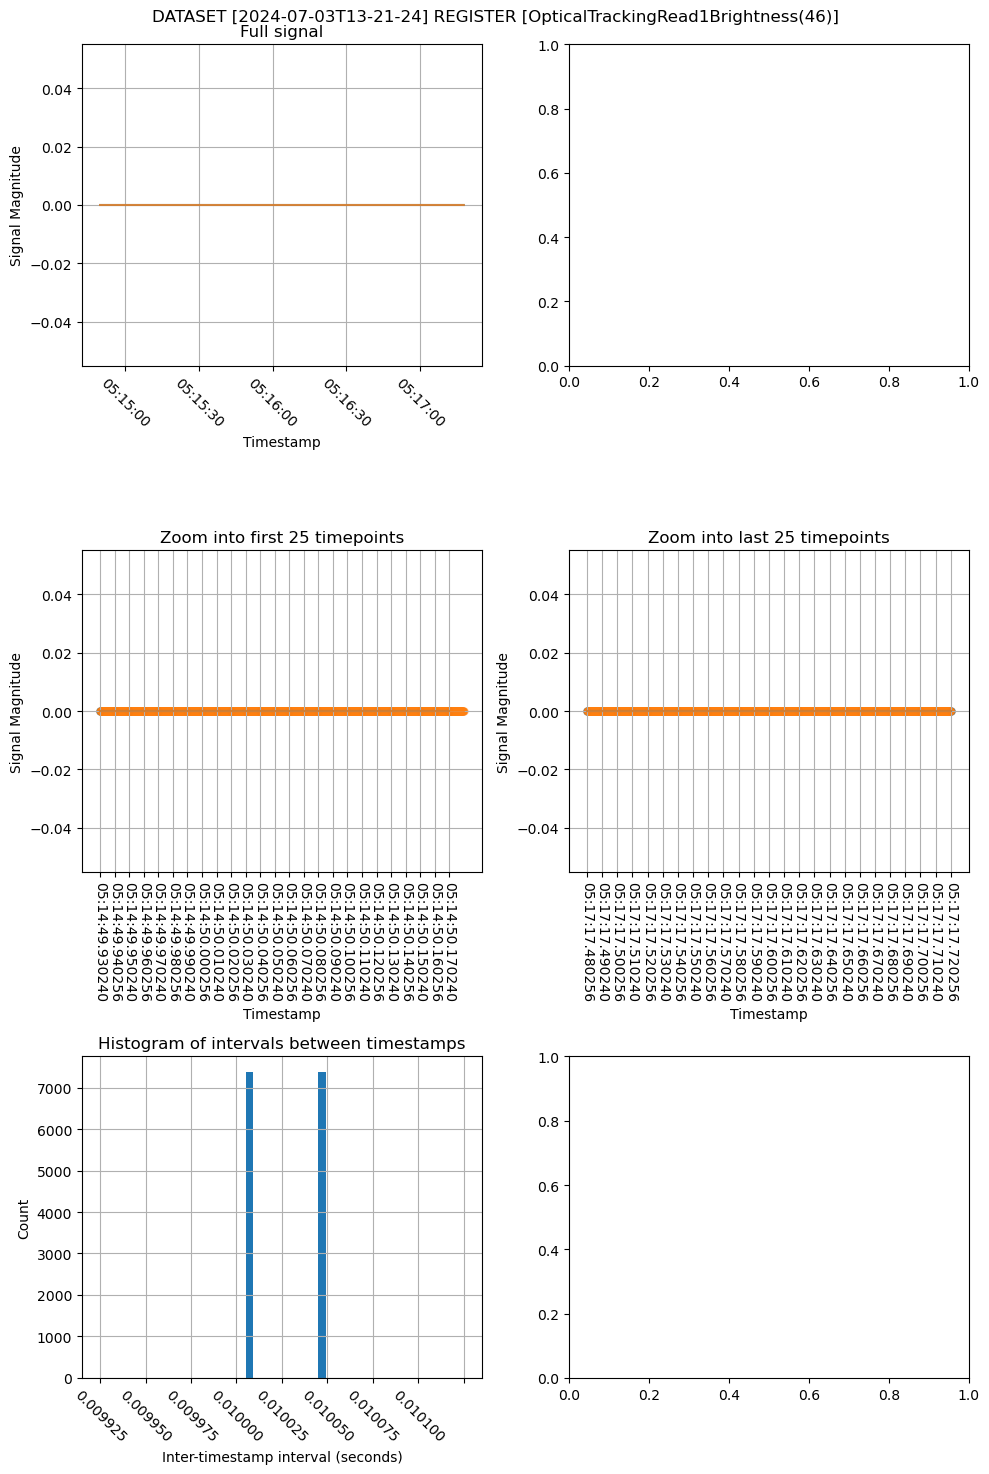

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:49.921504
1904-01-20 05:14:49.921984
1904-01-20 05:14:49.922496
1904-01-20 05:14:49.922976
1904-01-20 05:14:49.923488

First five resampled timestamps:
1904-01-20 05:14:49.921500
1904-01-20 05:14:49.921600
1904-01-20 05:14:49.921700
1904-01-20 05:14:49.921800
1904-01-20 05:14:49.921900


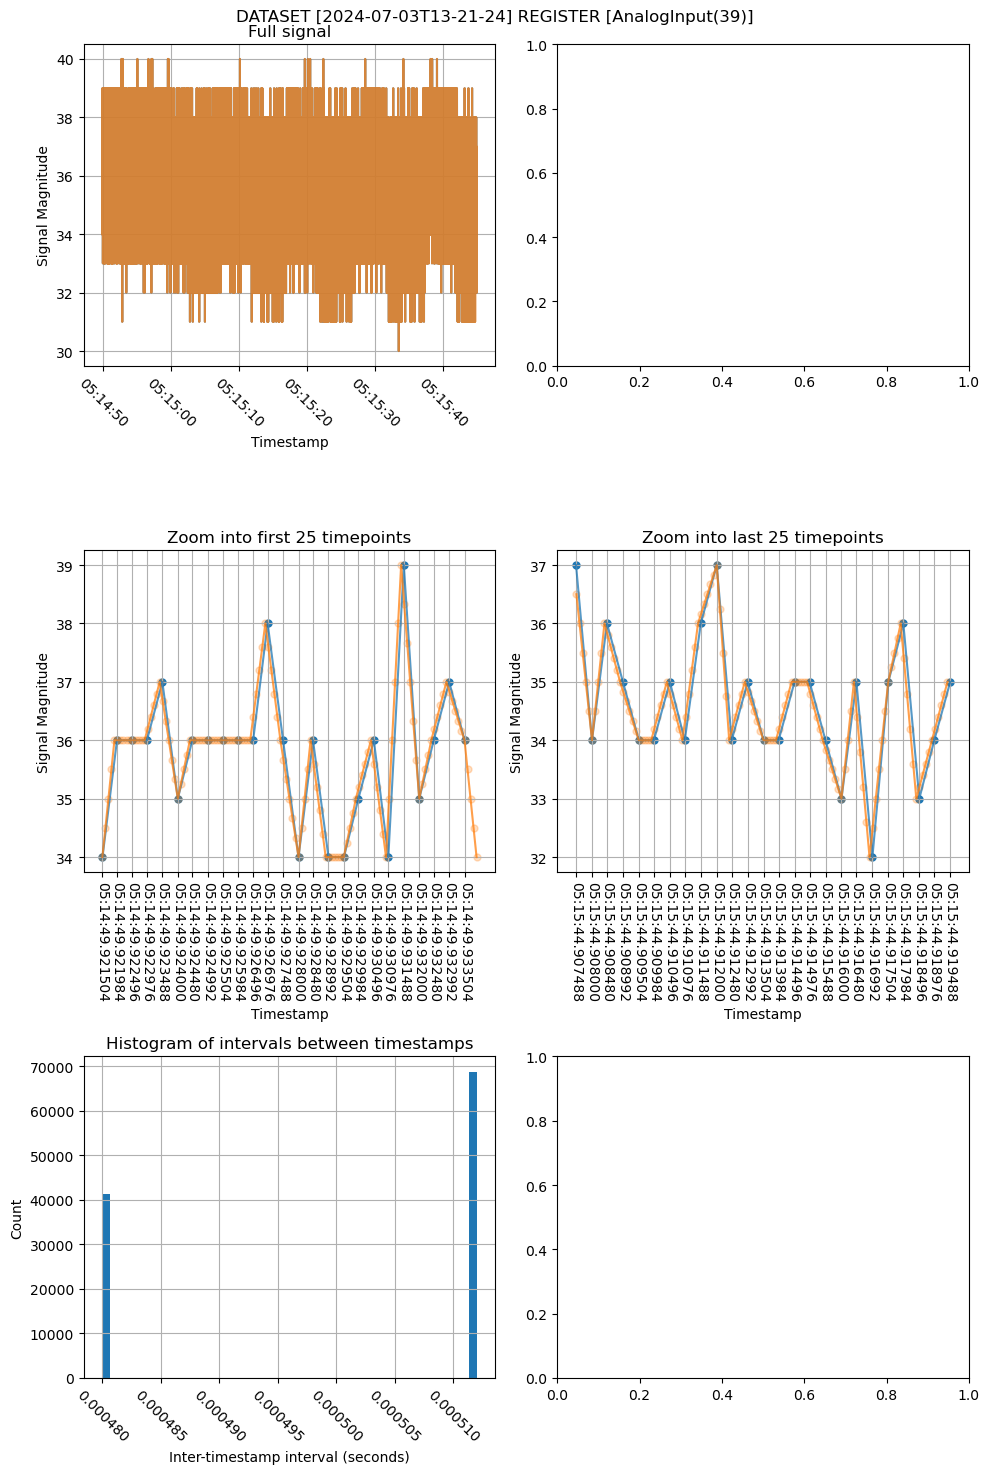

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:59.189504
1904-01-20 05:14:59.190496
1904-01-20 05:14:59.702496
1904-01-20 05:14:59.703488
1904-01-20 05:14:59.704480

First five resampled timestamps:
1904-01-20 05:14:59.189500
1904-01-20 05:14:59.189600
1904-01-20 05:14:59.189700
1904-01-20 05:14:59.189800
1904-01-20 05:14:59.189900


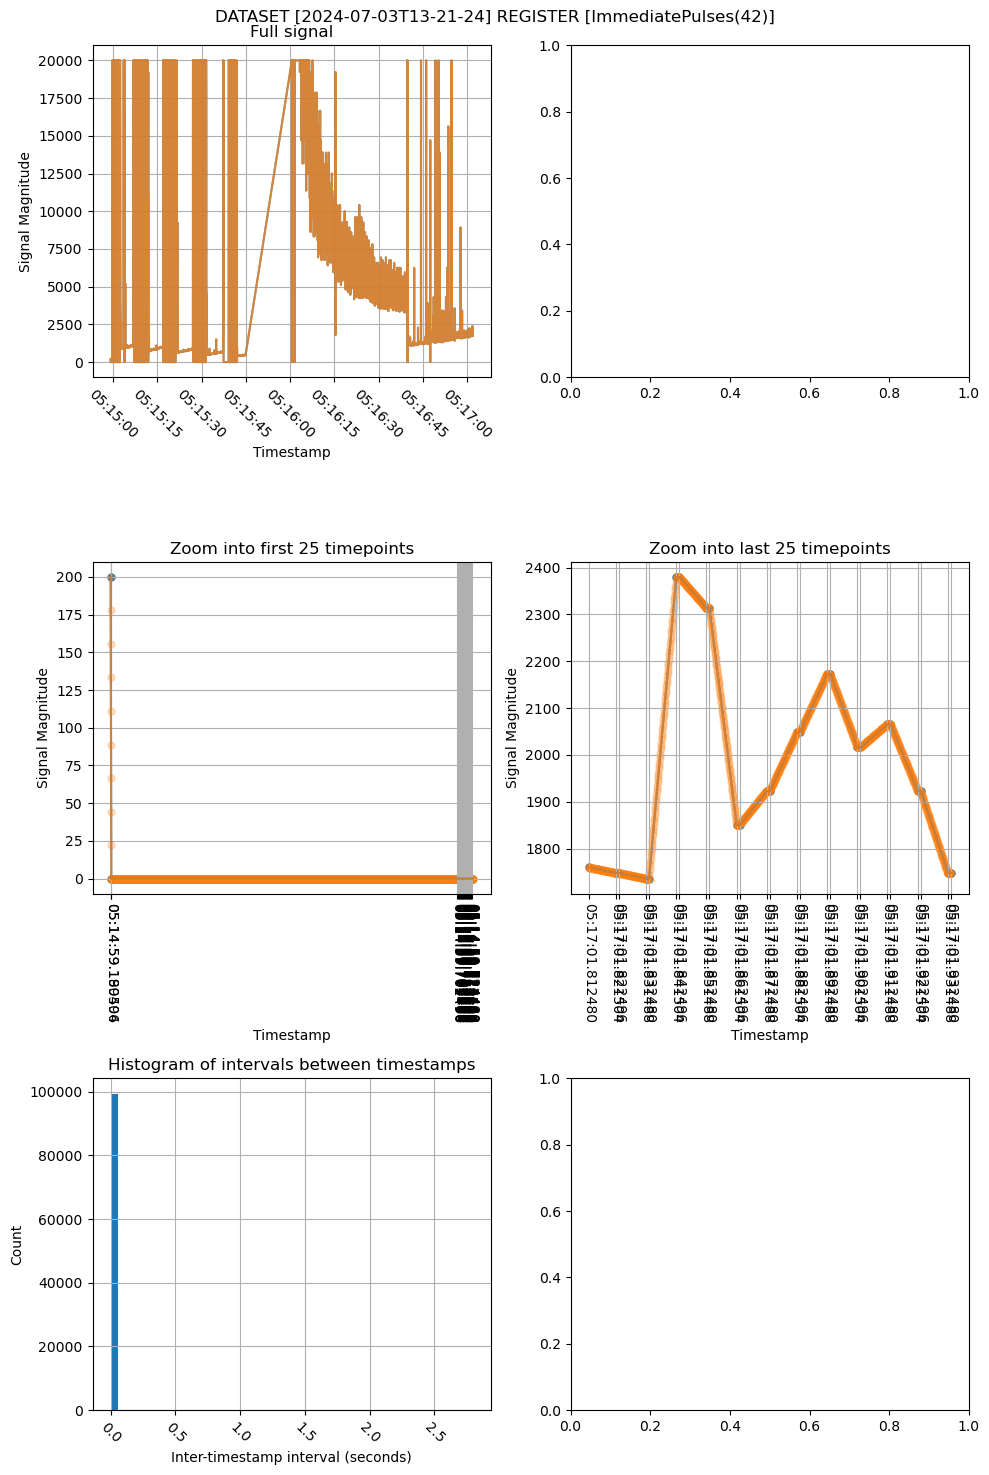

/tmp/ipykernel_780918/2211039371.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0][0].set_xticklabels(ax[0][0].get_xticklabels(), rotation=-45)
/tmp/ipykernel_780918/2211039371.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2][0].set_xticklabels(ax[2][0].get_xticklabels(), rotation=-45)


First five original timestamps:
1904-01-20 05:14:59.193504
1904-01-20 05:14:59.196992
1904-01-20 05:14:59.198976
1904-01-20 05:14:59.203488
1904-01-20 05:14:59.592480

First five resampled timestamps:
1904-01-20 05:14:59.193500
1904-01-20 05:14:59.193600
1904-01-20 05:14:59.193700
1904-01-20 05:14:59.193800
1904-01-20 05:14:59.193900


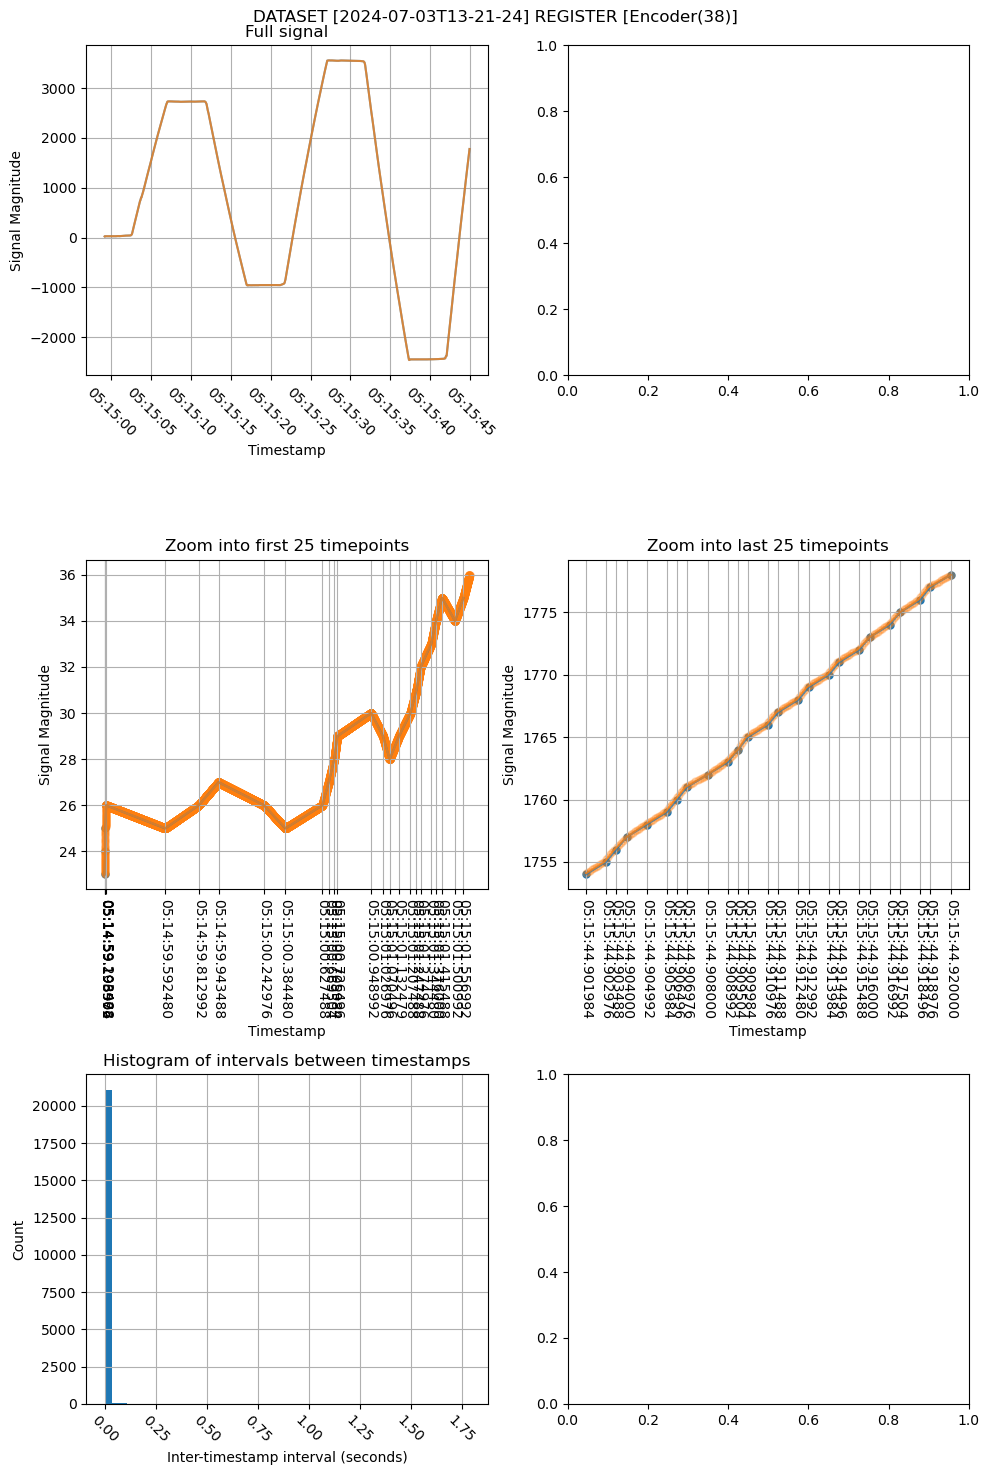

In [109]:
plot_dataset(base_path/'2024-07-03T13-21-24')

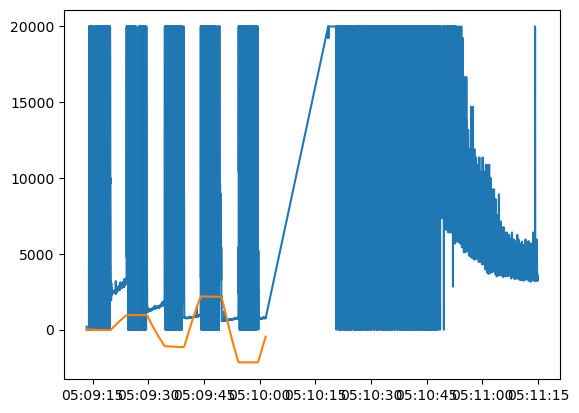

In [80]:
plt.plot(streams[1]['ImmediatePulses(42)'])
plt.plot(streams[1]['Encoder(38)'])

In [97]:
streams[1]['Encoder(38)'][:500].to_numpy()

array([-23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -12, -11, -10,
        -9,  -8,  -7,  -5,  -4,  -3,  -2,   0,   1,   2,   3,   4,   5,
         6,   7,   6,   7,   6,   7,   8,   7,   8,   9,   8,   7,   6,
         5,   4,   3,   2,   3,   4,   3,   2,   1,   0,  -1,  -2,  -1,
         0,   1,   2,   3,   4,   5,   4,   3,   2,   1,   0,  -1,  -2,
        -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12, -13, -14, -15,
       -16, -17, -18, -19, -20, -21, -22, -21, -20, -21, -22, -21, -20,
       -19, -18, -17, -16, -17, -18, -19, -20, -19, -20, -21, -20, -21,
       -22, -23, -24, -25, -26, -25, -24, -23, -22, -23, -24, -25, -26,
       -27, -28, -29, -30, -31, -32, -31, -30, -29, -30, -31, -30, -29,
       -28, -29, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20,
       -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,
        -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,
         7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  1

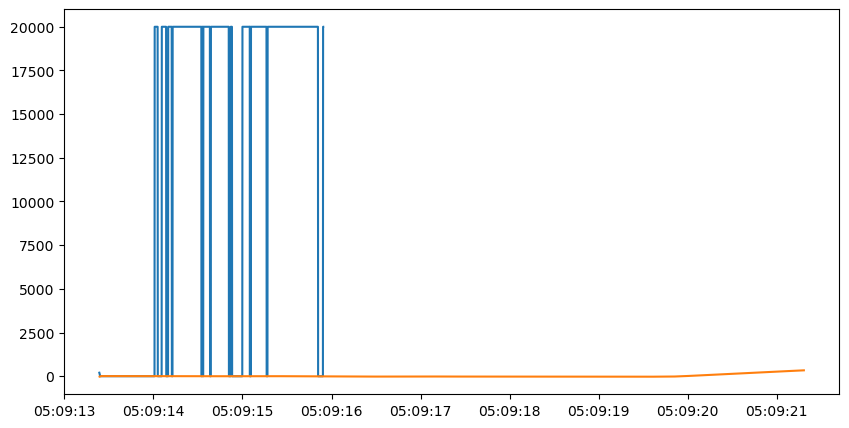

In [96]:
plt.figure(figsize=(10,5))
plt.plot(streams[1]['ImmediatePulses(42)'][:2000])
plt.plot(streams[1]['Encoder(38)'][:500])
# plt.xlim([0,2000])

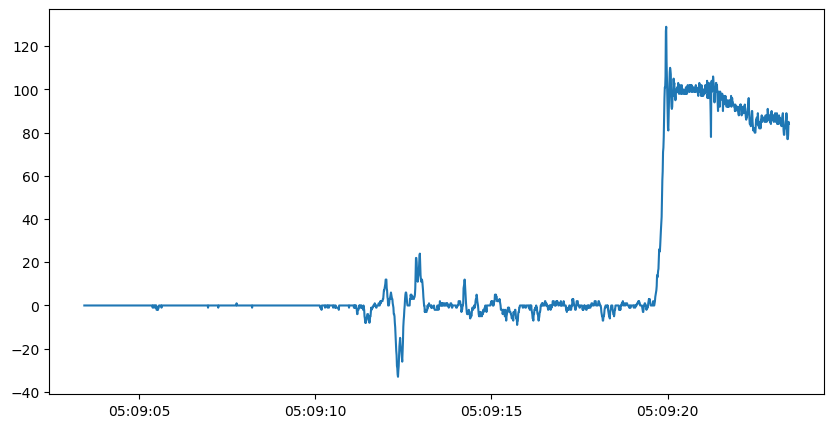

In [91]:
plt.figure(figsize=(10,5))
plt.plot(streams[0]['OpticalTrackingRead0Y(46)'][])

## Optical Tracking Conversion

In [44]:
print(streams[0]['OpticalTrackingRead0Y(46)'].to_numpy())

[1 4 5 ... 6 8 6]


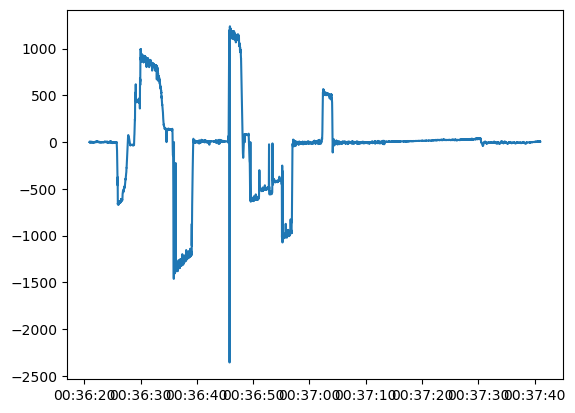

In [42]:
plt.plot(streams[0]['OpticalTrackingRead0Y(46)'])

In [45]:
resolution = 12000 # counts per inch
inches_per_count = 1 / resolution
meters_per_count = 0.0254 * inches_per_count
print(meters_per_count)

2.1166666666666666e-06


In [55]:
streams[0]['OpticalTrackingRead0Y(46)'].index[1].to_pydatetime() - streams[0]['OpticalTrackingRead0Y(46)'].index[0].to_pydatetime()

datetime.timedelta(microseconds=9984)

In [56]:
dt = 0.01 # for OpticalTrackingRead0Y(46)
linear_velocity = meters_per_count / dt # meters per second per count
print(linear_velocity)

0.00021166666666666664


In [63]:
ball_radius = 0.1 # meters 
angular_velocity = linear_velocity / ball_radius # radians per second per count
angular_velocity = angular_velocity * (180 / np.pi) # degrees per second per count
print(angular_velocity)

0.12127606663602424


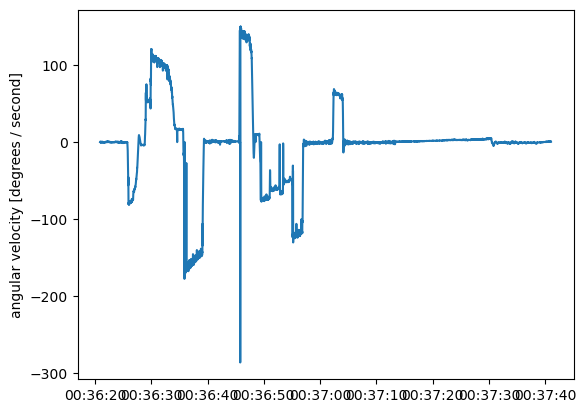

In [70]:
plt.plot(streams[0]['OpticalTrackingRead0Y(46)'] * angular_velocity)
plt.ylabel('angular velocity [degrees / second]')
plt.show()

## Motor command conversion

In [75]:
streams[1]['ImmediatePulses(42)'].to_numpy()

array([  200,     0, 20000, ...,  2162,  2162,  2162], dtype=int16)

In [ ]:
# assume interval = 20000 means 2 second interval between pulses